In [276]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [277]:
pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')

In [17]:
df = pd.read_csv("../../datasets/basketball/euroleague_players.csv")

In [7]:
df.head()

season_player_id season_code player_id           player team_id  \
0  E2017_P003733_PAM       E2017   P003733  ABALDE, ALBERTO     PAM   
1  E2019_P003733_PAM       E2019   P003733  ABALDE, ALBERTO     PAM   
2  E2020_P003733_MAD       E2020   P003733  ABALDE, ALBERTO     MAD   
3  E2021_P003733_MAD       E2021   P003733  ABALDE, ALBERTO     MAD   
4  E2022_P003733_MAD       E2022   P003733  ABALDE, ALBERTO     MAD   

   games_played  games_started  minutes  points  two_points_made  \
0          25.0            9.0    478.5     190               43   
1          23.0            4.0    499.3     179               49   
2          39.0           23.0    761.2     281               47   
3          30.0           19.0    563.4     179               40   
4          25.0           10.0    345.0      63               10   

   two_points_attempted  three_points_made  three_points_attempted  \
0                    89                 28                      54   
1                    97                 15                      53   
2                   100                 50                     115   
3                    90                 25                      74   
4                    27                  9                      36   

   free_throws_made  free_throws_attempted  offensive_rebounds  \
0                20                     23                  12   
1                36                     49                  32   
2                37                     44                  11   
3                24                     32                  20   
4                16                     24                  10   

   defensive_rebounds  total_rebounds  assists  steals  turnovers  \
0                  40              52       42       8         32   
1                  60              92       38      11         19   
2                  93             104       91      21         38   
3                  69              89       44      14         33   
4                  40              50       38       7         14   

   blocks_favour  blocks_against  fouls_committed  fouls_received  valuation  \
0              0               5               44              36        172   
1              0               8               29              40        205   
2              0               6               60              57        325   
3              0               2               56              35        163   
4              0               2               41              20         69   

   minutes_per_game  points_per_game  two_points_made_per_game  \
0             19.14             7.60                      1.72   
1             21.71             7.78                      2.13   
2             19.52             7.21                      1.21   
3             18.78             5.97                      1.33   
4             13.80             2.52                      0.40   

   two_points_attempted_per_game  two_points_percentage  \
0                           3.56                  0.483   
1                           4.22                  0.505   
2                           2.56                  0.470   
3                           3.00                  0.444   
4                           1.08                  0.370   

   three_points_made_per_game  three_points_attempted_per_game  \
0                        1.12                             2.16   
1                        0.65                             2.30   
2                        1.28                             2.95   
3                        0.83                             2.47   
4                        0.36                             1.44   

   three_points_percentage  free_throws_made_per_game  \
0                    0.519                       0.80   
1                    0.283                       1.57   
2                    0.435                       0.95   
3                    0.338                       0.80   
4                   

In [567]:
df.shape

(5073, 48)

In [5]:
df.dtypes

season_player_id                    object
season_code                         object
player_id                           object
player                              object
team_id                             object
games_played                       float64
games_started                      float64
minutes                            float64
points                               int64
two_points_made                      int64
two_points_attempted                 int64
three_points_made                    int64
three_points_attempted               int64
free_throws_made                     int64
free_throws_attempted                int64
offensive_rebounds                   int64
defensive_rebounds                   int64
total_rebounds                       int64
assists                              int64
steals                               int64
turnovers                            int64
blocks_favour                        int64
blocks_against                       int64
fouls_commi

In [34]:
sample = df.loc[df["player_id"] == "P003733"].iloc[0]

In [28]:
#Valuation = (Points + Rebounds + Assists + Steals + Blocks) - (Missed Field Goals + Missed Free Throws + Turnovers + Fouls)

In [46]:
avg = (sample.points + sample.offensive_rebounds + sample.defensive_rebounds + sample.assists + sample.steals + sample.blocks_favour + sample.fouls_received) 

In [47]:
minus =  ((sample.two_points_attempted-sample.two_points_made) + (sample.free_throws_attempted-sample.free_throws_made_per_game)+sample.turnovers+sample.fouls_committed)

In [48]:
avg-minus

183.8

In [41]:
sample.valuation

172

In [53]:
df["season_code"].value_counts().sort_index(ascending=False)

season_code
E2022    308
E2021    308
E2020    309
E2019    307
E2018    260
E2017    264
E2016    261
E2015    367
E2014    375
E2013    370
E2012    366
E2011    363
E2010    363
E2009    368
E2008    374
E2007    383
Name: count, dtype: int64

In [54]:
def grab_col_names(data_frame, cat_th=20 , car_th=30): 
    cat_cols = [col for col in data_frame.columns if data_frame[col].dtype == "O"]
    num_but_cat = [col for col in data_frame.columns if data_frame[col].nunique() < car_th and data_frame[col].dtype != "O"]
    cat_but_car = [col for col in data_frame.columns if data_frame[col].nunique() > car_th and data_frame[col].dtype == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]
    num_cols = [col for col in data_frame.columns if data_frame[col].dtype != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {data_frame.shape[0]}")
    print(f"Variables: {data_frame.shape[1]}")
    print(f"cat_cols: {len(cat_cols)}")
    print(f"cat_but_car: {len(cat_but_car)}")
    print(f"num_cols: {len(num_cols)}")
    print(f"num_but_car: {len(num_but_cat)}")
    return num_cols,cat_cols,cat_but_car

def missing_values_table(data_frame, na_name=False):
    na_columns = [col for col in data_frame.columns if data_frame[col].isnull().sum() > 0]

    n_miss = data_frame[na_columns].isnull().sum().sort_values(ascending=False)
    ratio = (data_frame[na_columns].isnull().sum() / data_frame.shape[0] * 100)
    missing_df = pd.concat([n_miss, np.round(ratio,2)],axis=1, keys=["n_miss" , "ratio"])
    print(missing_df,end="\n")

    if na_name:
        return na_columns

def locate_uneven_cols(dataframe, col):
    total_values = dataframe[col].value_counts().sum()
    val_counts = dataframe[col].value_counts() 
    for count in val_counts:
        percentage = (count / total_values) * 100
        if percentage > 95:
            return True
    return False

In [55]:
num_cols, cat_cols, cat_but_car = grab_col_names(df)

Observations: 5346
Variables: 48
cat_cols: 1
cat_but_car: 4
num_cols: 43
num_but_car: 0


In [58]:
cat_cols,cat_but_car

(['season_code'], ['season_player_id', 'player_id', 'player', 'team_id'])

In [59]:
num_cols

['games_played',
 'games_started',
 'minutes',
 'points',
 'two_points_made',
 'two_points_attempted',
 'three_points_made',
 'three_points_attempted',
 'free_throws_made',
 'free_throws_attempted',
 'offensive_rebounds',
 'defensive_rebounds',
 'total_rebounds',
 'assists',
 'steals',
 'turnovers',
 'blocks_favour',
 'blocks_against',
 'fouls_committed',
 'fouls_received',
 'valuation',
 'minutes_per_game',
 'points_per_game',
 'two_points_made_per_game',
 'two_points_attempted_per_game',
 'two_points_percentage',
 'three_points_made_per_game',
 'three_points_attempted_per_game',
 'three_points_percentage',
 'free_throws_made_per_game',
 'free_throws_attempted_per_game',
 'free_throws_percentage',
 'offensive_rebounds_per_game',
 'defensive_rebounds_per_game',
 'total_rebounds_per_game',
 'assists_per_game',
 'steals_per_game',
 'turnovers_per_game',
 'blocks_favour_per_game',
 'blocks_against_per_game',
 'fouls_committed_per_game',
 'fouls_received_per_game',
 'valuation_per_game']

In [60]:
missing_values_table(df)

Empty DataFrame
Columns: [n_miss, ratio]
Index: []


In [61]:
df.describe().T

E:\Anaconda\envs\datascience\lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
E:\Anaconda\envs\datascience\lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
E:\Anaconda\envs\datascience\lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
E:\Anaconda\envs\datascience\lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


count        mean         std   min  \
games_played                     5346.0   15.715301   10.541935   0.0   
games_started                    5346.0    7.437336    8.671508   0.0   
minutes                          5346.0  299.500823  252.691966   0.0   
points                           5346.0  115.787131  114.160789   0.0   
two_points_made                  5346.0   29.529555   31.574456   0.0   
two_points_attempted             5346.0   56.406472   56.725472   0.0   
three_points_made                5346.0   12.047512   15.739816   0.0   
three_points_attempted           5346.0   33.303591   40.958443   0.0   
free_throws_made                 5346.0   20.585484   23.796201   0.0   
free_throws_attempted            5346.0   27.208567   30.008214   0.0   
offensive_rebounds               5346.0   12.799476   15.465711   0.0   
defensive_rebounds               5346.0   32.130939   31.826536   0.0   
total_rebounds                   5346.0   44.930415   45.165465   0.0   
assists                          5346.0   23.864385   32.531670   0.0   
steals                           5346.0    9.790311    9.955823   0.0   
turnovers                        5346.0   18.351291   17.868736   0.0   
blocks_favour                    5346.0    3.852413    6.634273   0.0   
blocks_against                   5346.0    3.848859    4.222703   0.0   
fouls_committed                  5346.0   30.838571   24.456876   0.0   
fouls_received                   5346.0   30.576693   31.985161   0.0   
valuation                        5346.0  121.006547  130.965435 -16.0   
minutes_per_game                 5346.0   16.029342    8.606276   0.0   
points_per_game                  5346.0         inf         NaN   0.0   
two_points_made_per_game         5346.0         inf         NaN   0.0   
two_points_attempted_per_game    5346.0         inf         NaN   0.0   
two_points_percentage            5346.0    0.449100    0.209970   0.0   
three_points_made_per_game       5346.0    0.603810    0.636110   0.0   
three_points_attempted_per_game  5346.0    1.724798    1.639560   0.0   
three_points_percentage          5346.0    0.250886    0.199833   0.0   
free_throws_made_per_game        5346.0    1.071033    0.984180   0.0   
free_throws_attempted_per_game   5346.0    1.439005    1.261037   0.0   
free_throws_percentage           5346.0    0.618452    0.311714   0.0   
offensive_rebounds_per_game      5346.0    0.686044    0.659364   0.0   
defensive_rebounds_per_game      5346.0    1.693823    1.203226   0.0   
total_rebounds_per_game          5346.0    2.379817    1.724777   0.0   
assists_per_game                 5346.0    1.203625    1.252413   0.0   
steals_per_game                  5346.0    0.523210    0.429020   0.0   
turnovers_per_game               5346.0    1.017523    0.733175   0.0   
blocks_favour_per_game           5346.0    0.203461    0.310259   0.0   
blocks_against_per_game          5346.0    0.215009    0.212914   0.0   
fouls_committed_per_game         5346.0    1.715413    0.878802   0.0   
fouls_received_per_game          5346.0    1.608345    1.269873   0.0   
valuation_per_game               5346.0         inf         NaN  -7.0   

                                     25%       50%       75%      max  
games_played                      7.0000   15.0000   24.0000    41.00  
games_started                     0.0000    4.0000   12.0000    41.00  
minutes                          77.0000  249.4000  473.9000  1243.80  
points                           20.0000   85.0000  179.0000   740.00  
two_points_made                   5.0000   20.0000   44.0000   222.00  
two_points_attempted             11.0000   40.0000   86.0000   385.00  
three_points_made                 0.0000    6.0000   18.0000   107.00  
three_points_attempted            1.0000   17.0000   51.0000   324.00  
free_throws_made                  3.0000   13.0000   30.0000   178.00  
free_throws_attempted             4.0000   18.0000   40.0000   207.00  
offensive_rebounds           

In [63]:
df[df["points_per_game"] > 10000]

season_player_id season_code player_id               player team_id  \
4505   E2007_PAWI_LIE       E2007      PAWI  STELMAHERS, ROBERTS     LIE   

      games_played  games_started  minutes  points  two_points_made  \
4505           0.0            0.0      0.0       2                1   

      two_points_attempted  three_points_made  three_points_attempted  \
4505                     1                  0                       0   

      free_throws_made  free_throws_attempted  offensive_rebounds  \
4505                 0                      0                   0   

      defensive_rebounds  total_rebounds  assists  steals  turnovers  \
4505                   0               0        0       0          0   

      blocks_favour  blocks_against  fouls_committed  fouls_received  \
4505              0               0                0               0   

      valuation  minutes_per_game  points_per_game  two_points_made_per_game  \
4505          2               0.0              inf                       inf   

      two_points_attempted_per_game  two_points_percentage  \
4505                            inf                    1.0   

      three_points_made_per_game  three_points_attempted_per_game  \
4505                         0.0                              0.0   

      three_points_percentage  free_throws_made_per_game  \
4505                      0.0                        0.0   

      free_throws_attempted_per_game  free_throws_percentage  \
4505                             0.0                     0.0   

      offensive_rebounds_per_game  defensive_rebounds_per_game  \
4505                          0.0                          0.0   

      total_rebounds_per_game  assists_per_game  steals_per_game  \
4505                      0.0               0.0              0.0   

      turnovers_per_game  blocks_favour_per_game  blocks_against_per_game  \
4505                 0.0                     0.0                      0.0   

      fouls_committed_per_game  fouls_received_per_game  valuation_per_game  
4505                       0.0                      0.0                 inf

In [68]:
df.replace(to_replace=np.inf,value=np.nan, inplace=True)

In [75]:
df.dropna(inplace=True)

In [131]:
drop_ind = df.loc[df["games_played"] == 0]

In [135]:
df = df[~(df["games_played"] == 0)]

In [136]:
df.shape

(5073, 48)

In [137]:
df.describe().T

count        mean         std    min  \
games_played                     5073.0   16.561009   10.154090   1.00   
games_started                    5073.0    7.837571    8.723813   0.00   
minutes                          5073.0  315.618253  249.403622   0.00   
points                           5073.0  122.017741  113.902674   0.00   
two_points_made                  5073.0   31.118470   31.641082   0.00   
two_points_attempted             5073.0   59.441750   56.661530   0.00   
three_points_made                5073.0   12.695841   15.901062   0.00   
three_points_attempted           5073.0   35.095801   41.291391   0.00   
free_throws_made                 5073.0   21.693278   23.931186   0.00   
free_throws_attempted            5073.0   28.672777   30.115952   0.00   
offensive_rebounds               5073.0   13.488271   15.581079   0.00   
defensive_rebounds               5073.0   33.860043   31.763031   0.00   
total_rebounds                   5073.0   47.348315   45.113320   0.00   
assists                          5073.0   25.148630   32.908504   0.00   
steals                           5073.0   10.317169    9.950713   0.00   
turnovers                        5073.0   19.338853   17.815036   0.00   
blocks_favour                    5073.0    4.059728    6.748392   0.00   
blocks_against                   5073.0    4.055983    4.236830   0.00   
fouls_committed                  5073.0   32.498127   24.008132   0.00   
fouls_received                   5073.0   32.222157   32.016953   0.00   
valuation                        5073.0  127.518037  131.319070 -16.00   
minutes_per_game                 5073.0   16.891950    7.967477   0.02   
points_per_game                  5073.0    6.293678    4.102229   0.00   
two_points_made_per_game         5073.0    1.628013    1.237845   0.00   
two_points_attempted_per_game    5073.0    3.180493    2.211928   0.00   
two_points_percentage            5073.0    0.473071    0.187109   0.00   
three_points_made_per_game       5073.0    0.636304    0.636974   0.00   
three_points_attempted_per_game  5073.0    1.817617    1.632208   0.00   
three_points_percentage          5073.0    0.264387    0.196245   0.00   
free_throws_made_per_game        5073.0    1.128669    0.977589   0.00   
free_throws_attempted_per_game   5073.0    1.516444    1.248339   0.00   
free_throws_percentage           5073.0    0.651734    0.284078   0.00   
offensive_rebounds_per_game      5073.0    0.722963    0.656860   0.00   
defensive_rebounds_per_game      5073.0    1.784975    1.167452   0.00   
total_rebounds_per_game          5073.0    2.507885    1.677418   0.00   
assists_per_game                 5073.0    1.268397    1.253312   0.00   
steals_per_game                  5073.0    0.551366    0.422419   0.00   
turnovers_per_game               5073.0    1.072281    0.712567   0.00   
blocks_favour_per_game           5073.0    0.214410    0.314791   0.00   
blocks_against_per_game          5073.0    0.226580    0.212486   0.00   
fouls_committed_per_game         5073.0    1.807727    0.804332   0.00   
fouls_received_per_game          5073.0    1.694897    1.246053   0.00   
valuation_per_game               5073.0    6.302606    4.891461  -7.00   

                                     25%      50%      75%      max  
games_played                       9.000   16.000   24.000    41.00  
games_started                      1.000    5.000   13.000    41.00  
minutes                          100.500  266.200  486.700  1243.80  
points                            29.000   93.000  186.000   740.00  
two_points_made                    6.000   21.000   46.000   222.00  
two_points_attempted              14.000   44.000   90.000   385.00  
three_points_made                  0.000    6.000   19.000   107.00  
three_points_attempted             2.000   20.000   54.000   324.00  
free_throws_made                   4.000   14.000   32.000   178.00  
free_throws_attempted              6.000   20.000   42.000   207.00  
offensi

In [1385]:
def check_outliers(data_frame, col_name):
    up_limit,low_limit = outliers_treshold(data_frame,col_name)
    if data_frame[(data_frame[col_name] > up_limit) | (data_frame[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

def outliers_treshold(data_frame, col_name, q1=0.25 ,q3=0.75):
    quartile1 = data_frame[col_name].quantile(q1)
    quartile3 = data_frame[col_name].quantile(q3)
    interquartile_range = quartile3-quartile1
    up_limit = quartile3 + 1.5 * interquartile_range
    low_limit = quartile1 - 1.5 * interquartile_range
    return up_limit, low_limit

def grab_outliers(data_frame,col_name,index=False):
    up,low = outliers_treshold(data_frame,col_name)
    # if data_frame[((data_frame[col_name] < low) | (data_frame[col_name] > up))].shape[0] > 10:
    #     print(data_frame[((data_frame[col_name] < low) | (data_frame[col_name] > up))].head())
    # else:
    #     print(data_frame[((data_frame[col_name] < low) | (data_frame[col_name] > up))])
    if index:
        outlier_index = data_frame[((data_frame[col_name] < low) | (data_frame[col_name] > up))].index
        return outlier_index

In [138]:
count = 1
outlier_col = []
for col in num_cols:
    if check_outliers(df,col):
        index = grab_outliers(df,col,True)
        outlier_col.append(col)
        print(col, len(index))

three_points_attempted 1
free_throws_made 1
offensive_rebounds 1
assists 7
blocks_favour 13
free_throws_made_per_game 1
free_throws_attempted_per_game 2
offensive_rebounds_per_game 1
blocks_favour_per_game 8
blocks_against_per_game 3


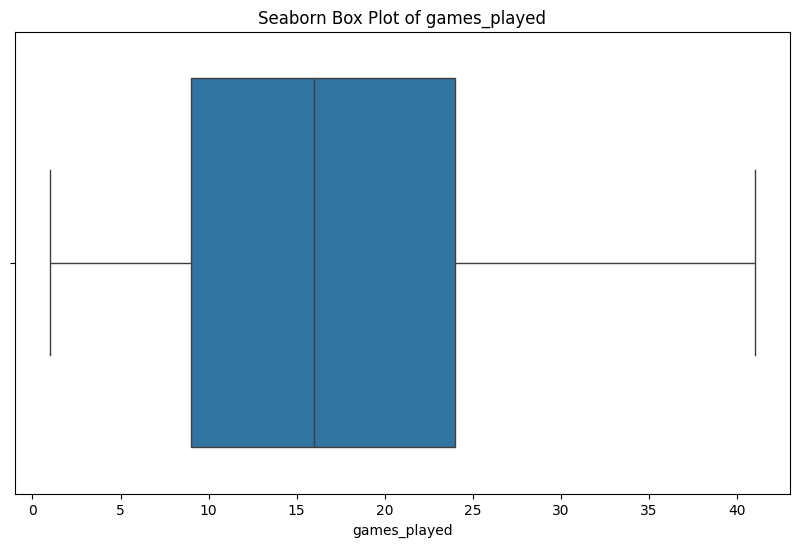

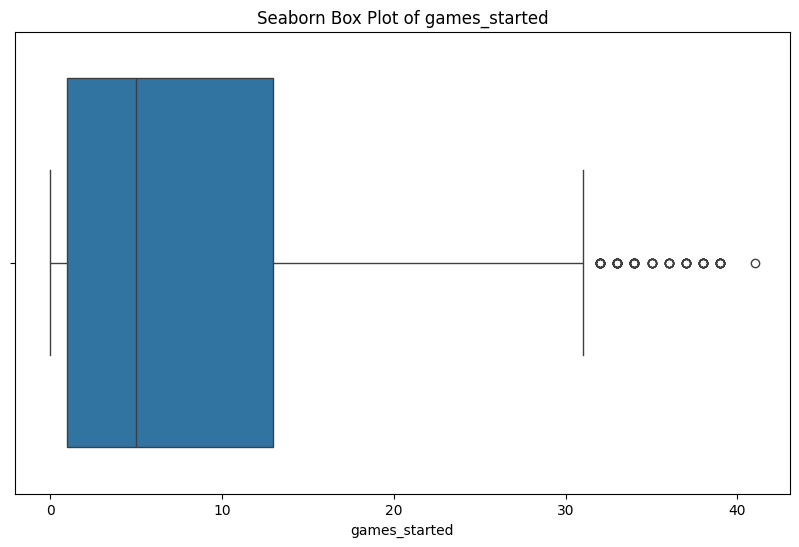

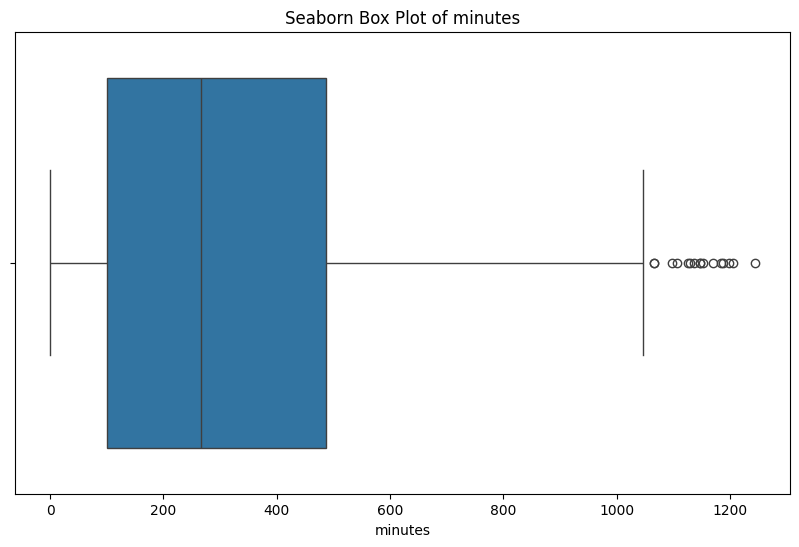

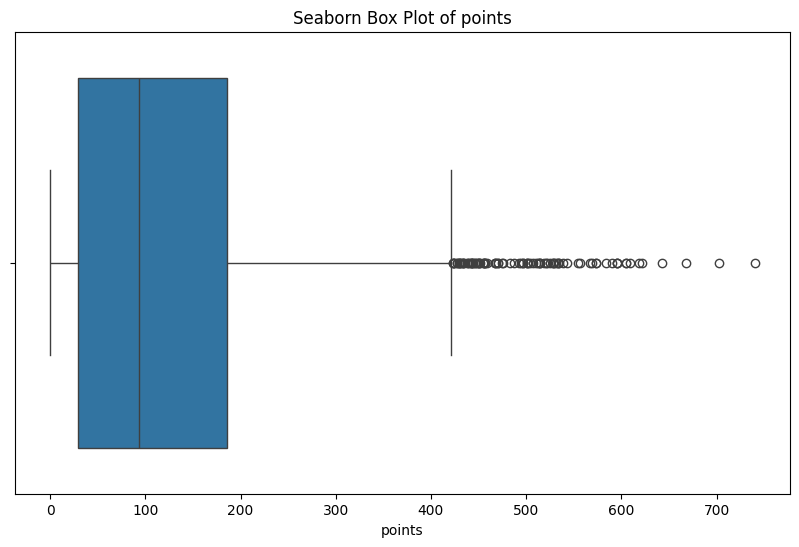

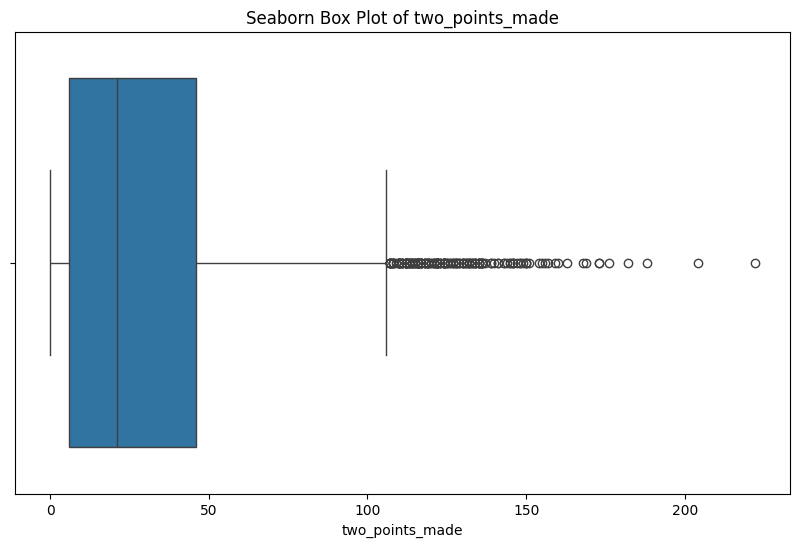

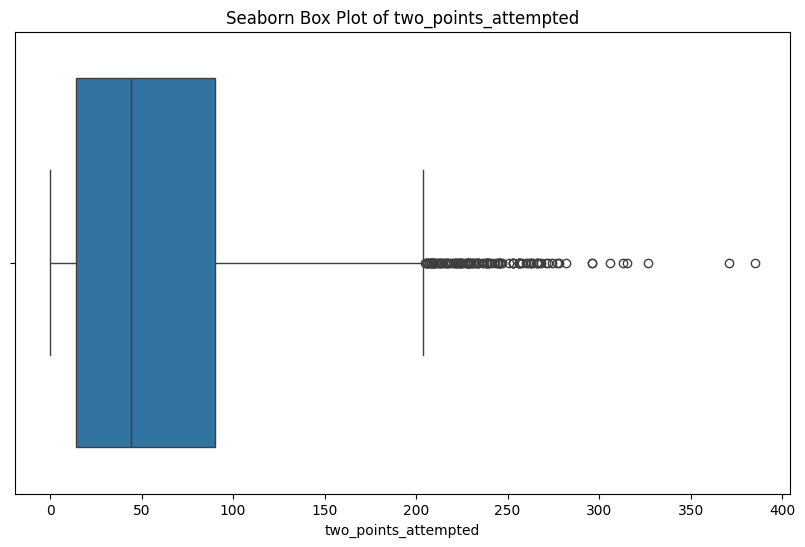

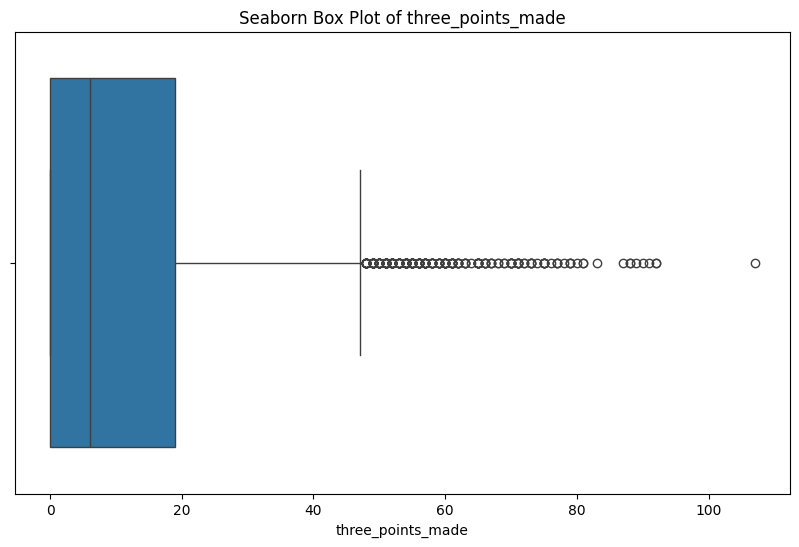

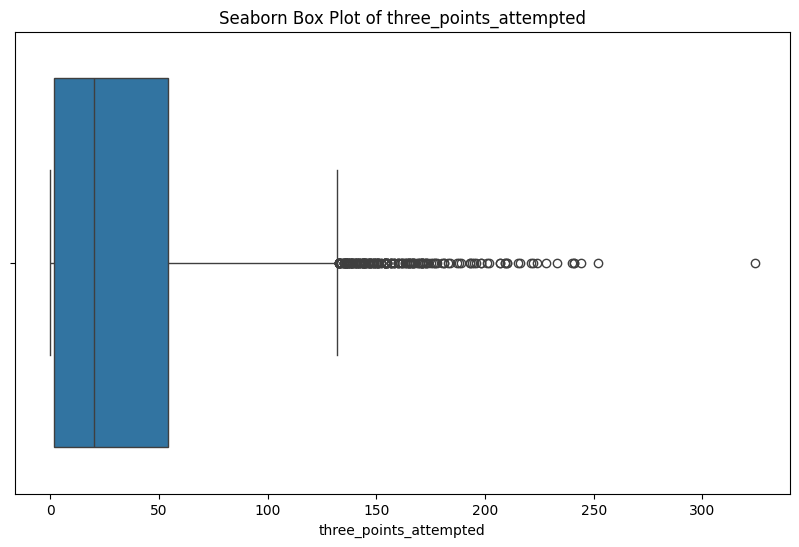

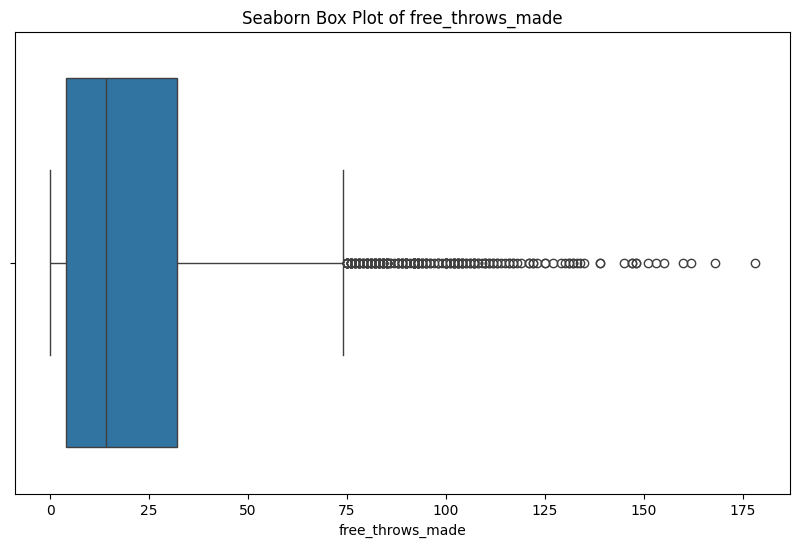

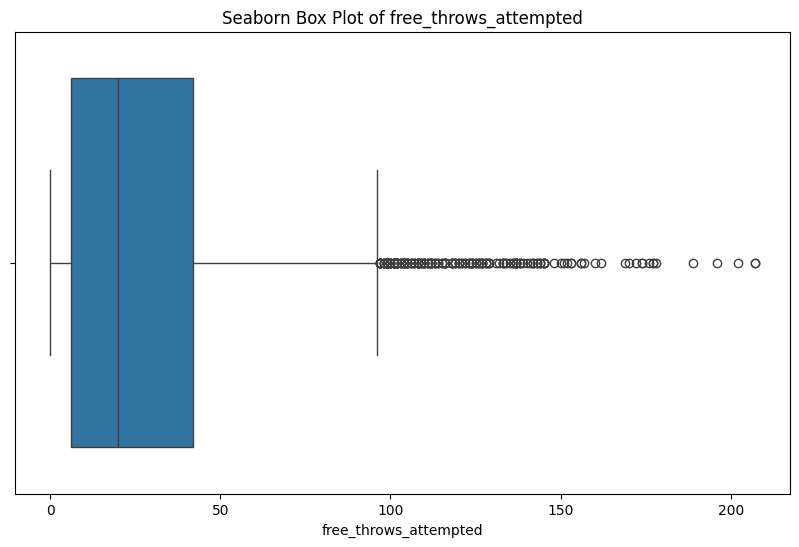

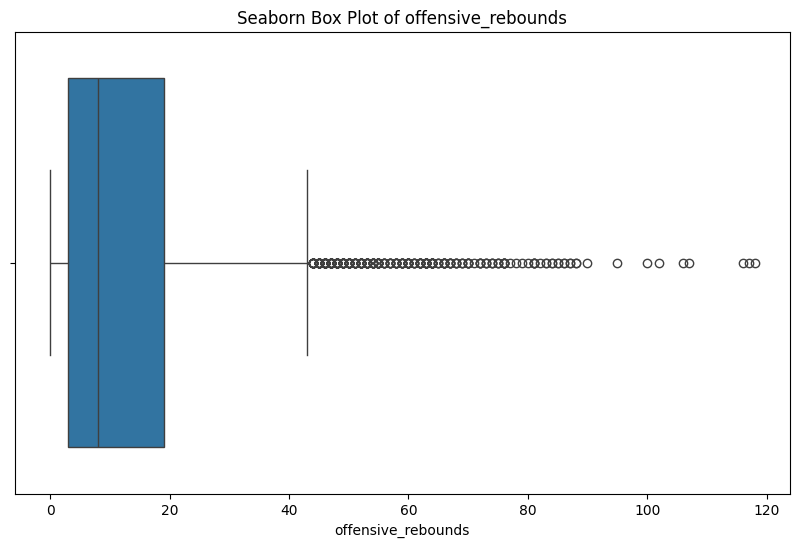

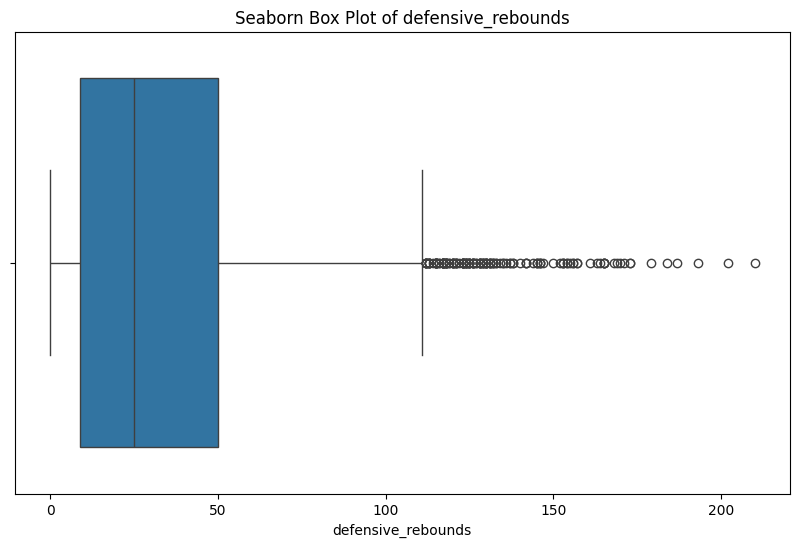

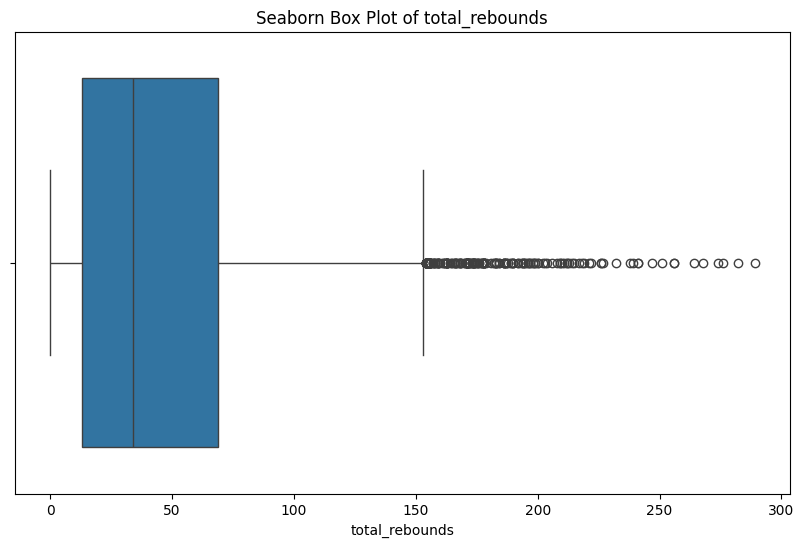

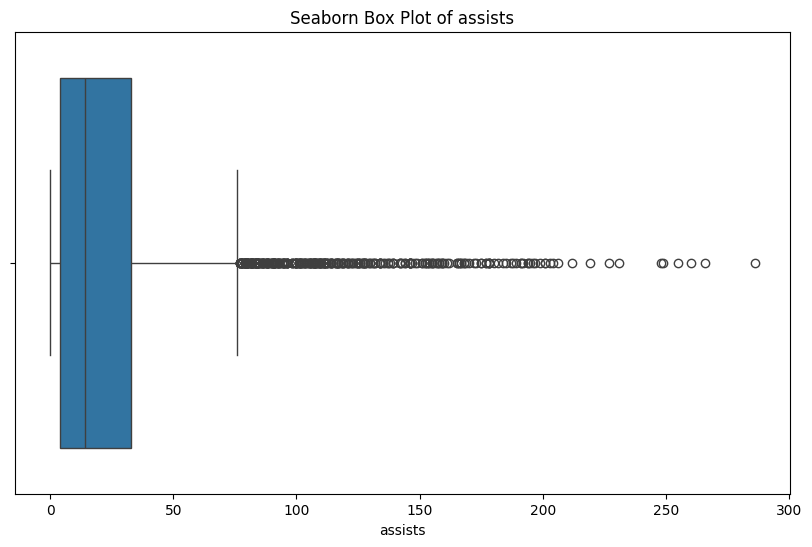

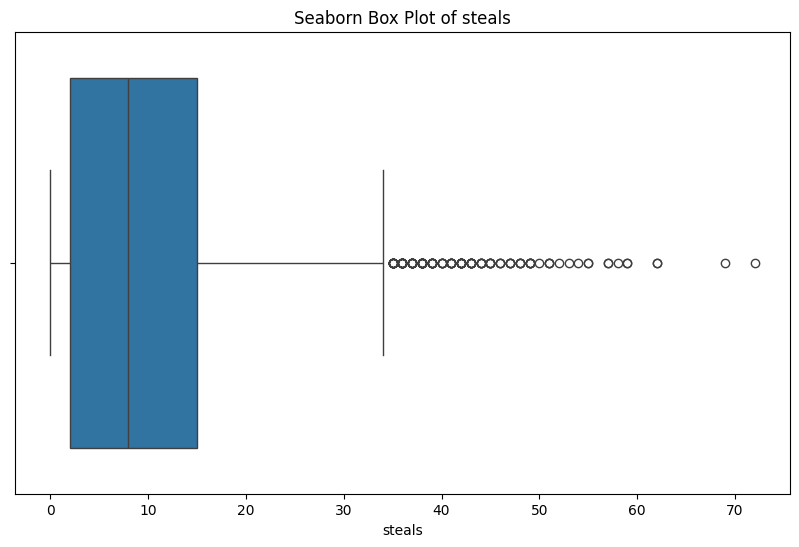

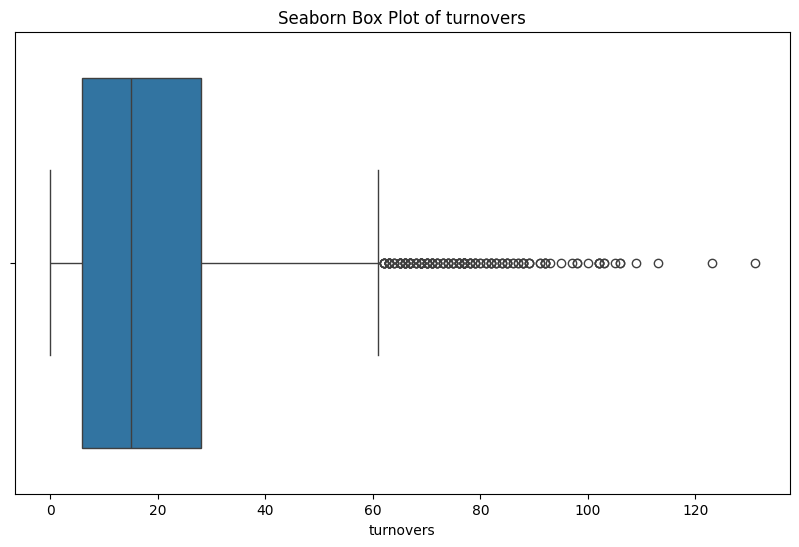

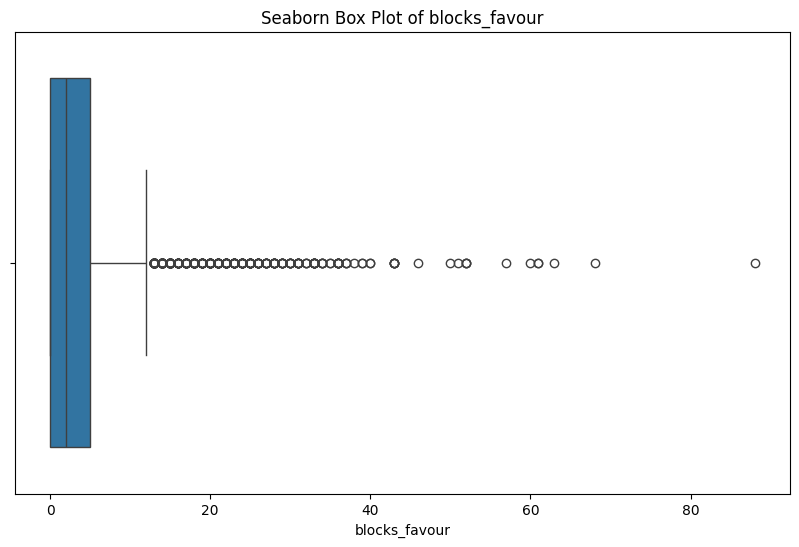

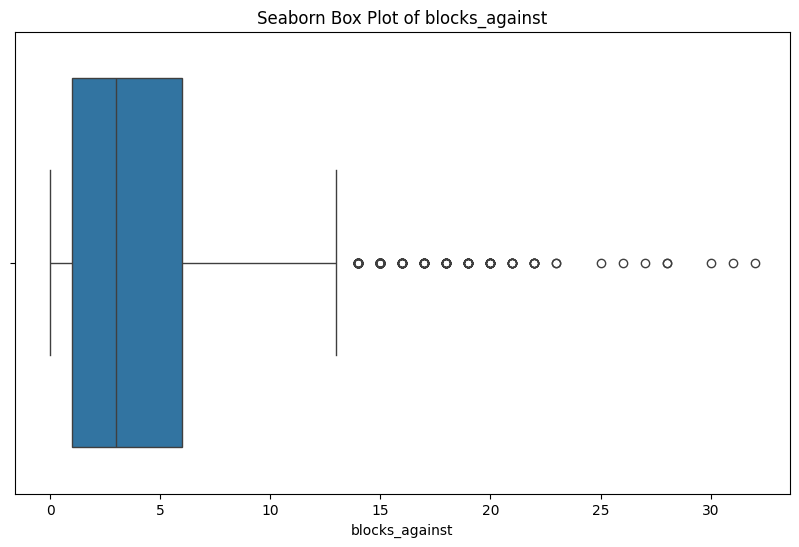

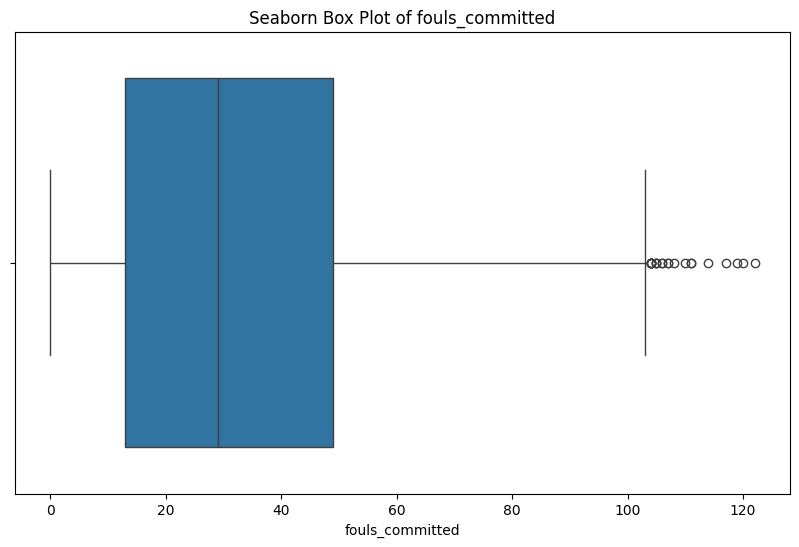

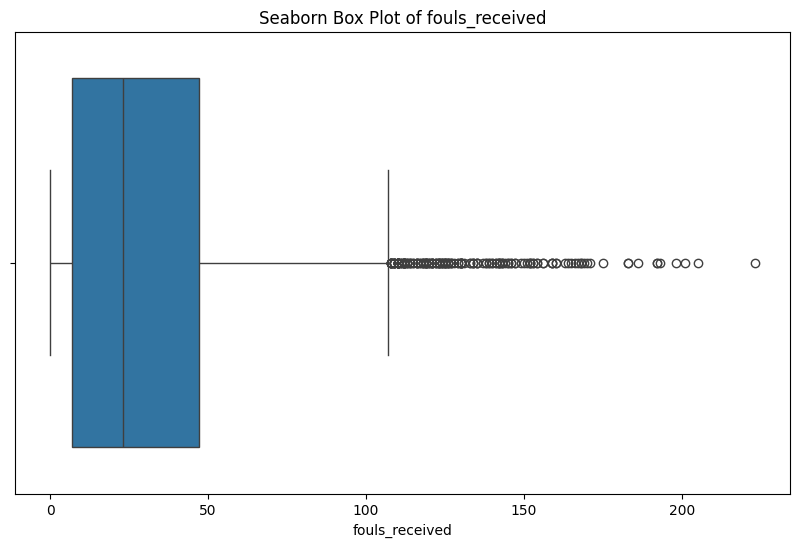

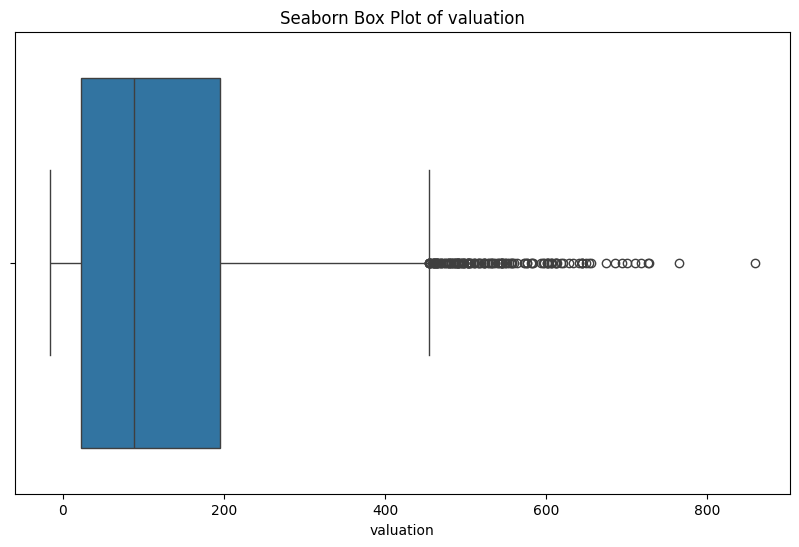

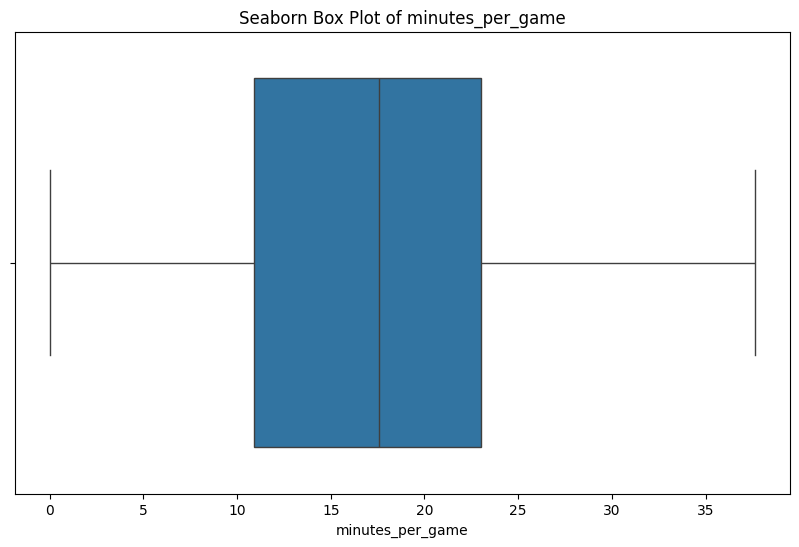

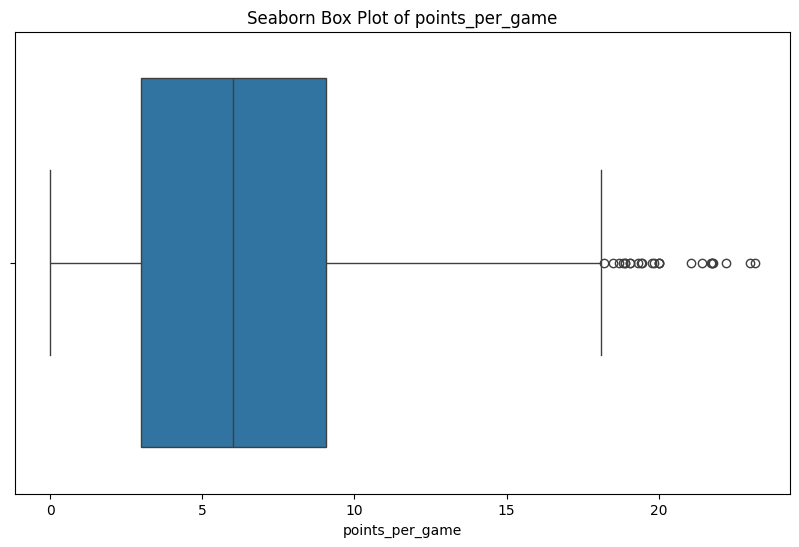

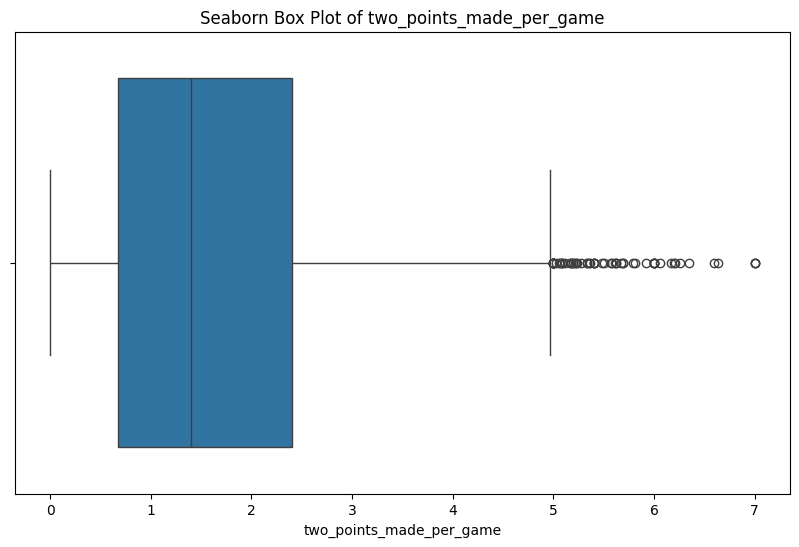

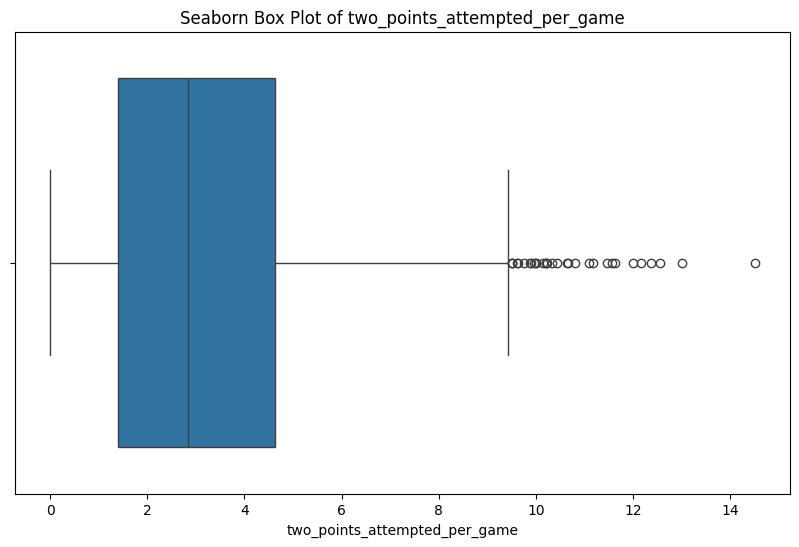

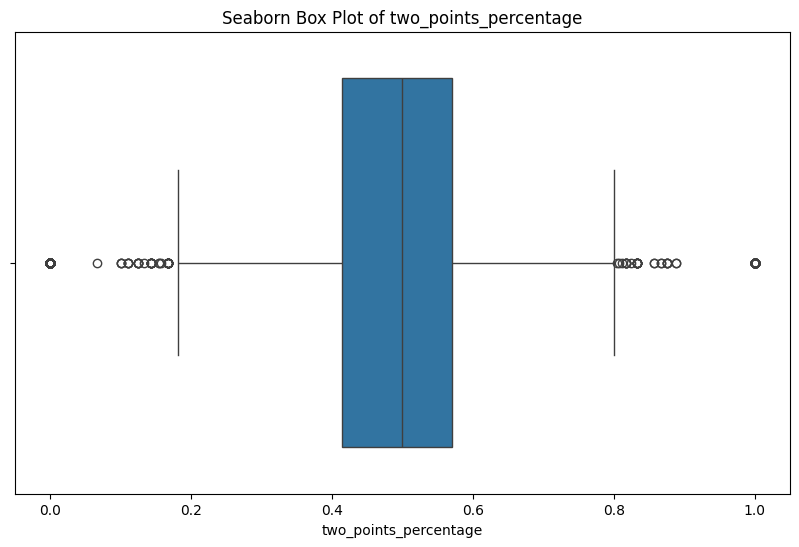

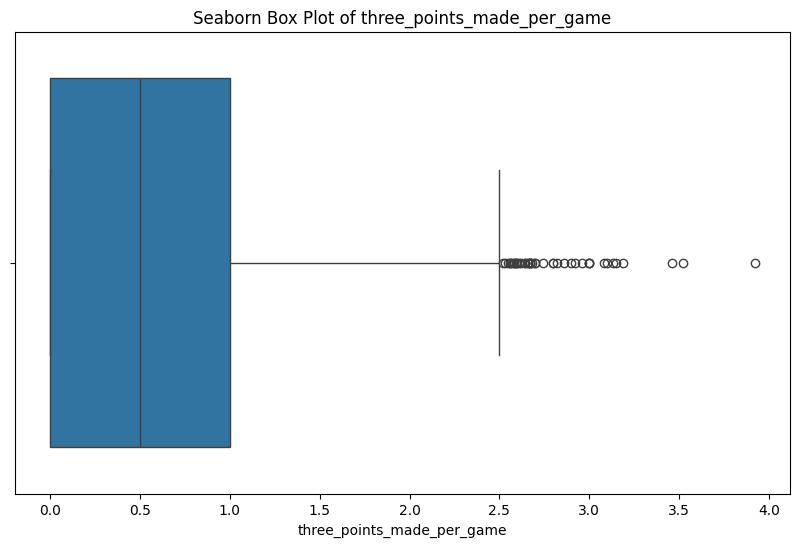

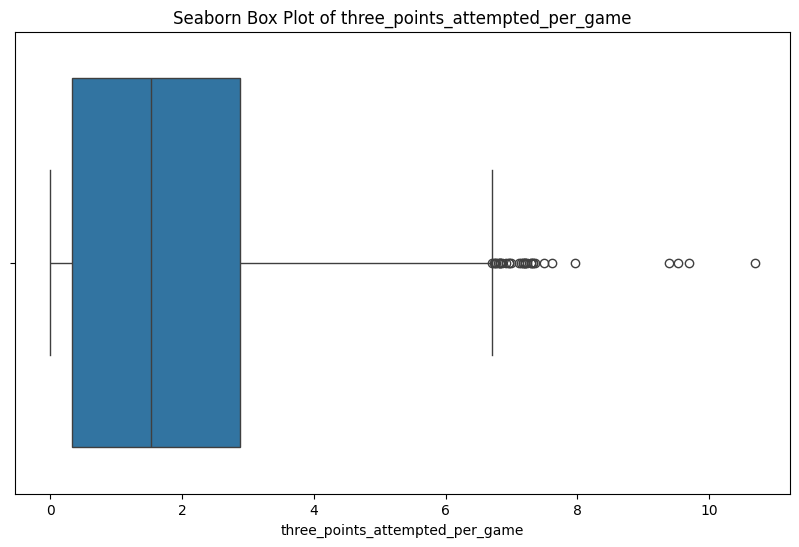

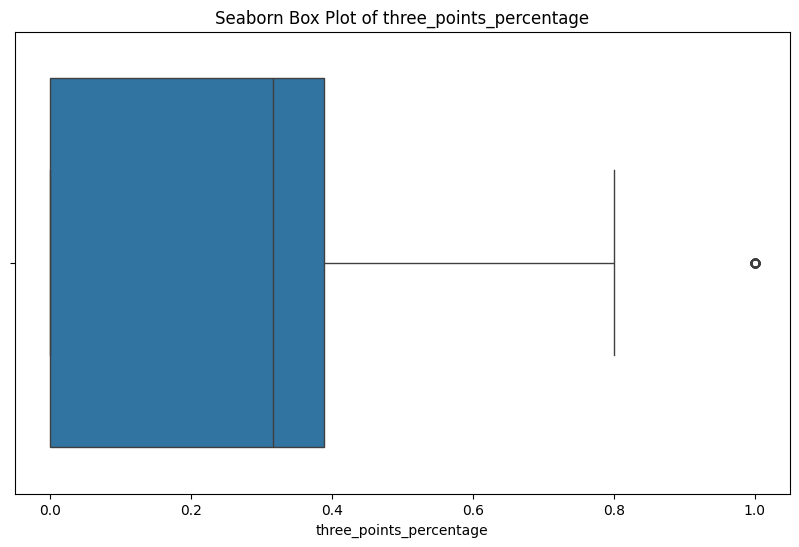

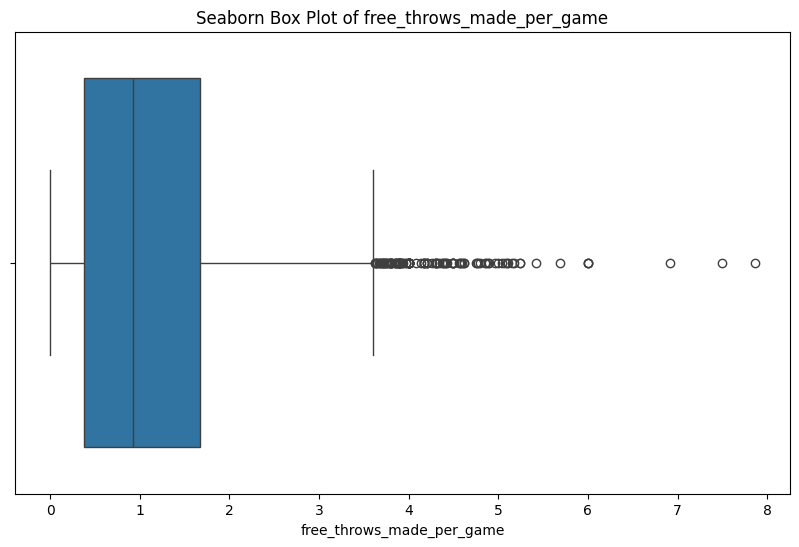

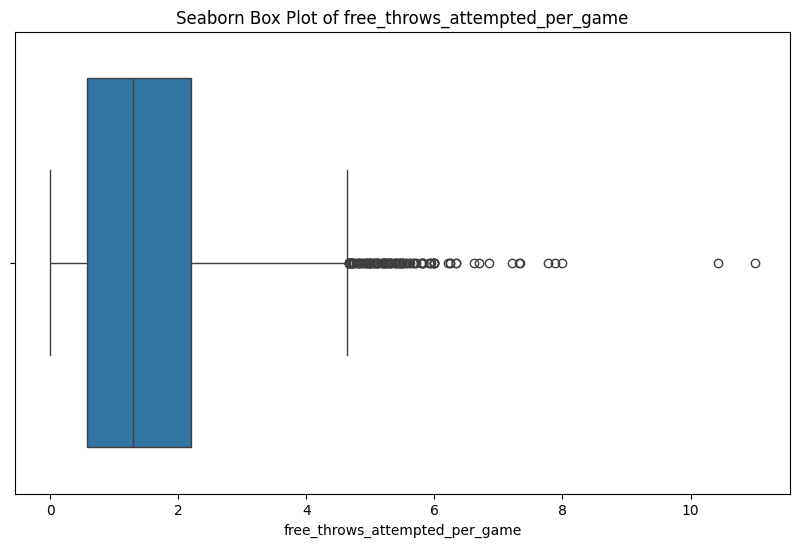

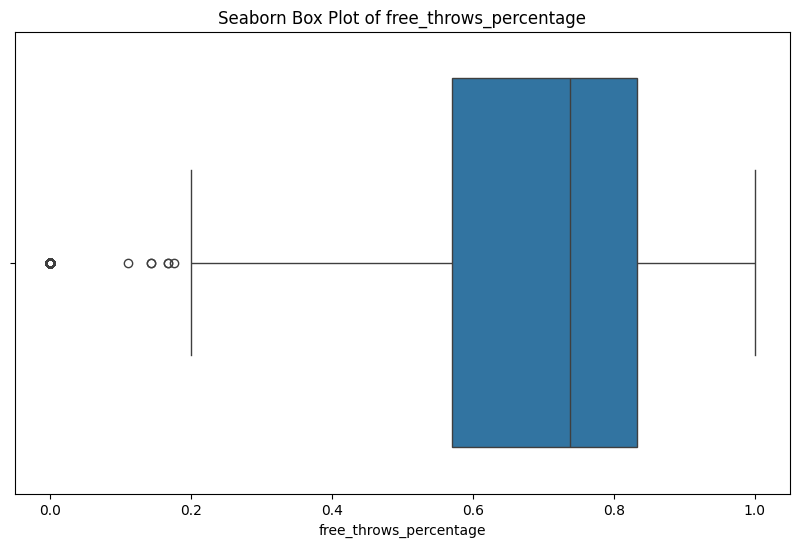

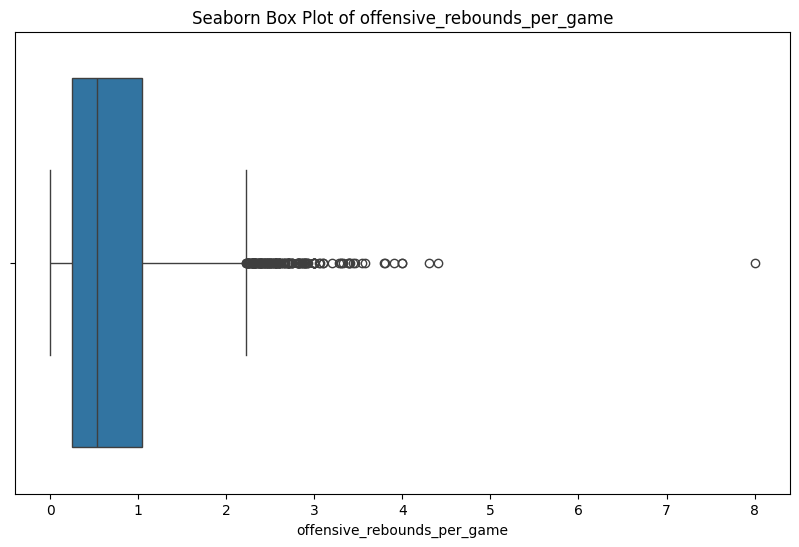

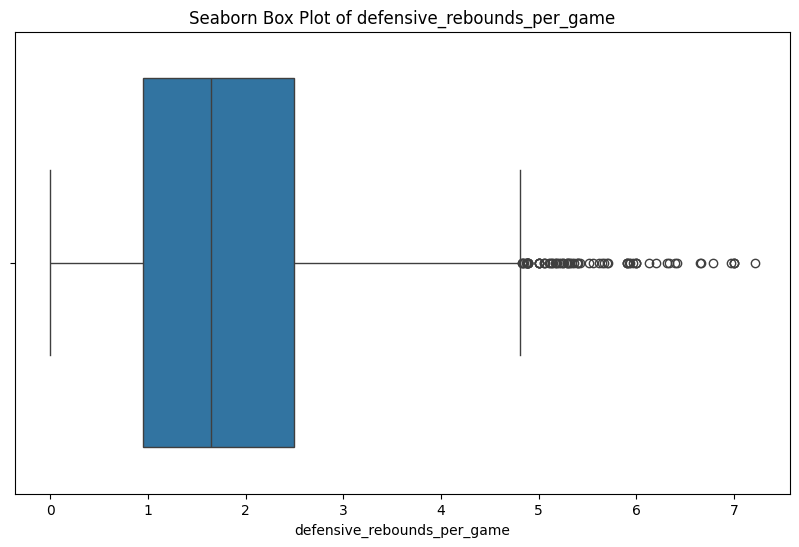

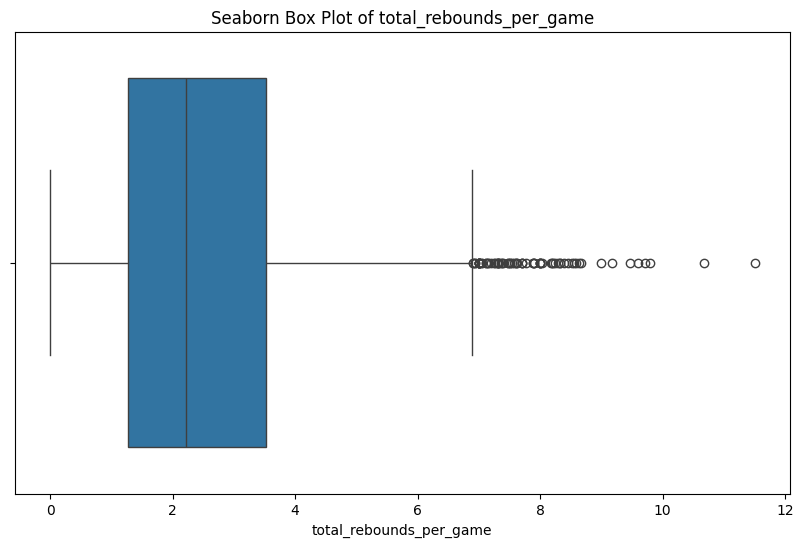

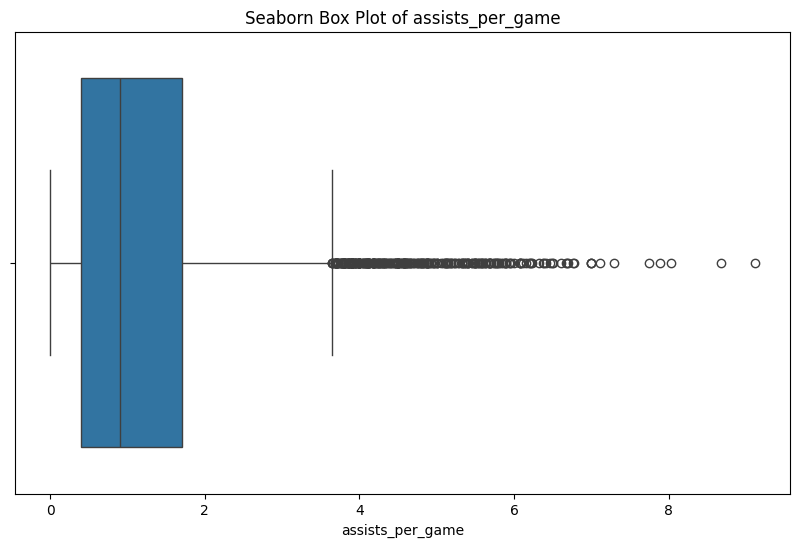

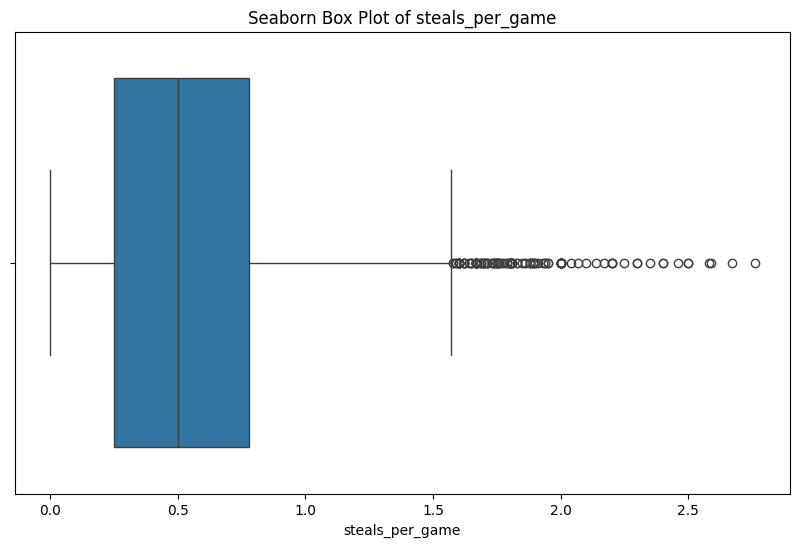

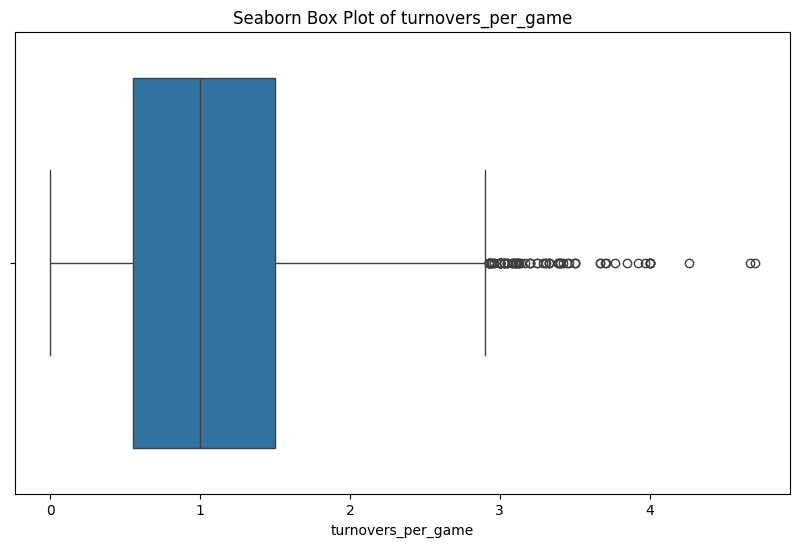

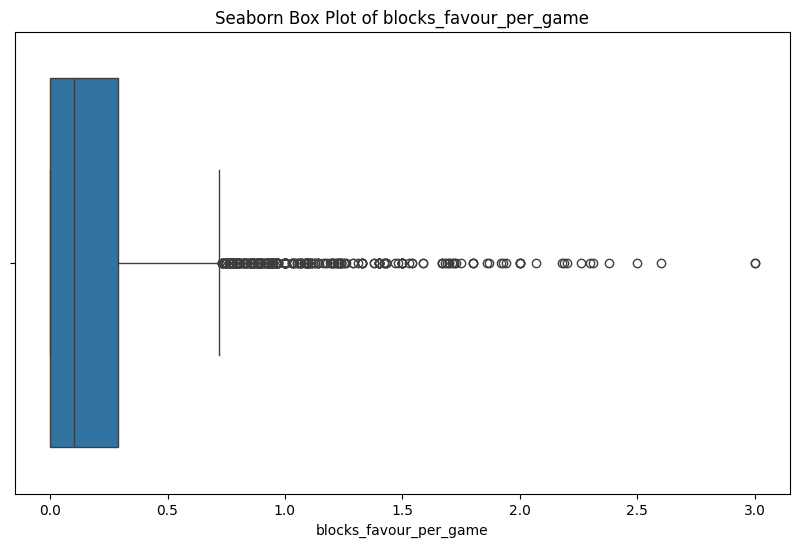

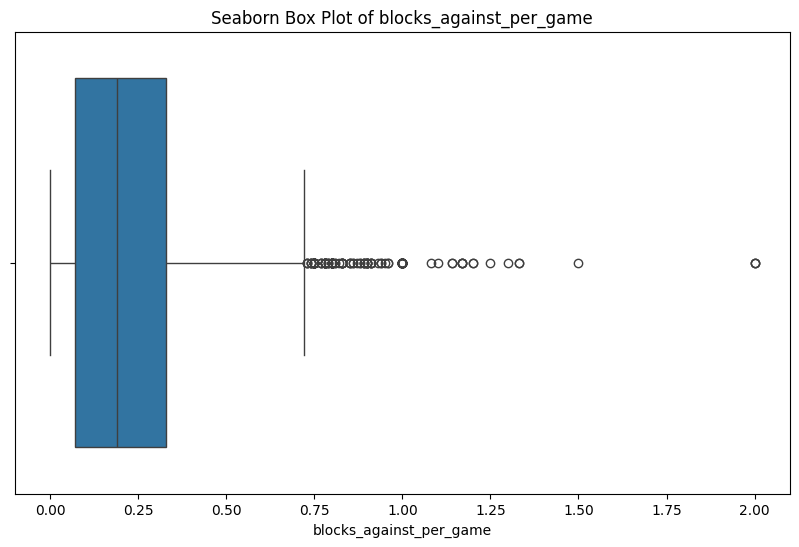

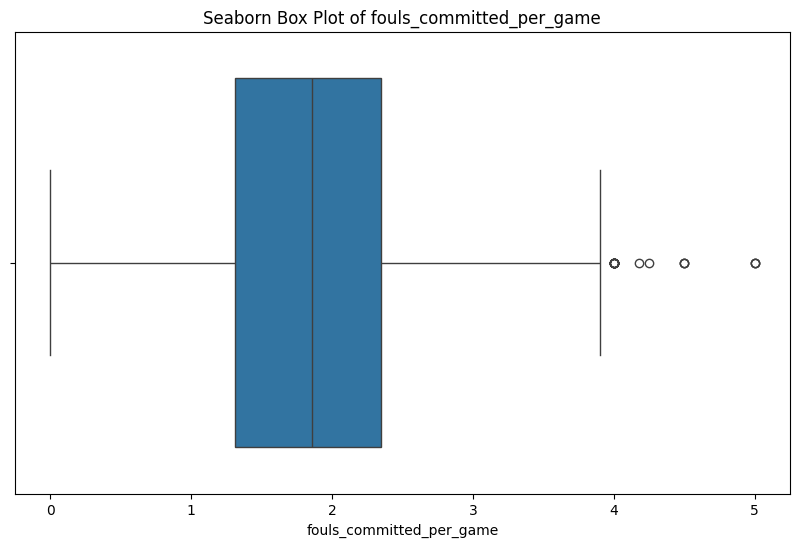

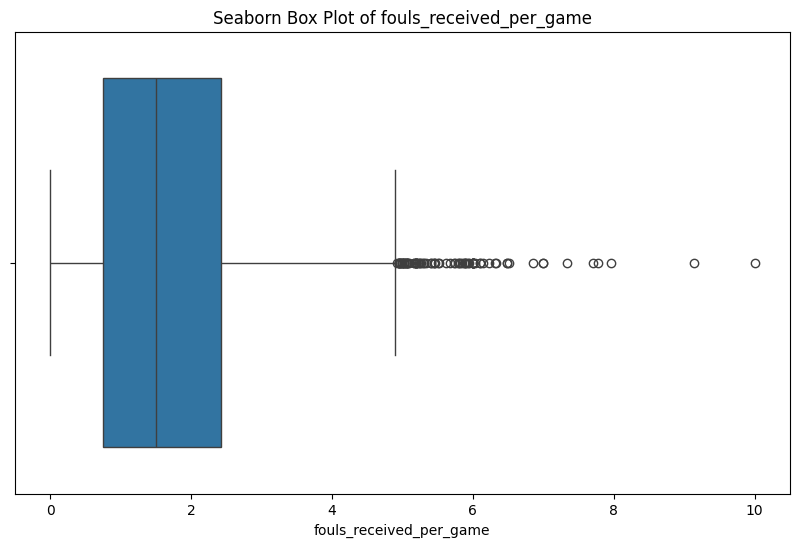

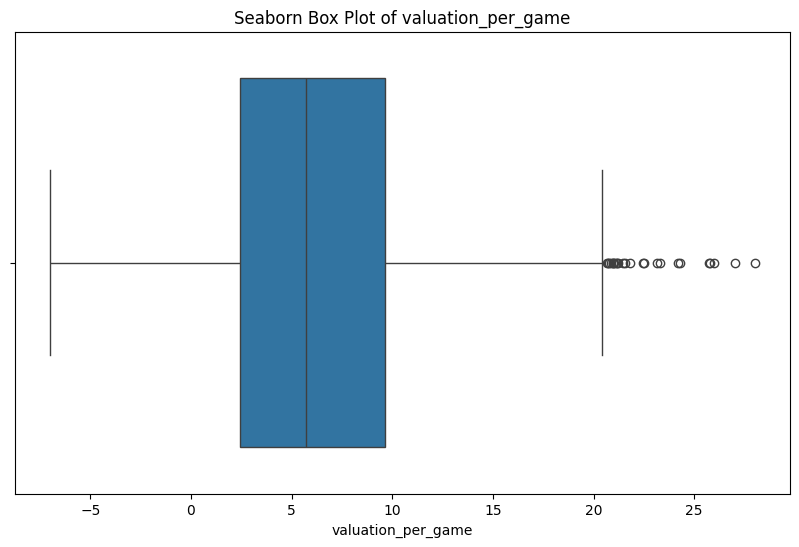

In [139]:
for col in num_cols:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[col])
    plt.title(f'Seaborn Box Plot of {col}')
    plt.show()


In [112]:
seasons = df["season_code"].value_counts().sort_index(ascending=False)

## clustering makes sense at this point since I have too many outliers and putting each player in the same category didn't really made sense 

In [115]:
df.head()

season_player_id season_code player_id           player team_id  \
0  E2017_P003733_PAM       E2017   P003733  ABALDE, ALBERTO     PAM   
1  E2019_P003733_PAM       E2019   P003733  ABALDE, ALBERTO     PAM   
2  E2020_P003733_MAD       E2020   P003733  ABALDE, ALBERTO     MAD   
3  E2021_P003733_MAD       E2021   P003733  ABALDE, ALBERTO     MAD   
4  E2022_P003733_MAD       E2022   P003733  ABALDE, ALBERTO     MAD   

   games_played  games_started  minutes  points  two_points_made  \
0          25.0            9.0    478.5     190               43   
1          23.0            4.0    499.3     179               49   
2          39.0           23.0    761.2     281               47   
3          30.0           19.0    563.4     179               40   
4          25.0           10.0    345.0      63               10   

   two_points_attempted  three_points_made  three_points_attempted  \
0                    89                 28                      54   
1                    97                 15                      53   
2                   100                 50                     115   
3                    90                 25                      74   
4                    27                  9                      36   

   free_throws_made  free_throws_attempted  offensive_rebounds  \
0                20                     23                  12   
1                36                     49                  32   
2                37                     44                  11   
3                24                     32                  20   
4                16                     24                  10   

   defensive_rebounds  total_rebounds  assists  steals  turnovers  \
0                  40              52       42       8         32   
1                  60              92       38      11         19   
2                  93             104       91      21         38   
3                  69              89       44      14         33   
4                  40              50       38       7         14   

   blocks_favour  blocks_against  fouls_committed  fouls_received  valuation  \
0              0               5               44              36        172   
1              0               8               29              40        205   
2              0               6               60              57        325   
3              0               2               56              35        163   
4              0               2               41              20         69   

   minutes_per_game  points_per_game  two_points_made_per_game  \
0             19.14             7.60                      1.72   
1             21.71             7.78                      2.13   
2             19.52             7.21                      1.21   
3             18.78             5.97                      1.33   
4             13.80             2.52                      0.40   

   two_points_attempted_per_game  two_points_percentage  \
0                           3.56                  0.483   
1                           4.22                  0.505   
2                           2.56                  0.470   
3                           3.00                  0.444   
4                           1.08                  0.370   

   three_points_made_per_game  three_points_attempted_per_game  \
0                        1.12                             2.16   
1                        0.65                             2.30   
2                        1.28                             2.95   
3                        0.83                             2.47   
4                        0.36                             1.44   

   three_points_percentage  free_throws_made_per_game  \
0                    0.519                       0.80   
1                    0.283                       1.57   
2                    0.435                       0.95   
3                    0.338                       0.80   
4                   

In [149]:
num_cols = [col for col in num_cols if "_per_game" not in col]

In [151]:
num_cols = [col for col in num_cols if "percentage" not in col]

In [152]:
num_cols

['games_played',
 'games_started',
 'minutes',
 'points',
 'two_points_made',
 'two_points_attempted',
 'three_points_made',
 'three_points_attempted',
 'free_throws_made',
 'free_throws_attempted',
 'offensive_rebounds',
 'defensive_rebounds',
 'total_rebounds',
 'assists',
 'steals',
 'turnovers',
 'blocks_favour',
 'blocks_against',
 'fouls_committed',
 'fouls_received',
 'valuation']

In [165]:
agg_df = df[num_cols]

In [166]:
agg_df["player_id"] = df["player_id"]

C:\Users\emmry\AppData\Local\Temp\ipykernel_9964\2597011436.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  agg_df["player_id"] = df["player_id"]


In [168]:
agg_df = agg_df.groupby("player_id")[num_cols].sum().reset_index()

In [179]:
agg_df.describe().T

count        mean          std   min     25%    50%  \
games_played            1738.0   48.142117    60.241798   1.0   10.00   24.0   
games_started           1738.0   22.875144    36.775799   0.0    1.00    8.0   
minutes                 1738.0  920.776064  1312.647627  10.1  129.55  370.3   
points                  1738.0  356.047756   553.586410   0.0   36.00  133.0   
two_points_made         1738.0   90.805524   147.511701   0.0    8.00   32.0   
two_points_attempted    1738.0  173.426928   270.469848   0.0   19.00   64.0   
three_points_made       1738.0   37.044879    69.995273   0.0    1.00    9.0   
three_points_attempted  1738.0  102.392980   187.097296   0.0    4.00   27.0   
free_throws_made        1738.0   63.302071   108.105900   0.0    5.00   22.0   
free_throws_attempted   1738.0   83.662255   138.835611   0.0    8.00   30.0   
offensive_rebounds      1738.0   39.355581    68.536961   0.0    4.00   14.0   
defensive_rebounds      1738.0   98.791139   153.005648   0.0   11.25   37.0   
total_rebounds          1738.0  138.146720   215.754164   0.0   16.00   50.0   
assists                 1738.0   73.386076   154.225743   0.0    5.00   21.0   
steals                  1738.0   30.103567    45.646948   0.0    3.00   12.0   
turnovers               1738.0   56.397008    87.771541   0.0    8.00   23.0   
blocks_favour           1738.0   11.846951    27.074316   0.0    0.00    3.0   
blocks_against          1738.0   11.826237    18.578801   0.0    1.00    5.0   
fouls_committed         1738.0   94.775029   126.523820   0.0   17.00   44.0   
fouls_received          1738.0   94.025316   154.716062   0.0    9.00   34.0   
valuation               1738.0  372.228423   620.306253 -16.0   27.25  117.0   

                            75%     max  
games_played              61.00   391.0  
games_started             28.00   277.0  
minutes                 1154.70  8709.6  
points                   436.75  4225.0  
two_points_made          105.00  1303.0  
two_points_attempted     206.00  2185.0  
three_points_made         39.00   580.0  
three_points_attempted   108.00  1736.0  
free_throws_made          75.00  1039.0  
free_throws_attempted    101.00  1333.0  
offensive_rebounds        43.00   788.0  
defensive_rebounds       121.00  1237.0  
total_rebounds           162.00  1777.0  
assists                   72.00  1900.0  
steals                    37.00   410.0  
turnovers                 71.00  1025.0  
blocks_favour             11.00   372.0  
blocks_against            15.00   222.0  
fouls_committed          124.00   983.0  
fouls_received           113.00  1471.0  
valuation                445.00  4765.0

In [177]:
agg_df = agg_df[agg_df["minutes"] > 10]

In [178]:
agg_df

player_id  games_played  games_started  minutes  points  two_points_made  \
0       000595           1.0            1.0     16.8       2                1   
1            1           1.0            0.0     14.1       2                1   
2           A1           1.0            0.0     13.4       8                3   
3          AVD           1.0            1.0     30.8       9                4   
5      P000002           6.0            1.0     66.4      30               11   
...        ...           ...            ...      ...     ...              ...   
1929      PTGZ          10.0            2.0    118.2      30                4   
1930      PTHB          15.0           11.0    369.0     129               42   
1931      PTHC          55.0           44.0   1371.4     468              135   
1932      PTHY          55.0            1.0    336.7      66               24   
1933      PXBB          12.0            0.0    141.7      16                6   

      two_points_attempted  three_points_made  three_points_attempted  \
0                        2                  0                       0   
1                        4                  0                       1   
2                        3                  0                       3   
3                        4                  0                       2   
5                       15                  0                       0   
...                    ...                ...                     ...   
1929                    13                  7                      13   
1930                    71                  9                      35   
1931                   245                 35                     107   
1932                    43                  1                       9   
1933                    19                  0                       6   

      free_throws_made  free_throws_attempted  offensive_rebounds  \
0                    0                      0                   0   
1                    0                      0                   0   
2                    2                      2                   1   
3                    1                      1                   0   
5                    8                      9                   9   
...                ...                    ...                 ...   
1929                 1                      2                   1   
1930                18                     25                  17   
1931                93                    116                  36   
1932                15                     27                  21   
1933                 4                      4                   0   

      defensive_rebounds  total_rebounds  assists  steals  turnovers  \
0                      1               1        0       0          1   
1                      2               2        3       2          0   
2                      2               3        1       0          2   
3                      1               1        7       0          1   
5                     13              22        0       0          3   
...                  ...             ...      ...     ...        ...   
1929                   7               8        2       3          7   
1930                  21              38       42      15         35   
1931                 182             218       72      39         63   
1932                  30              51        9      10         16   
1933                   8               8       13       4         15   

      blocks_favour  blocks_against  fouls_committed  fouls_received  \
0                 0               0                0               0   
1                 0               0                4               0   
2                 0               0                2               2   
3                 1               0                2               4   
5                 1               0                7               8   
...             ...          

In [181]:
num_cols,cat_cols,cat_but_car = grab_col_names(agg_df)

Observations: 1738
Variables: 22
cat_cols: 0
cat_but_car: 1
num_cols: 21
num_but_car: 0


In [182]:
cat_but_car

['player_id']

In [183]:
num_cols

['games_played',
 'games_started',
 'minutes',
 'points',
 'two_points_made',
 'two_points_attempted',
 'three_points_made',
 'three_points_attempted',
 'free_throws_made',
 'free_throws_attempted',
 'offensive_rebounds',
 'defensive_rebounds',
 'total_rebounds',
 'assists',
 'steals',
 'turnovers',
 'blocks_favour',
 'blocks_against',
 'fouls_committed',
 'fouls_received',
 'valuation']

In [188]:
num_cols = [col for col in num_cols if "games_started" not in col]

In [189]:
num_cols = [col for col in num_cols if "games_played" not in col]

In [191]:
for col in num_cols:
    name = f"{col}_per_game"
    agg_df[name] = agg_df[col] / agg_df["games_played"]  

C:\Users\emmry\AppData\Local\Temp\ipykernel_9964\3588972031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  agg_df[name] = agg_df[col] / agg_df["games_played"]
C:\Users\emmry\AppData\Local\Temp\ipykernel_9964\3588972031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  agg_df[name] = agg_df[col] / agg_df["games_played"]
C:\Users\emmry\AppData\Local\Temp\ipykernel_9964\3588972031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

In [193]:
agg_df.describe().T

count        mean          std   min  \
games_played                     1738.0   48.142117    60.241798   1.0   
games_started                    1738.0   22.875144    36.775799   0.0   
minutes                          1738.0  920.776064  1312.647627  10.1   
points                           1738.0  356.047756   553.586410   0.0   
two_points_made                  1738.0   90.805524   147.511701   0.0   
two_points_attempted             1738.0  173.426928   270.469848   0.0   
three_points_made                1738.0   37.044879    69.995273   0.0   
three_points_attempted           1738.0  102.392980   187.097296   0.0   
free_throws_made                 1738.0   63.302071   108.105900   0.0   
free_throws_attempted            1738.0   83.662255   138.835611   0.0   
offensive_rebounds               1738.0   39.355581    68.536961   0.0   
defensive_rebounds               1738.0   98.791139   153.005648   0.0   
total_rebounds                   1738.0  138.146720   215.754164   0.0   
assists                          1738.0   73.386076   154.225743   0.0   
steals                           1738.0   30.103567    45.646948   0.0   
turnovers                        1738.0   56.397008    87.771541   0.0   
blocks_favour                    1738.0   11.846951    27.074316   0.0   
blocks_against                   1738.0   11.826237    18.578801   0.0   
fouls_committed                  1738.0   94.775029   126.523820   0.0   
fouls_received                   1738.0   94.025316   154.716062   0.0   
valuation                        1738.0  372.228423   620.306253 -16.0   
minutes_per_game                 1738.0   16.585430     6.746529   1.2   
points_per_game                  1738.0    5.988031     3.569248   0.0   
two_points_made_per_game         1738.0    1.564559     1.113595   0.0   
two_points_attempted_per_game    1738.0    3.101641     2.000504   0.0   
three_points_made_per_game       1738.0    0.597223     0.561603   0.0   
three_points_attempted_per_game  1738.0    1.740263     1.456425   0.0   
free_throws_made_per_game        1738.0    1.067245     0.838947   0.0   
free_throws_attempted_per_game   1738.0    1.451884     1.091890   0.0   
offensive_rebounds_per_game      1738.0    0.722932     0.612738   0.0   
defensive_rebounds_per_game      1738.0    1.720399     1.019119   0.0   
total_rebounds_per_game          1738.0    2.443331     1.504931   0.0   
assists_per_game                 1738.0    1.153325     1.036716   0.0   
steals_per_game                  1738.0    0.540390     0.369678   0.0   
turnovers_per_game               1738.0    1.062019     0.619744   0.0   
blocks_favour_per_game           1738.0    0.210332     0.299311   0.0   
blocks_against_per_game          1738.0    0.227452     0.185753   0.0   
fouls_committed_per_game         1738.0    1.847794     0.708005   0.0   
fouls_received_per_game          1738.0    1.599187     1.064377   0.0   
valuation_per_game               1738.0    5.732569     4.177055  -3.5   

                                        25%         50%          75%  \
games_played                      10.000000   24.000000    61.000000   
games_started                      1.000000    8.000000    28.000000   
minutes                          129.550000  370.300000  1154.700000   
points                            36.000000  133.000000   436.750000   
two_points_made                    8.000000   32.000000   105.000000   
two_points_attempted              19.000000   64.000000   206.000000   
three_points_made                  1.000000    9.000000    39.000000   
three_points_attempted             4.000000   27.000000   108.000000   
free_throws_made                   5.000000   22.000000    75.000000   
free_throws_attempted              8.000000   30.000000   101.000000   
offensive_rebounds                 4.000000   14.000000    43.000000   
defensive_rebounds                11.250000   37.000000   121.000000   
total_rebounds                    16.000000   50.000000   162.0

In [194]:
num_cols, cat_cols,cat_but_car = grab_col_names(agg_df)

Observations: 1738
Variables: 41
cat_cols: 0
cat_but_car: 1
num_cols: 40
num_but_car: 0


In [202]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
scaled_df = scaler.fit_transform(agg_df[num_cols])

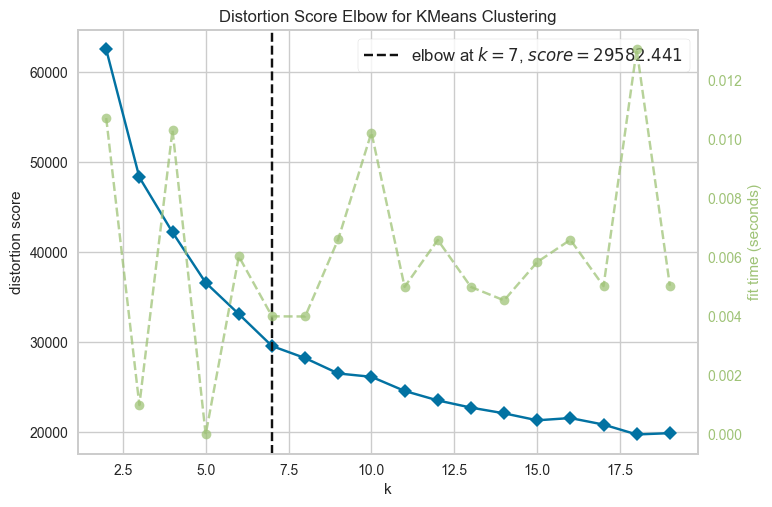

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [203]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
kmeans = KMeans()
elbow = KElbowVisualizer(kmeans, k=(2,20))
elbow.fit(scaled_df)
elbow.show()

In [204]:
kmeans = KMeans(n_clusters=elbow.elbow_value_).fit(scaled_df)

In [205]:
labels = kmeans.labels_
labels

array([2, 2, 2, ..., 1, 2, 2])

In [282]:
from sklearn.metrics import silhouette_score

labels = kmeans.fit_predict(scaled_df)
silhouette_avg = silhouette_score(scaled_df, labels)
print("The average silhouette score is:", silhouette_avg)

The average silhouette score is: 0.2809543700363988


In [206]:
agg_df["clusters"] = labels

C:\Users\emmry\AppData\Local\Temp\ipykernel_9964\3889397973.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  agg_df["clusters"] = labels


In [208]:
agg_df.head()

player_id  games_played  games_started  minutes  points  two_points_made  \
0    000595           1.0            1.0     16.8       2                1   
1         1           1.0            0.0     14.1       2                1   
2        A1           1.0            0.0     13.4       8                3   
3       AVD           1.0            1.0     30.8       9                4   
5   P000002           6.0            1.0     66.4      30               11   

   two_points_attempted  three_points_made  three_points_attempted  \
0                     2                  0                       0   
1                     4                  0                       1   
2                     3                  0                       3   
3                     4                  0                       2   
5                    15                  0                       0   

   free_throws_made  free_throws_attempted  offensive_rebounds  \
0                 0                      0                   0   
1                 0                      0                   0   
2                 2                      2                   1   
3                 1                      1                   0   
5                 8                      9                   9   

   defensive_rebounds  total_rebounds  assists  steals  turnovers  \
0                   1               1        0       0          1   
1                   2               2        3       2          0   
2                   2               3        1       0          2   
3                   1               1        7       0          1   
5                  13              22        0       0          3   

   blocks_favour  blocks_against  fouls_committed  fouls_received  valuation  \
0              0               0                0               0          1   
1              0               0                4               0          1   
2              0               0                2               2          7   
3              1               0                2               4         17   
5              1               0                7               8         46   

   minutes_per_game  points_per_game  two_points_made_per_game  \
0         16.800000              2.0                  1.000000   
1         14.100000              2.0                  1.000000   
2         13.400000              8.0                  3.000000   
3         30.800000              9.0                  4.000000   
5         11.066667              5.0                  1.833333   

   two_points_attempted_per_game  three_points_made_per_game  \
0                            2.0                         0.0   
1                            4.0                         0.0   
2                            3.0                         0.0   
3                            4.0                         0.0   
5                            2.5                         0.0   

   three_points_attempted_per_game  free_throws_made_per_game  \
0                              0.0                   0.000000   
1                              1.0                   0.000000   
2                              3.0                   2.000000   
3                              2.0                   1.000000   
5                              0.0                   1.333333   

   free_throws_attempted_per_game  offensive_rebounds_per_game  \
0                             0.0                          0.0   
1                             0.0                          0.0   
2                             2.0                          1.0   
3                             1.0                          0.0   
5                             1.5                          1.5   

   defensive_rebounds_per_game  total_rebounds_per_game  assists_per_game  \
0                     1.000000                 1.000000               0.0   
1                     2.000000                 2.000000               3.0   
2                 

In [212]:
num_cols,cat_cols,cat_but_car = grab_col_names(agg_df)

Observations: 1738
Variables: 42
cat_cols: 1
cat_but_car: 1
num_cols: 40
num_but_car: 1


In [216]:
new = agg_df.drop(["player_id"], axis=1)

In [225]:
new.groupby("clusters").agg(["mean","count"])

games_played       games_started            minutes        \
                 mean count          mean count         mean count   
clusters                                                             
0          104.100917   109     53.192661   109  1911.417431   109   
1           27.702011   547     13.981718   547   557.281353   547   
2           18.343038   790      3.894937   790   210.783671   790   
3          259.590909    22    154.863636    22  5461.677273    22   
4          209.406780    59    123.762712    59  4649.552542    59   
5          280.833333    12    162.500000    12  6962.608333    12   
6          106.753769   199     53.140704   199  2224.022613   199   

               points       two_points_made       two_points_attempted        \
                 mean count            mean count                 mean count   
clusters                                                                       
0          789.972477   109      280.633028   109           485.100917   109   
1          213.212066   547       57.020110   547           112.255941   547   
2           60.202532   790       14.127848   790            29.025316   790   
3         2335.636364    22      806.181818    22          1390.045455    22   
4         1846.593220    59      401.101695    59           782.610169    59   
5         3329.833333    12      677.250000    12          1346.083333    12   
6          845.356784   199      177.648241   199           358.281407   199   

         three_points_made       three_points_attempted        \
                      mean count                   mean count   
clusters                                                        
0                25.321101   109              73.045872   109   
1                20.138940   547              57.826325   547   
2                 7.696203   790              22.596203   790   
3                82.409091    22             231.500000    22   
4               245.949153    59             655.203390    59   
5               436.083333    12            1211.000000    12   
6               115.432161   199             312.728643   199   

         free_throws_made       free_throws_attempted        \
                     mean count                  mean count   
clusters                                                      
0              152.743119   109            219.357798   109   
1               38.755027   547             52.553931   547   
2                8.858228   790             12.622785   790   
3              476.045455    22            668.272727    22   
4              306.542373    59            385.542373    59   
5              667.083333    12            805.250000    12   
6              143.763819   199            179.216080   199   

         offensive_rebounds       defensive_rebounds       total_rebounds  \
                       mean count               mean count           mean   
clusters                                                                    
0                153.284404   109         276.926606   109     430.211009   
1                 26.067642   547          61.928702   547      87.996344   
2                  8.092405   790          18.748101   790      26.840506   
3                434.318182    22         814.454545    22    1248.772727   
4                142.644068    59         490.288136    59     632.932203   
5                 96.500000    12         570.333333    12     666.833333   
6                 59.854271   199         196.678392   199     256.532663   

                    assists            steals         turnovers        \
         count         mean count        mean count        mean count   
clusters                                                                
0          109    81.935780   109   55.000000   109  115.577982   109   
1          547    37.117002   547   18.458867   547   35.853748   547   
2          790    13.039241   790    6.434177   790   11.864557   790   
3           22  

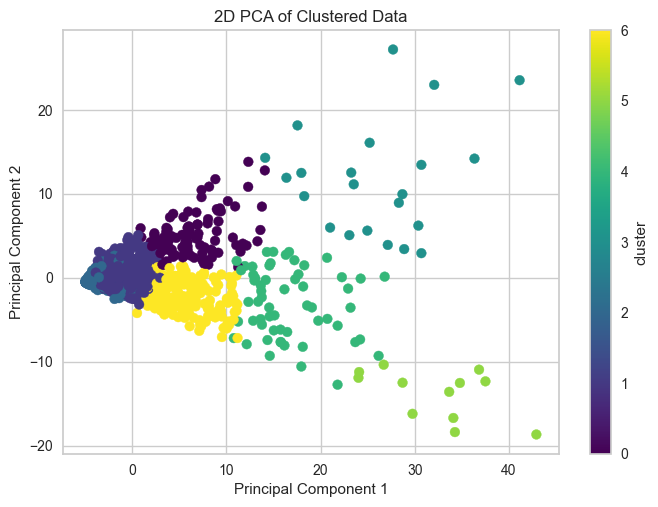

In [224]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)  # Reduce to 2 dimensions for plotting
reduced_data = pca.fit_transform(scaled_df)

plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=labels, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D PCA of Clustered Data')
plt.colorbar(label='cluster')
plt.show()

# A general but offensive look for clusters

In [247]:
cluster_means = agg_df.groupby('clusters').agg({
    'points_per_game': 'mean',
    'assists_per_game': 'mean',
    'total_rebounds_per_game': 'mean',
    'games_played':'mean'
})

In [243]:
cluster_means_total = agg_df.groupby('clusters').agg({
    'points': 'mean',
    'assists': 'mean',
    'total_rebounds': 'mean',
    'games_played':'mean'
})

In [245]:
cluster_means_total

points      assists  total_rebounds  games_played
clusters                                                        
0          789.972477    81.935780      430.211009    104.100917
1          213.212066    37.117002       87.996344     27.702011
2           60.202532    13.039241       26.840506     18.343038
3         2335.636364   284.863636     1248.772727    259.590909
4         1846.593220   421.864407      632.932203    209.406780
5         3329.833333  1286.416667      666.833333    280.833333
6          845.356784   208.120603      256.532663    106.753769

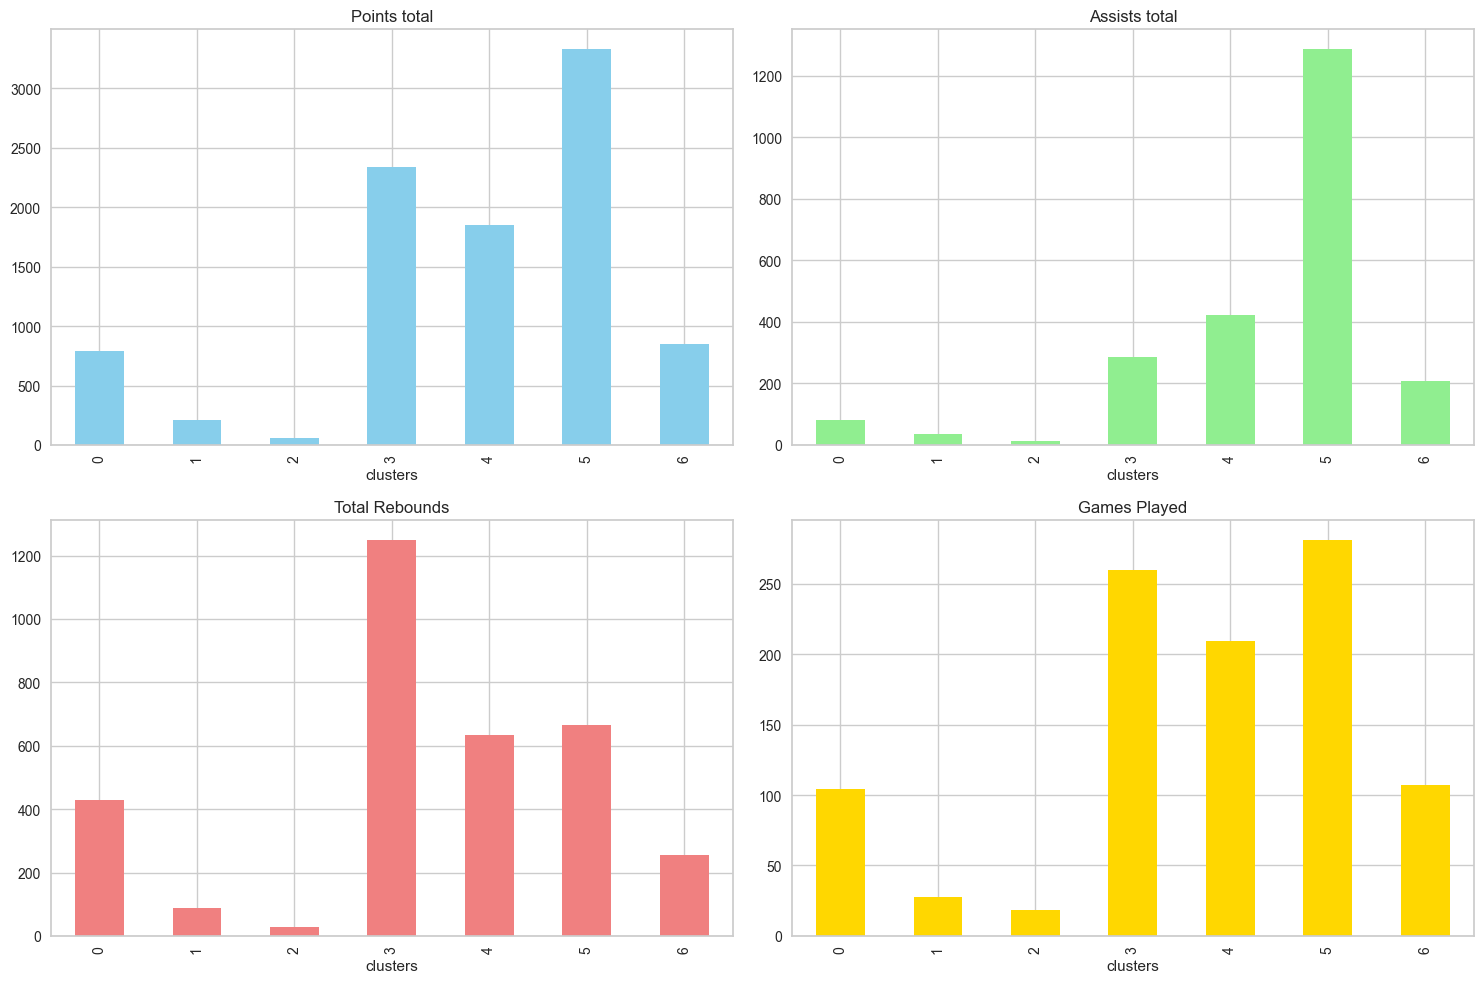

In [246]:
import matplotlib.pyplot as plt

# Assuming cluster_means is already computed as shown earlier
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))  # Adjust the size and layout as needed

cluster_means_total['points'].plot(kind='bar', ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Points total')

cluster_means_total['assists'].plot(kind='bar', ax=axes[0, 1], color='lightgreen')
axes[0, 1].set_title('Assists total')

cluster_means_total['total_rebounds'].plot(kind='bar', ax=axes[1, 0], color='lightcoral')
axes[1, 0].set_title('Total Rebounds')

cluster_means_total['games_played'].plot(kind='bar', ax=axes[1, 1], color='gold')
axes[1, 1].set_title('Games Played')

plt.tight_layout()
plt.show()


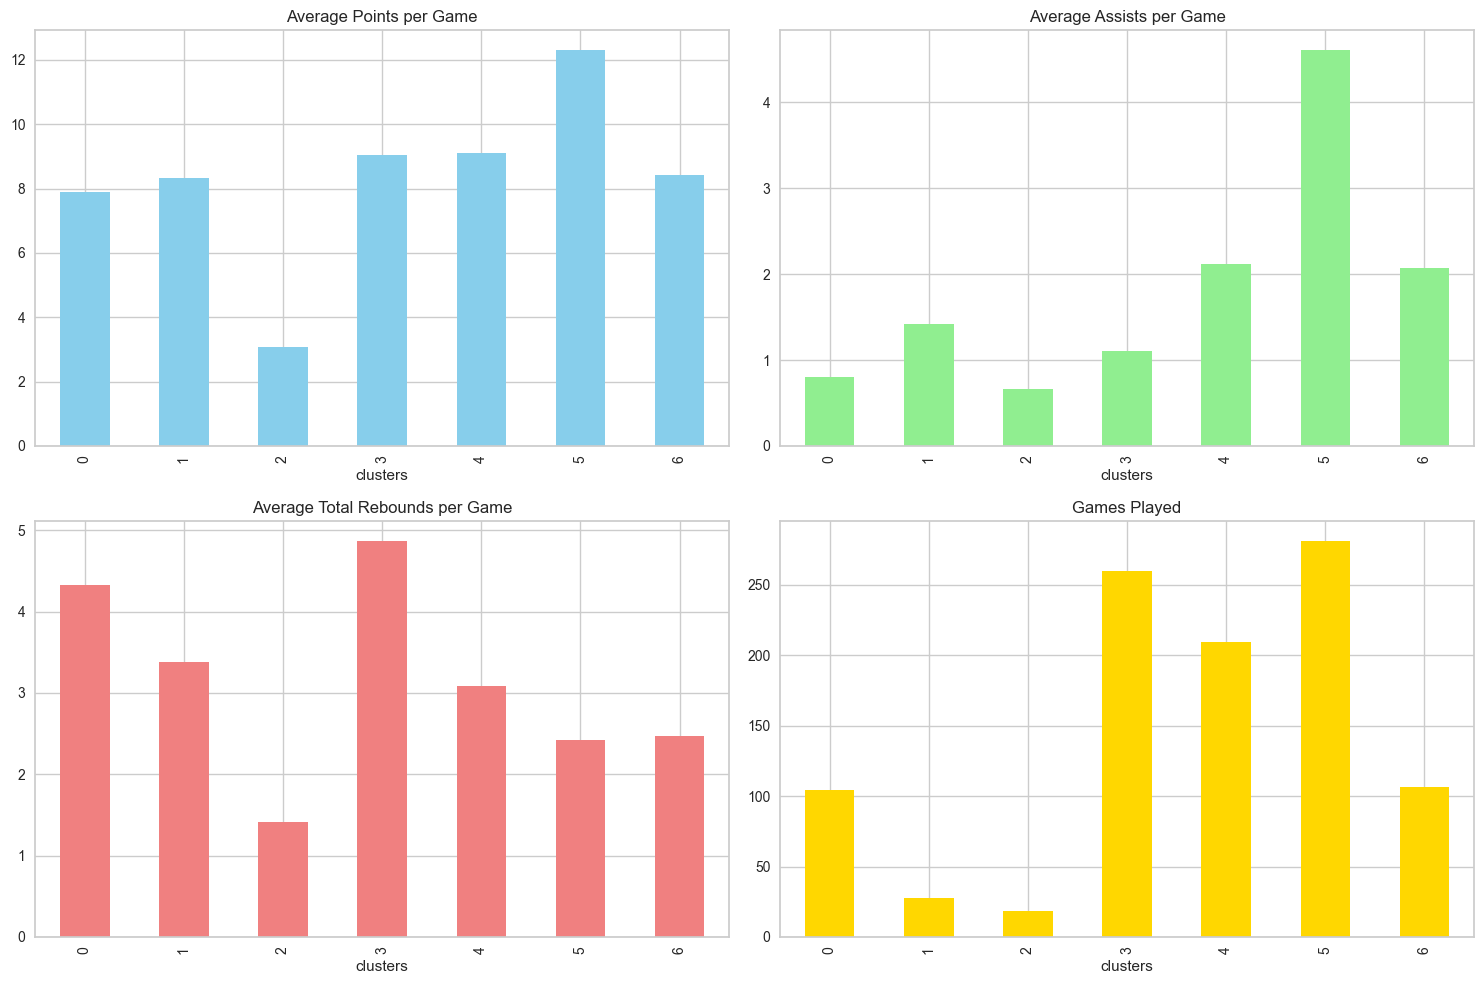

In [248]:
import matplotlib.pyplot as plt

# Assuming cluster_means is already computed as shown earlier
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))  # Adjust the size and layout as needed

cluster_means['points_per_game'].plot(kind='bar', ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Average Points per Game')

cluster_means['assists_per_game'].plot(kind='bar', ax=axes[0, 1], color='lightgreen')
axes[0, 1].set_title('Average Assists per Game')

cluster_means['total_rebounds_per_game'].plot(kind='bar', ax=axes[1, 0], color='lightcoral')
axes[1, 0].set_title('Average Total Rebounds per Game')

cluster_means['games_played'].plot(kind='bar', ax=axes[1, 1], color='gold')
axes[1, 1].set_title('Games Played')

plt.tight_layout()
plt.show()


# These plots gave me insight of the clusters and their possible positions in game
## Cluster-3 is for sure superstar-scorer 4-5
## Cluster-5 is for sure scorer 1-2 mostly point-guards I would assume
## Cluster-0 is most likely to be developing power-forward, centers  
## Cluster-1 small-forward, power-forward
# Cluster-2 is hard to distinguish and needs further examination !!
## Cluster-4 most likely to have a helper-guard or second man forward positions

In [273]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm  # Corrected import for colormaps

def plot_cluster_means(cluster_means_df, columns_info, figsize=(15, 10)):
    """
    Plots bar charts of aggregated statistics for each cluster.

    :param cluster_means_df: DataFrame containing the aggregated cluster data.
    :param columns_info: Dictionary with column names as keys and plot title as values.
    :param figsize: Tuple representing the figure size.
    """
    nrows = len(columns_info) // 2 + len(columns_info) % 2  # Calculate the number of rows needed
    ncols = 2

    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize)
    colormap = cm.get_cmap('tab10')  # Access colormap directly from cm

    for i, (column, title) in enumerate(columns_info.items()):
        ax = axes[i // ncols, i % ncols]
        color = colormap(i % 10)  # Get color from colormap; 'tab10' has 10 colors
        cluster_means_df[column].plot(kind='bar', ax=ax, color=color)
        ax.set_title(title)

    plt.tight_layout()
    plt.show()


# Defensive look for clusters

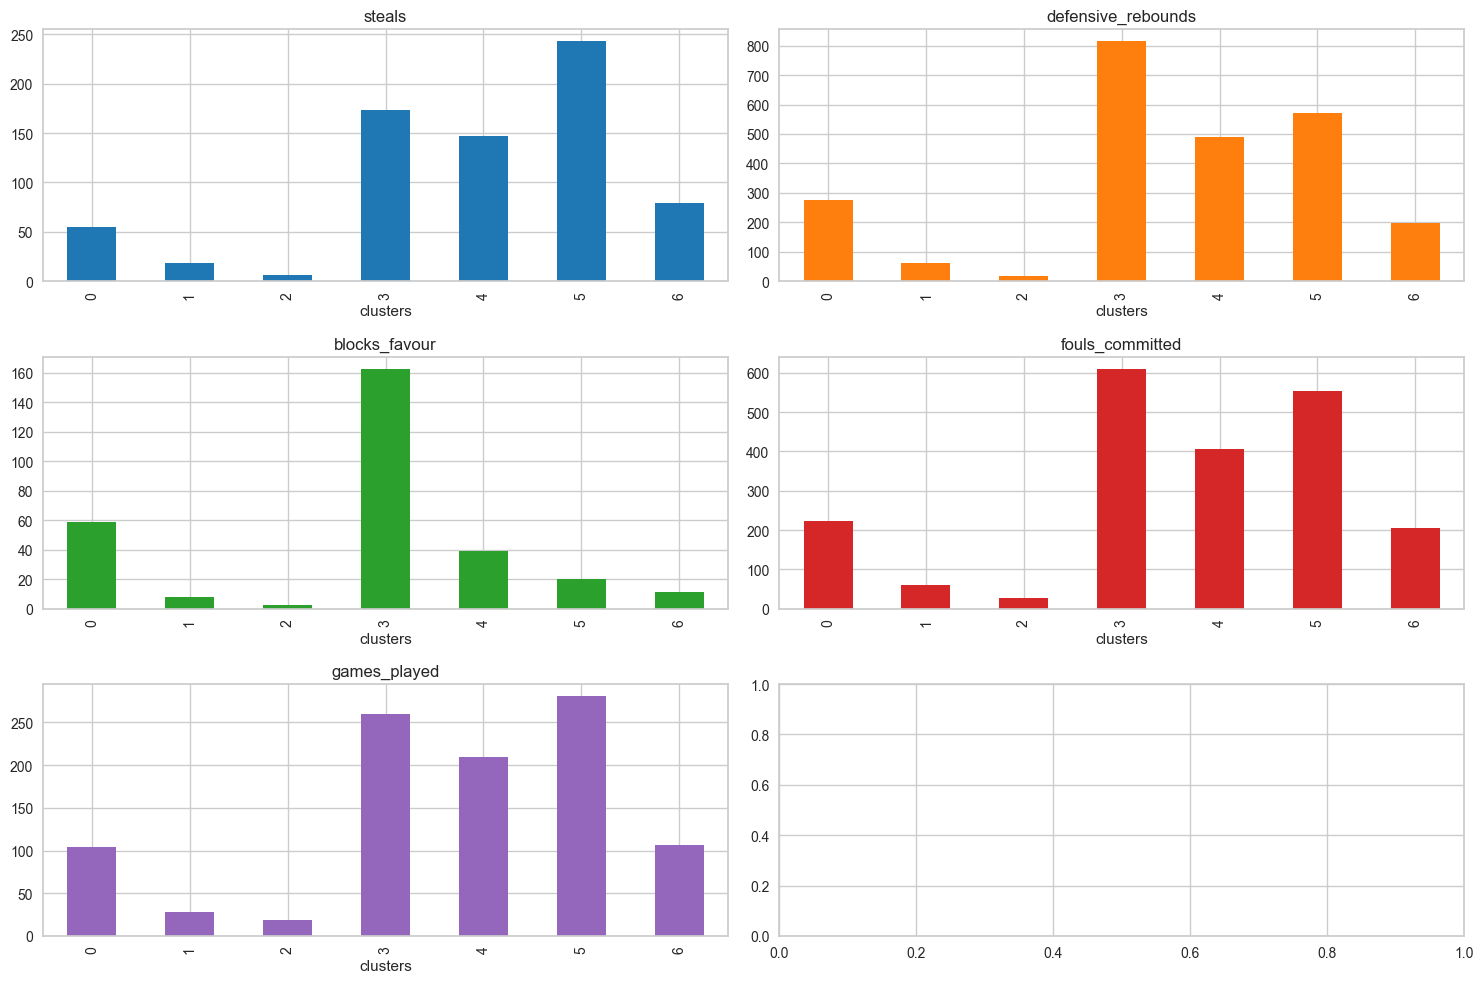

In [278]:
clusters_means = new.groupby("clusters").mean()

cluster_means_total_defensive = {
    'steals': 'steals',
    'defensive_rebounds': 'defensive_rebounds',
    'blocks_favour': 'blocks_favour',
    'fouls_committed': 'fouls_committed',
    'games_played':'games_played'
}

plot_cluster_means(clusters_means,cluster_means_total_defensive)

# totals

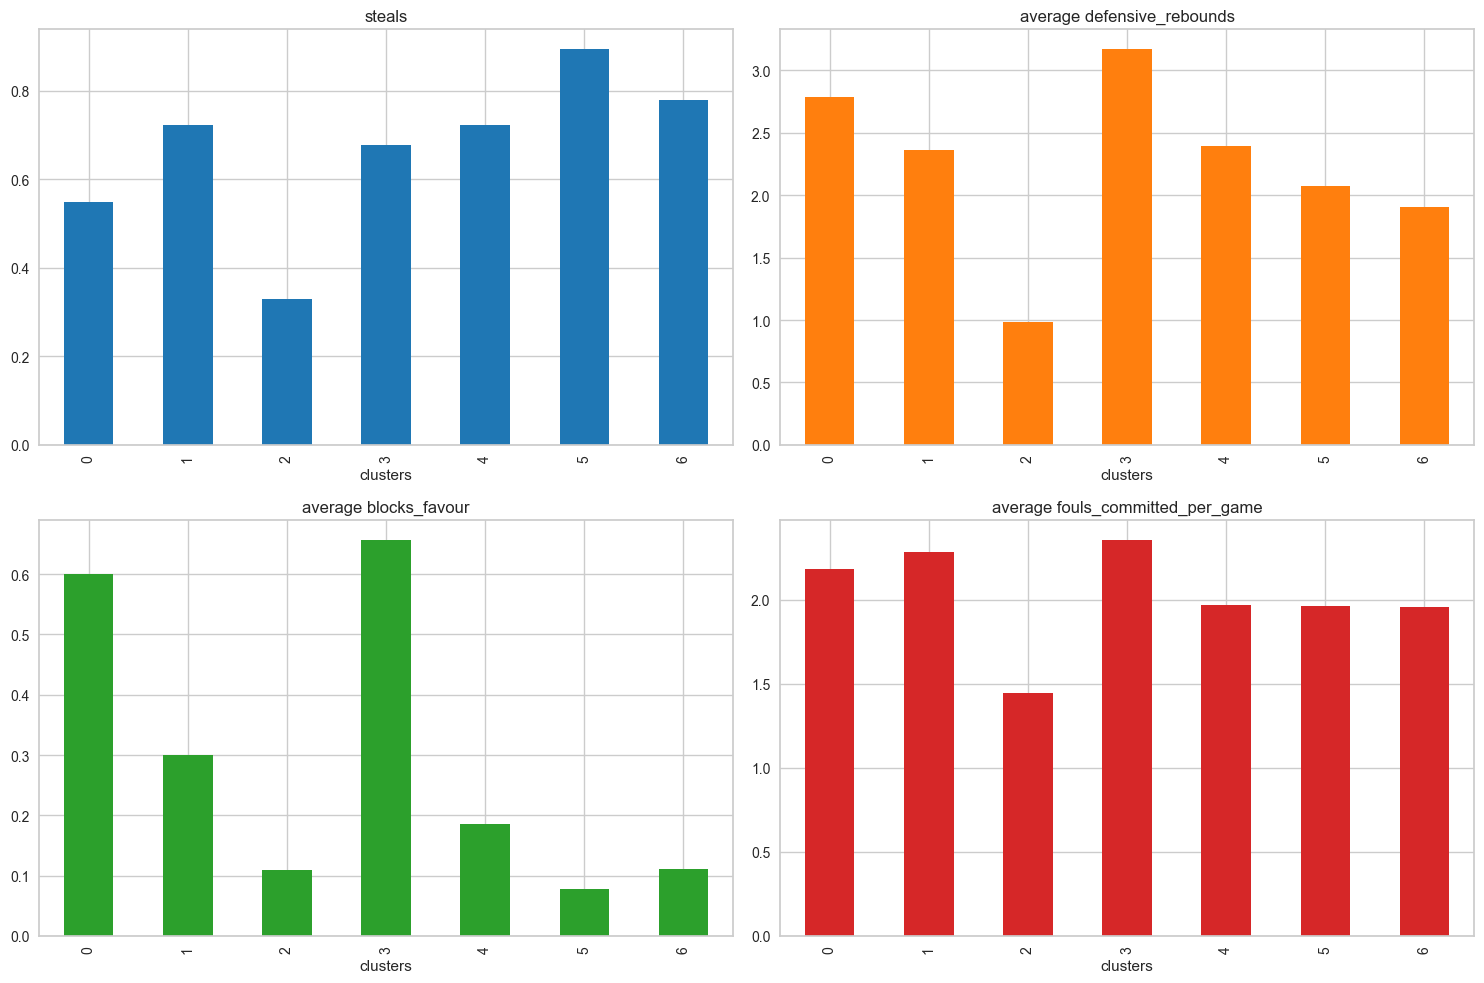

In [281]:
cluster_means_total_defensive = {
    'steals_per_game': 'steals',
    'defensive_rebounds_per_game': 'average defensive_rebounds',
    'blocks_favour_per_game': 'average blocks_favour',
    'fouls_committed_per_game': 'average fouls_committed_per_game'
}

plot_cluster_means(clusters_means,cluster_means_total_defensive)

# As I can see, 
## Cluster-2 is hard to examine since it does not contribute as much as others to build up a characteristic
## Cluster-1 is now more likely to be defensive forward (2-3)
## Cluster-4 is most likely to be defensively efficient forwards



<Axes: >

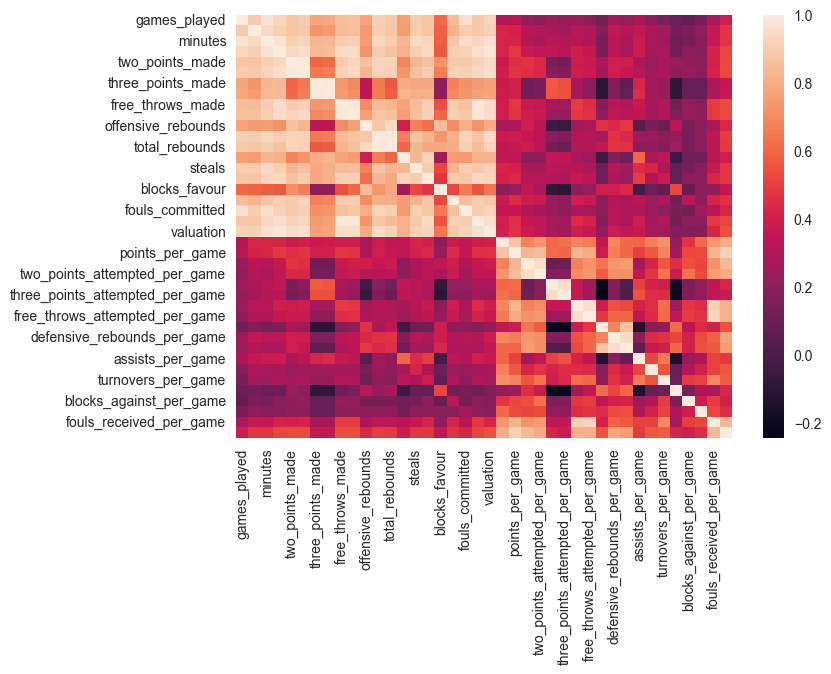

In [294]:
corr_mat = agg_df[num_cols].corr()

sns.heatmap(corr_mat)

In [304]:
per_game = [col for col in num_cols if "_per_game" in col]

<Axes: >

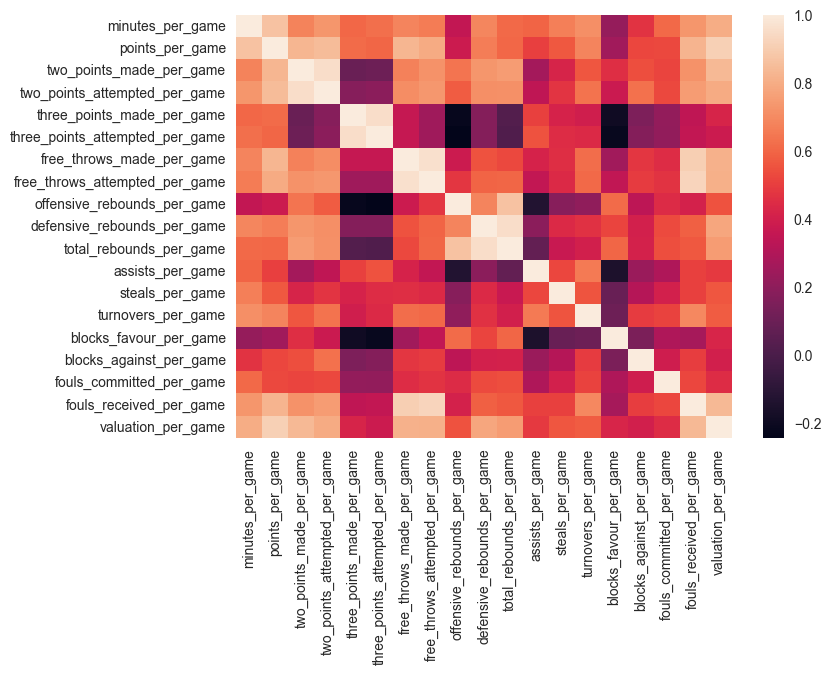

In [307]:
per_corr = agg_df[per_game].corr()
sns.heatmap(per_corr)

In [308]:
per_corr

minutes_per_game  points_per_game  \
minutes_per_game                         1.000000         0.868266   
points_per_game                          0.868266         1.000000   
two_points_made_per_game                 0.678618         0.826201   
two_points_attempted_per_game            0.731921         0.844579   
three_points_made_per_game               0.602724         0.615486   
three_points_attempted_per_game          0.623876         0.597857   
free_throws_made_per_game                0.682009         0.825040   
free_throws_attempted_per_game           0.658201         0.792546   
offensive_rebounds_per_game              0.351522         0.379656   
defensive_rebounds_per_game              0.685205         0.663545   
total_rebounds_per_game                  0.607135         0.603922   
assists_per_game                         0.592306         0.501159   
steals_per_game                          0.666677         0.562880   
turnovers_per_game                       0.709314         0.680544   
blocks_favour_per_game                   0.220758         0.252480   
blocks_against_per_game                  0.467710         0.519928   
fouls_committed_per_game                 0.607563         0.525797   
fouls_received_per_game                  0.732154         0.824018   
valuation_per_game                       0.798849         0.909724   

                                 two_points_made_per_game  \
minutes_per_game                                 0.678618   
points_per_game                                  0.826201   
two_points_made_per_game                         1.000000   
two_points_attempted_per_game                    0.955557   
three_points_made_per_game                       0.093726   
three_points_attempted_per_game                  0.102270   
free_throws_made_per_game                        0.672054   
free_throws_attempted_per_game                   0.718488   
offensive_rebounds_per_game                      0.635425   
defensive_rebounds_per_game                      0.728166   
total_rebounds_per_game                          0.751820   
assists_per_game                                 0.265217   
steals_per_game                                  0.417871   
turnovers_per_game                               0.559831   
blocks_favour_per_game                           0.454575   
blocks_against_per_game                          0.539645   
fouls_committed_per_game                         0.514122   
fouls_received_per_game                          0.722547   
valuation_per_game                               0.835208   

                                 two_points_attempted_per_game  \
minutes_per_game                                      0.731921   
points_per_game                                       0.844579   
two_points_made_per_game                              0.955557   
two_points_attempted_per_game                         1.000000   
three_points_made_per_game                            0.175691   
three_points_attempted_per_game                       0.191993   
free_throws_made_per_game                             0.703619   
free_throws_attempted_per_game                        0.735159   
offensive_rebounds_per_game                           0.575672   
defensive_rebounds_per_game                           0.710721   
total_rebounds_per_game                               0.715678   
assists_per_game                                      0.340798   
steals_per_game                                       0.473949   
turnovers_per_game                                    0.632384   
blocks_favour_per_game                                0.375623   
blocks_against_per_game                               0.627310   
fouls_committed_per_game                              0.527233   
fouls_received_per_game                               0.750720   
valuation_per_game                                    0.794833   

                                 three_points_made_per_game  \
minutes_per_game           

In [342]:
highly_correlated = []

# Assuming 'per_corr' is a correlation matrix
for i, col in enumerate(corr_mat.columns):
    for j, row in enumerate(corr_mat.index):
        # Check if the absolute value of correlation is greater than 0.8 and i < j to avoid duplication
        if abs(corr_mat.iloc[i, j]) > 0.8 and i < j:
            highly_correlated.append((col))

# Print or return the list
for item in highly_correlated:
    print("###################################" ,end="\n\n")
    print(f"Columns: {item[0]} and {item[1]}, Correlation Value: {item[2]}")
    print (end="\n\n")


###################################

Columns: g and a, Correlation Value: m


###################################

Columns: g and a, Correlation Value: m


###################################

Columns: g and a, Correlation Value: m


###################################

Columns: g and a, Correlation Value: m


###################################

Columns: g and a, Correlation Value: m


###################################

Columns: g and a, Correlation Value: m


###################################

Columns: g and a, Correlation Value: m


###################################

Columns: g and a, Correlation Value: m


###################################

Columns: g and a, Correlation Value: m


###################################

Columns: g and a, Correlation Value: m


###################################

Columns: g and a, Correlation Value: m


###################################

Columns: g and a, Correlation Value: m


###################################

Columns: g and a, Correlati

In [321]:
from sklearn.decomposition import PCA

# Initialize PCA, you can specify the number of components here, or leave it as default to keep all components
pca = PCA()
X_pca = pca.fit_transform(scaled_df)

# To see how much variance is explained by each component
explained_variance = pca.explained_variance_ratio_
print(explained_variance)

# Cumulative variance explained
cumulative_variance = np.cumsum(explained_variance)
print(cumulative_variance)

[6.56571667e-01 1.31408889e-01 7.18818244e-02 2.60909933e-02
 2.03704218e-02 1.64189091e-02 1.46034258e-02 9.31759662e-03
 6.99569425e-03 6.06427936e-03 5.43289470e-03 4.83325128e-03
 4.22477747e-03 3.83388808e-03 3.59006009e-03 2.73544863e-03
 2.70166584e-03 2.41548085e-03 1.94657105e-03 1.51354494e-03
 1.33583643e-03 1.00630942e-03 8.99873632e-04 8.48096759e-04
 6.61186940e-04 5.63181197e-04 3.80227554e-04 3.18585845e-04
 2.74317745e-04 2.44094086e-04 2.12227649e-04 1.42344870e-04
 8.80786878e-05 7.43559316e-05 1.29485930e-31 5.59963297e-33
 5.59963297e-33 5.59963297e-33 5.59963297e-33 5.59963297e-33]
[0.65657167 0.78798056 0.85986238 0.88595337 0.9063238  0.9227427
 0.93734613 0.94666373 0.95365942 0.9597237  0.9651566  0.96998985
 0.97421462 0.97804851 0.98163857 0.98437402 0.98707569 0.98949117
 0.99143774 0.99295128 0.99428712 0.99529343 0.9961933  0.9970414
 0.99770259 0.99826577 0.998646   0.99896458 0.9992389  0.99948299
 0.99969522 0.99983757 0.99992564 1.         1.         

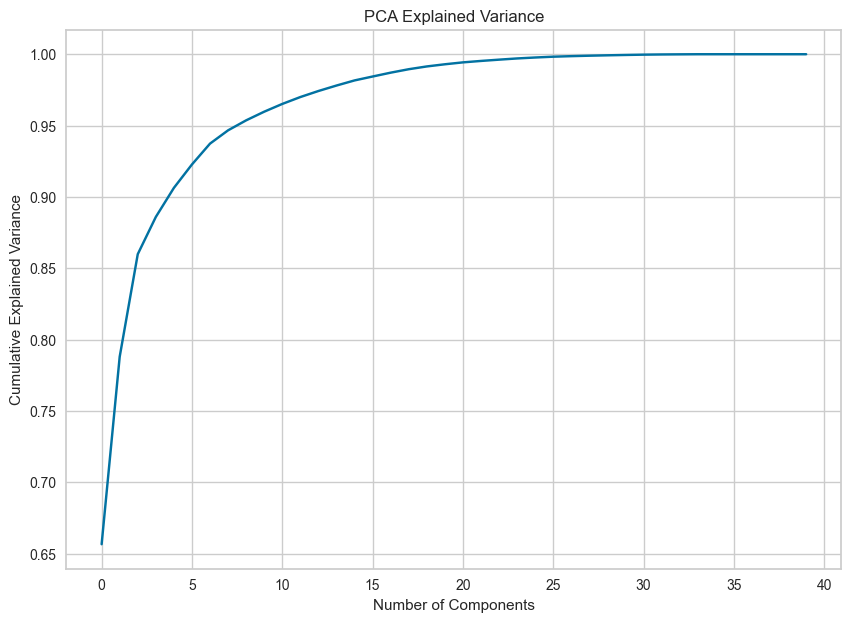

In [322]:
# Plot the explained variances
plt.figure(figsize=(10, 7))
plt.plot(cumulative_variance)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Explained Variance')
plt.grid(True)
plt.show()



In [324]:
n_components = next(x for x, val in enumerate(cumulative_variance) if val > 0.90)  # for example, 85%
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(scaled_df)

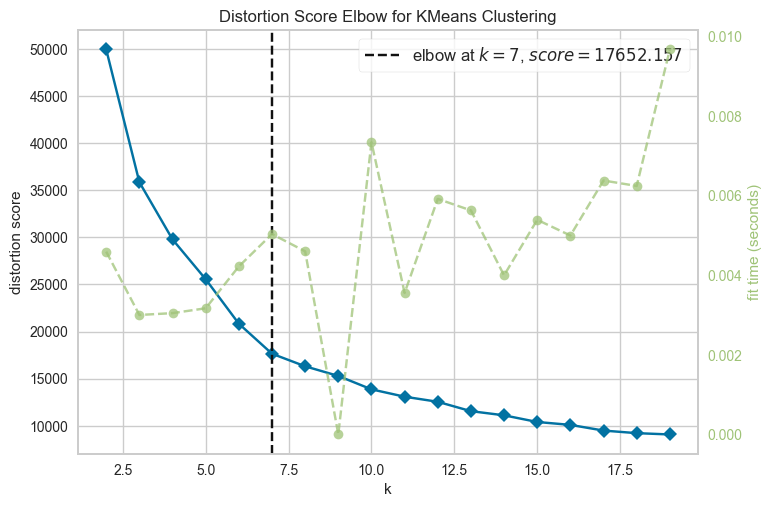

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [326]:
kmeans = KMeans()
elbow = KElbowVisualizer(kmeans, k=(2,20))
elbow.fit(X_pca)
elbow.show()

In [335]:
kmeans = KMeans(n_clusters=9).fit(scaled_df)

In [336]:
labels = kmeans.labels_
labels

from sklearn.metrics import silhouette_score

labels = kmeans.fit_predict(scaled_df)
silhouette_avg = silhouette_score(scaled_df, labels)
print("The average silhouette score is:", silhouette_avg)

The average silhouette score is: 0.229488470653677


In [344]:
unique_list = list(set(highly_correlated))

In [358]:
no_corr_df = new.drop(unique_list, axis=1)

In [360]:
no_corr_df.drop(["clusters"], axis=1, inplace=True)

In [367]:
no_corr_df

three_points_made  blocks_favour  blocks_against  valuation  \
0                     0              0               0          1   
1                     0              0               0          1   
2                     0              0               0          7   
3                     0              1               0         17   
5                     0              1               0         46   
...                 ...            ...             ...        ...   
1929                  7              1               2          8   
1930                  9              4               2        121   
1931                 35             10              10        513   
1932                  1              3               5         43   
1933                  0              0               1          2   

      minutes_per_game  two_points_attempted_per_game  \
0            16.800000                       2.000000   
1            14.100000                       4.000000   
2            13.400000                       3.000000   
3            30.800000                       4.000000   
5            11.066667                       2.500000   
...                ...                            ...   
1929         11.820000                       1.300000   
1930         24.600000                       4.733333   
1931         24.934545                       4.454545   
1932          6.121818                       0.781818   
1933         11.808333                       1.583333   

      three_points_made_per_game  three_points_attempted_per_game  \
0                       0.000000                         0.000000   
1                       0.000000                         1.000000   
2                       0.000000                         3.000000   
3                       0.000000                         2.000000   
5                       0.000000                         0.000000   
...                          ...                              ...   
1929                    0.700000                         1.300000   
1930                    0.600000                         2.333333   
1931                    0.636364                         1.945455   
1932                    0.018182                         0.163636   
1933                    0.000000                         0.500000   

      offensive_rebounds_per_game  total_rebounds_per_game  assists_per_game  \
0                        0.000000                 1.000000          0.000000   
1                        0.000000                 2.000000          3.000000   
2                        1.000000                 3.000000          1.000000   
3                        0.000000                 1.000000          7.000000   
5                        1.500000                 3.666667          0.000000   
...                           ...                      ...               ...   
1929                     0.100000                 0.800000          0.200000   
1930                     1.133333                 2.533333          2.800000   
1931                     0.654545                 3.963636          1.309091   
1932                     0.381818                 0.927273          0.163636   
1933                     0.000000                 0.666667          1.083333   

      steals_per_game  turnovers_per_game  blocks_favour_per_game  \
0            0.000000            1.000000                0.000000   
1            2.000000            0.000000                0.000000   
2            0.000000            2.000000                0.000000   
3            0.000000            1.000000                1.000000   
5            0.000000            0.500000                0.166667   
...               ...                 ...                     ...   
1929         0.300000            0.700000                0.100000   
1930         1.000000            2.333333                0.266667   
1931         0.709091            1.145455                0.181818   
1932        

In [362]:
no_corr_scaled = scaler.fit_transform(no_corr_df)

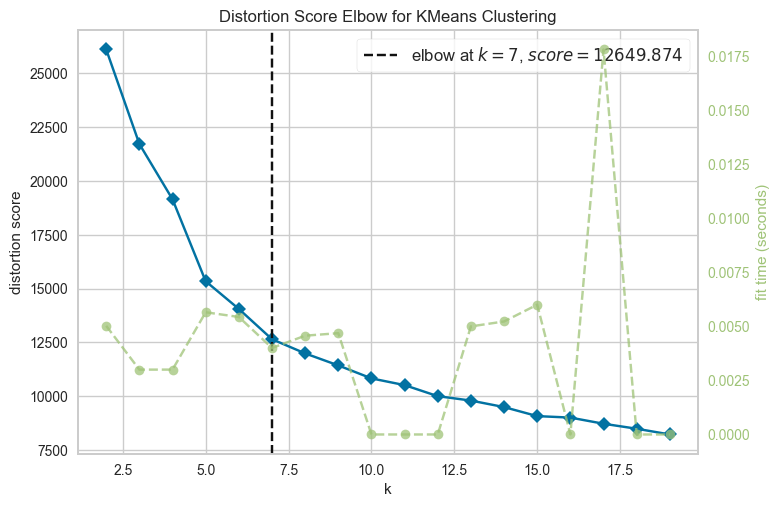

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [364]:
kmeans = KMeans()
elbow = KElbowVisualizer(kmeans, k=(2,20))
elbow.fit(no_corr_scaled)
elbow.show()

In [365]:
kmeans = KMeans(n_clusters=elbow.elbow_value_).fit(no_corr_scaled)

<Figure size 800x550 with 0 Axes>

In [366]:
labels = kmeans.labels_
labels

from sklearn.metrics import silhouette_score

labels = kmeans.fit_predict(no_corr_scaled)
silhouette_avg = silhouette_score(no_corr_scaled, labels)
print("The average silhouette score is:", silhouette_avg)

The average silhouette score is: 0.2575043058841992


In [378]:
new_cols = [col for col in new.columns if "_per_game" not in col]
new_df = new[new_cols]

In [379]:
new_df.drop(["clusters"], axis=1, inplace=True)

In [380]:
new_df = scaler.fit_transform(new_df)

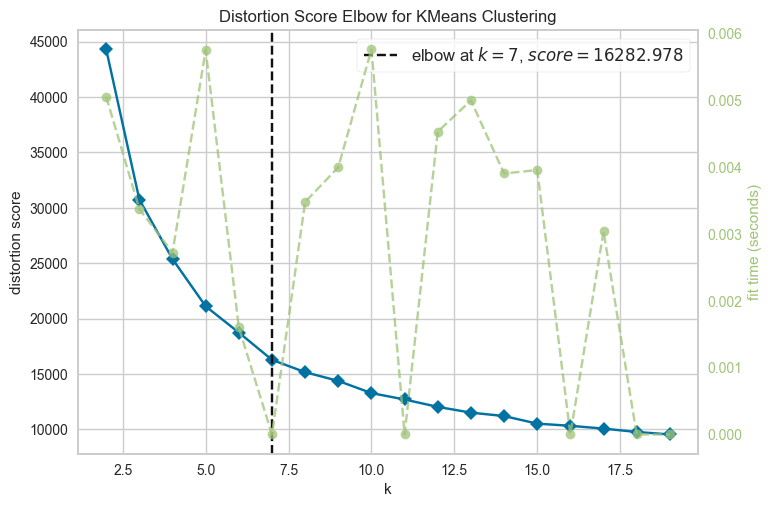

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [381]:
kmeans = KMeans()
elbow = KElbowVisualizer(kmeans, k=(2,20))
elbow.fit(new_df)
elbow.show()

In [382]:
kmeans = KMeans(n_clusters=elbow.elbow_value_).fit(new_df)

In [383]:
labels = kmeans.labels_
labels

from sklearn.metrics import silhouette_score

labels = kmeans.fit_predict(no_corr_scaled)
silhouette_avg = silhouette_score(no_corr_scaled, labels)
print("The average silhouette score is:", silhouette_avg)

The average silhouette score is: 0.25726080771355614


In [396]:
from sklearn.cluster import AgglomerativeClustering

hierarchical = AgglomerativeClustering(n_clusters=5)
labels = hierarchical.fit_predict(scaled_df)

In [397]:
silhouette_avg = silhouette_score(scaled_df, labels)
print("The average silhouette score is:", silhouette_avg)

The average silhouette score is: 0.40655443597173613


In [410]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=3)  # Number of clusters
gmm.fit(scaled_df)
labels = gmm.predict(scaled_df)

In [411]:
silhouette_avg = silhouette_score(scaled_df, labels)
print("The average silhouette score is:", silhouette_avg)

The average silhouette score is: 0.057661649309094426


In [424]:
from sklearn.cluster import SpectralClustering

spectral = SpectralClustering(n_clusters=3, affinity='nearest_neighbors')
labels = spectral.fit_predict(scaled_df)


In [425]:
silhouette_avg = silhouette_score(scaled_df, labels)
print("The average silhouette score is:", silhouette_avg)

The average silhouette score is: 0.15420878757665835


In [432]:
hierarchical = AgglomerativeClustering(n_clusters=5)
labels = hierarchical.fit_predict(scaled_df)
silhouette_avg = silhouette_score(scaled_df, labels)
print("The average silhouette score is:", silhouette_avg)

The average silhouette score is: 0.40655443597173613


In [449]:
for linkage in ['ward', 'average', 'complete', 'single']:
    clustering = AgglomerativeClustering(n_clusters=5, linkage=linkage)
    labels = clustering.fit_predict(scaled_df)
    score = silhouette_score(scaled_df, labels)
    print(f"Silhouette score with {linkage} linkage: {score}")


Silhouette score with ward linkage: 0.40655443597173613
Silhouette score with average linkage: 0.6873676372882916
Silhouette score with complete linkage: 0.6330217887462632
Silhouette score with single linkage: 0.7759218560399241


In [552]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import adjusted_rand_score
import numpy as np

# Assuming scaled_df is your data
X_shuffled = np.random.permutation(scaled_df)
half = int(scaled_df.shape[0] / 2)

# Split data into two halves
X1 = X_shuffled[:half]
X2 = X_shuffled[half:]

# clustering = AgglomerativeClustering(n_clusters=6, linkage="single")
clustering = KMeans(n_clusters=7)

agg1_labels = clustering.fit_predict(X1)
agg2_labels = clustering.fit_predict(X2)

ari = adjusted_rand_score(agg1_labels, agg2_labels)
print(f"Adjusted Rand Index: {ari}")


Adjusted Rand Index: -0.03979285908967021


In [556]:
num_cols,cat_cols,cat_but_car =grab_col_names(agg_df)

Observations: 1738
Variables: 42
cat_cols: 1
cat_but_car: 1
num_cols: 40
num_but_car: 1


In [560]:
for col in num_cols:
    if check_outliers(agg_df,col):
       index =  grab_outliers(agg_df,col,True)
       print(col,len(index)) 

games_started 2
points 4
two_points_made 6
two_points_attempted 5
three_points_made 9
three_points_attempted 8
free_throws_made 10
free_throws_attempted 9
offensive_rebounds 10
defensive_rebounds 4
total_rebounds 6
assists 15
steals 3
turnovers 8
blocks_favour 17
blocks_against 6
fouls_committed 2
fouls_received 7
valuation 5
free_throws_attempted_per_game 1
blocks_favour_per_game 6
fouls_received_per_game 1


In [561]:
def replace_with_trehold(data_frame,col_name):
    up,low = outliers_treshold(data_frame,col_name)
    data_frame.loc[(data_frame[col_name] > up), col_name] = up
    data_frame.loc[(data_frame[col_name] < low), col_name] = low

In [1218]:
def replace_with_mode(data_frame,col_name):
    up,low = outliers_treshold(data_frame,col_name)
    data_frame.loc[(data_frame[col_name] > up), col_name] = data_frame[col_name].mode()
    data_frame.loc[(data_frame[col_name] < low), col_name] = data_frame[col_name].mode()

In [565]:
for col in num_cols:
    if check_outliers(agg_df,col):
       replace_with_trehold(agg_df,col) 

In [586]:
agg_df.head()

player_id  games_played  games_started  minutes  points  two_points_made  \
0    000595           1.0            1.0     16.8     2.0              1.0   
1         1           1.0            0.0     14.1     2.0              1.0   
2        A1           1.0            0.0     13.4     8.0              3.0   
3       AVD           1.0            1.0     30.8     9.0              4.0   
5   P000002           6.0            1.0     66.4    30.0             11.0   

   two_points_attempted  three_points_made  three_points_attempted  \
0                   2.0                0.0                     0.0   
1                   4.0                0.0                     1.0   
2                   3.0                0.0                     3.0   
3                   4.0                0.0                     2.0   
5                  15.0                0.0                     0.0   

   free_throws_made  free_throws_attempted  offensive_rebounds  \
0               0.0                    0.0                 0.0   
1               0.0                    0.0                 0.0   
2               2.0                    2.0                 1.0   
3               1.0                    1.0                 0.0   
5               8.0                    9.0                 9.0   

   defensive_rebounds  total_rebounds  assists  steals  turnovers  \
0                   1             1.0      0.0     0.0        1.0   
1                   2             2.0      3.0     2.0        0.0   
2                   2             3.0      1.0     0.0        2.0   
3                   1             1.0      7.0     0.0        1.0   
5                  13            22.0      0.0     0.0        3.0   

   blocks_favour  blocks_against  fouls_committed  fouls_received  valuation  \
0            0.0               0              0.0             0.0        1.0   
1            0.0               0              4.0             0.0        1.0   
2            0.0               0              2.0             2.0        7.0   
3            1.0               0              2.0             4.0       17.0   
5            1.0               0              7.0             8.0       46.0   

   minutes_per_game  points_per_game  two_points_made_per_game  \
0         16.800000              2.0                  1.000000   
1         14.100000              2.0                  1.000000   
2         13.400000              8.0                  3.000000   
3         30.800000              9.0                  4.000000   
5         11.066667              5.0                  1.833333   

   two_points_attempted_per_game  three_points_made_per_game  \
0                            2.0                         0.0   
1                            4.0                         0.0   
2                            3.0                         0.0   
3                            4.0                         0.0   
5                            2.5                         0.0   

   three_points_attempted_per_game  free_throws_made_per_game  \
0                              0.0                   0.000000   
1                              1.0                   0.000000   
2                              3.0                   2.000000   
3                              2.0                   1.000000   
5                              0.0                   1.333333   

   free_throws_attempted_per_game  offensive_rebounds_per_game  \
0                             0.0                          0.0   
1                             0.0                          0.0   
2                             2.0                          1.0   
3                             1.0                          0.0   
5                             1.5                          1.5   

   defensive_rebounds_per_game  total_rebounds_per_game  assists_per_game  \
0                     1.000000                 1.000000               0.0   
1                     2.000000                 2.000000               3.0   
2                 

In [588]:
num_cols,cat_cols,cat_but_car = grab_col_names(agg_df)

Observations: 1738
Variables: 42
cat_cols: 1
cat_but_car: 1
num_cols: 40
num_but_car: 1


In [591]:
new_agg = agg_df[num_cols]

In [598]:
drop = [col for col in num_cols if "_per_game"  in col]
drop

['minutes_per_game',
 'points_per_game',
 'two_points_made_per_game',
 'two_points_attempted_per_game',
 'three_points_made_per_game',
 'three_points_attempted_per_game',
 'free_throws_made_per_game',
 'free_throws_attempted_per_game',
 'offensive_rebounds_per_game',
 'defensive_rebounds_per_game',
 'total_rebounds_per_game',
 'assists_per_game',
 'steals_per_game',
 'turnovers_per_game',
 'blocks_favour_per_game',
 'blocks_against_per_game',
 'fouls_committed_per_game',
 'fouls_received_per_game',
 'valuation_per_game']

In [599]:
drop = drop + ["valuation"]

In [600]:
new_agg.drop(drop,axis=1,inplace=True)

In [602]:
new_agg.describe().T

count        mean          std   min     25%    50%  \
games_played            1738.0   48.142117    60.241798   1.0   10.00   24.0   
games_started           1738.0   22.847526    36.593773   0.0    1.00    8.0   
minutes                 1738.0  920.776064  1312.647627  10.1  129.55  370.3   
points                  1738.0  355.085731   547.511020   0.0   36.00  133.0   
two_points_made         1738.0   90.134781   142.886336   0.0    8.00   32.0   
two_points_attempted    1738.0  172.755826   266.027185   0.0   19.00   64.0   
three_points_made       1738.0   36.744030    68.003126   0.0    1.00    9.0   
three_points_attempted  1738.0  101.075374   178.165145   0.0    4.00   27.0   
free_throws_made        1738.0   62.403337   101.982106   0.0    5.00   22.0   
free_throws_attempted   1738.0   82.580912   131.773368   0.0    8.00   30.0   
offensive_rebounds      1738.0   38.566600    62.781342   0.0    4.00   14.0   
defensive_rebounds      1738.0   98.625432   151.912674   0.0   11.25   37.0   
total_rebounds          1738.0  137.710012   212.860679   0.0   16.00   50.0   
assists                 1738.0   69.803582   127.253681   0.0    5.00   21.0   
steals                  1738.0   30.035457    45.164263   0.0    3.00   12.0   
turnovers               1738.0   55.577675    81.873711   0.0    8.00   23.0   
blocks_favour           1738.0   11.220584    22.162038   0.0    0.00    3.0   
blocks_against          1738.0   11.709436    17.589614   0.0    1.00    5.0   
fouls_committed         1738.0   94.660961   125.785122   0.0   17.00   44.0   
fouls_received          1738.0   93.246116   149.486162   0.0    9.00   34.0   

                            75%       max  
games_played              61.00   391.000  
games_started             28.00   252.500  
minutes                 1154.70  8709.600  
points                   436.75  3571.750  
two_points_made          105.00   946.375  
two_points_attempted     206.00  1788.125  
three_points_made         39.00   446.125  
three_points_attempted   108.00  1165.125  
free_throws_made          75.00   637.500  
free_throws_attempted    101.00   818.625  
offensive_rebounds        43.00   417.875  
defensive_rebounds       121.00  1012.000  
total_rebounds           162.00  1439.500  
assists                   72.00   795.375  
steals                    37.00   302.875  
turnovers                 71.00   532.500  
blocks_favour             11.00   135.375  
blocks_against            15.00   120.000  
fouls_committed          124.00   858.375  
fouls_received           113.00   944.250

In [603]:
new_agg["player_id"] = agg_df["player_id"]

In [604]:
new_agg = new_agg.loc[new_agg["games_played"] > 10]

In [605]:
new_agg.describe().T

count         mean          std   min      25%  \
games_played            1240.0    64.963710    64.000702  11.0   21.000   
games_started           1240.0    31.285484    40.319271   0.0    6.000   
minutes                 1240.0  1255.058065  1422.387107  24.3  321.725   
points                  1240.0   486.150806   599.910387   4.0  108.000   
two_points_made         1240.0   123.123589   157.424085   0.0   24.000   
two_points_attempted    1240.0   235.491633   292.116703   0.0   51.000   
three_points_made       1240.0    50.492036    76.275381   0.0    4.000   
three_points_attempted  1240.0   138.364516   199.003681   0.0   17.000   
free_throws_made        1240.0    85.370968   112.792999   0.0   16.000   
free_throws_attempted   1240.0   112.803730   145.339596   0.0   22.000   
offensive_rebounds      1240.0    52.409476    69.604638   0.0   10.000   
defensive_rebounds      1240.0   134.582258   166.735517   1.0   29.000   
total_rebounds          1240.0   187.717742   233.891723   3.0   41.000   
assists                 1240.0    95.835181   142.545243   0.0   17.000   
steals                  1240.0    40.977117    49.367680   0.0   10.000   
turnovers               1240.0    75.477419    89.448076   0.0   20.000   
blocks_favour           1240.0    15.309980    25.070800   0.0    2.000   
blocks_against          1240.0    15.873387    19.286781   0.0    4.000   
fouls_committed         1240.0   128.376411   134.837826   1.0   38.000   
fouls_received          1240.0   127.515927   164.914285   0.0   26.000   

                          50%       75%       max  
games_played             38.5    87.000   391.000  
games_started            17.0    40.000   252.500  
minutes                 687.2  1686.025  8709.600  
points                  245.0   635.000  3571.750  
two_points_made          60.5   159.000   946.375  
two_points_attempted    120.0   310.750  1788.125  
three_points_made        20.0    62.000   446.125  
three_points_attempted   60.0   171.250  1165.125  
free_throws_made         41.0   109.000   637.500  
free_throws_attempted    55.0   144.250   818.625  
offensive_rebounds       27.0    65.000   417.875  
defensive_rebounds       68.5   174.000  1012.000  
total_rebounds           99.0   245.250  1439.500  
assists                  41.0   107.250   795.375  
steals                   22.0    51.250   302.875  
turnovers                40.5    99.000   532.500  
blocks_favour             5.0    17.250   135.375  
blocks_against            9.0    20.000   120.000  
fouls_committed          75.0   171.000   858.375  
fouls_received           62.0   159.000   944.250

In [615]:
num_cols,cat_cols,cat_but_car = grab_col_names(new_agg)

Observations: 1240
Variables: 21
cat_cols: 0
cat_but_car: 1
num_cols: 20
num_but_car: 0


<Axes: >

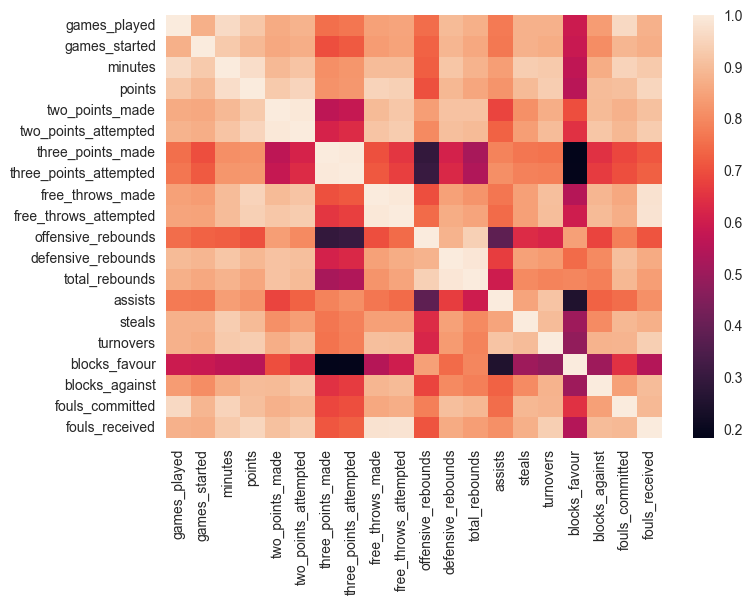

In [616]:
sns.heatmap(new_agg[num_cols].corr())

In [617]:
new_agg.drop(["total_rebounds"],axis=1,inplace=True)

In [620]:
new_agg["two_point_perc"] = (new_agg["two_points_made"] * 100) / new_agg["two_points_attempted"]

In [622]:
new_agg["free_throw_perc"] = (new_agg["free_throws_made"] * 100) / new_agg["free_throws_attempted"]
new_agg["three_point_perc"] = (new_agg["three_points_made"] * 100) / new_agg["three_points_attempted"]

In [623]:
new_agg.drop(["free_throws_made","three_points_made","two_points_made"],axis=1,inplace=True)

In [624]:
num_cols,cat_cols,cat_but_car = grab_col_names(new_agg)

Observations: 1240
Variables: 20
cat_cols: 0
cat_but_car: 1
num_cols: 19
num_but_car: 0


<Axes: >

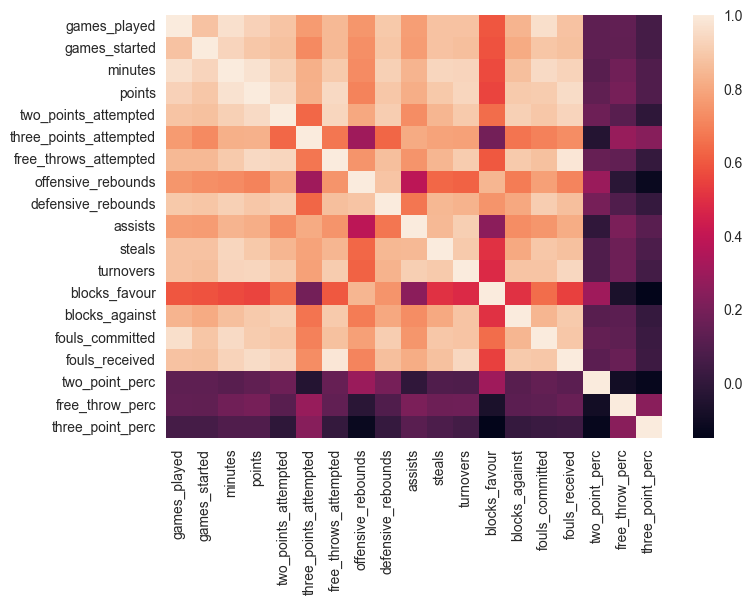

In [625]:
sns.heatmap(new_agg[num_cols].corr())

In [626]:
new_agg[num_cols].corr()

games_played  games_started   minutes    points  \
games_played                1.000000       0.874791  0.964577  0.921568   
games_started               0.874791       1.000000  0.928854  0.891348   
minutes                     0.964577       0.928854  1.000000  0.968914   
points                      0.921568       0.891348  0.968914  1.000000   
two_points_attempted        0.879542       0.871604  0.916754  0.948826   
three_points_attempted      0.764842       0.716944  0.823777  0.825937   
free_throws_attempted       0.851110       0.847234  0.900814  0.941718   
offensive_rebounds          0.750199       0.730158  0.724830  0.702147   
defensive_rebounds          0.895942       0.886661  0.917142  0.891210   
assists                     0.770851       0.769004  0.837851  0.818233   
steals                      0.878304       0.877177  0.932974  0.895624   
turnovers                   0.877985       0.868773  0.929437  0.935600   
blocks_favour               0.593224       0.584331  0.565572  0.552364   
blocks_against              0.835955       0.807826  0.867903  0.899908   
fouls_committed             0.959680       0.887224  0.947891  0.904952   
fouls_received              0.876384       0.871878  0.927720  0.954669   
two_point_perc              0.128152       0.129179  0.112524  0.131783   
free_throw_perc             0.137726       0.134717  0.177575  0.198505   
three_point_perc            0.058101       0.057058  0.088568  0.089757   

                        two_points_attempted  three_points_attempted  \
games_played                        0.879542                0.764842   
games_started                       0.871604                0.716944   
minutes                             0.916754                0.823777   
points                              0.948826                0.825937   
two_points_attempted                1.000000                0.632336   
three_points_attempted              0.632336                1.000000   
free_throws_attempted               0.932786                0.671498   
offensive_rebounds                  0.800230                0.303803   
defensive_rebounds                  0.905554                0.628614   
assists                             0.729140                0.809739   
steals                              0.838624                0.785700   
turnovers                           0.899285                0.780286   
blocks_favour                       0.647460                0.186070   
blocks_against                      0.918017                0.666112   
fouls_committed                     0.889488                0.698239   
fouls_received                      0.930030                0.727216   
two_point_perc                      0.171109               -0.040176   
free_throw_perc                     0.113646                0.284310   
three_point_perc                   -0.009858                0.242585   

                        free_throws_attempted  offensive_rebounds  \
games_played                         0.851110            0.750199   
games_started                        0.847234            0.730158   
minutes                              0.900814            0.724830   
points                               0.941718            0.702147   
two_points_attempted                 0.932786            0.800230   
three_points_attempted               0.671498            0.303803   
free_throws_attempted                1.000000            0.746161   
offensive_rebounds                   0.746161            1.000000   
defensive_rebounds                   0.867003            0.880106   
assists                              0.744224            0.382346   
steals                               0.840639            0.634623   
turnovers                            0.903442            0.620529   
blocks_favour                        0.598800            0.840364   
blocks_against                       0.896977            0.681352   
fouls_committed                      0.871029  

In [628]:
arbitrary = new_agg.drop(["points","games_played","games_started"],axis=1)

In [632]:
num_cols,cat_cols,cat_but_car =grab_col_names(arbitrary)

Observations: 1240
Variables: 17
cat_cols: 0
cat_but_car: 1
num_cols: 16
num_but_car: 0


<Axes: >

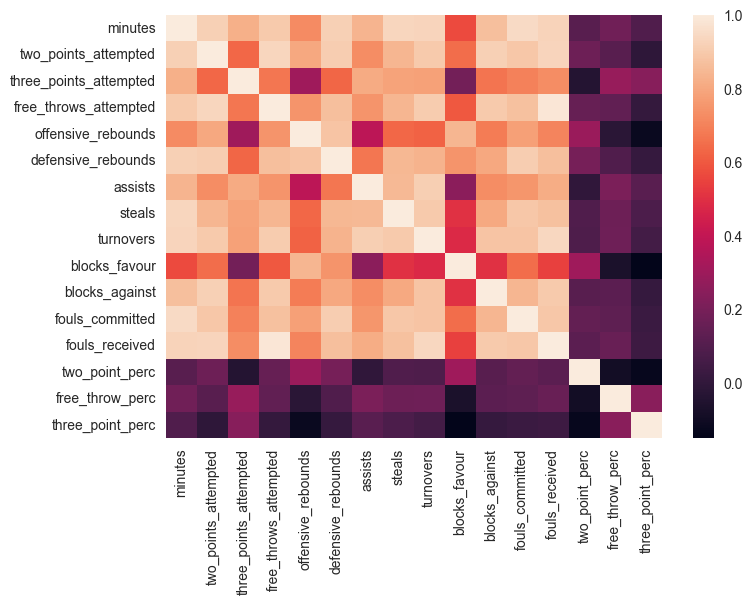

In [633]:
sns.heatmap(arbitrary[num_cols].corr())

In [634]:
arbitrary[num_cols].corr()

minutes  two_points_attempted  \
minutes                 1.000000              0.916754   
two_points_attempted    0.916754              1.000000   
three_points_attempted  0.823777              0.632336   
free_throws_attempted   0.900814              0.932786   
offensive_rebounds      0.724830              0.800230   
defensive_rebounds      0.917142              0.905554   
assists                 0.837851              0.729140   
steals                  0.932974              0.838624   
turnovers               0.929437              0.899285   
blocks_favour           0.565572              0.647460   
blocks_against          0.867903              0.918017   
fouls_committed         0.947891              0.889488   
fouls_received          0.927720              0.930030   
two_point_perc          0.112524              0.171109   
free_throw_perc         0.177575              0.113646   
three_point_perc        0.088568             -0.009858   

                        three_points_attempted  free_throws_attempted  \
minutes                               0.823777               0.900814   
two_points_attempted                  0.632336               0.932786   
three_points_attempted                1.000000               0.671498   
free_throws_attempted                 0.671498               1.000000   
offensive_rebounds                    0.303803               0.746161   
defensive_rebounds                    0.628614               0.867003   
assists                               0.809739               0.744224   
steals                                0.785700               0.840639   
turnovers                             0.780286               0.903442   
blocks_favour                         0.186070               0.598800   
blocks_against                        0.666112               0.896977   
fouls_committed                       0.698239               0.871029   
fouls_received                        0.727216               0.983040   
two_point_perc                       -0.040176               0.152671   
free_throw_perc                       0.284310               0.140400   
three_point_perc                      0.242585               0.009072   

                        offensive_rebounds  defensive_rebounds   assists  \
minutes                           0.724830            0.917142  0.837851   
two_points_attempted              0.800230            0.905554  0.729140   
three_points_attempted            0.303803            0.628614  0.809739   
free_throws_attempted             0.746161            0.867003  0.744224   
offensive_rebounds                1.000000            0.880106  0.382346   
defensive_rebounds                0.880106            1.000000  0.668370   
assists                           0.382346            0.668370  1.000000   
steals                            0.634623            0.845729  0.851292   
turnovers                         0.620529            0.832696  0.914491   
blocks_favour                     0.840364            0.745759  0.249531   
blocks_against                    0.681352            0.798938  0.729438   
fouls_committed                   0.779525            0.906410  0.749554   
fouls_received                    0.706829            0.865580  0.814054   
two_point_perc                    0.292694            0.198485 -0.007121   
free_throw_perc                  -0.024565            0.089126  0.208529   
three_point_perc                 -0.122147            0.013251  0.117145   

                          steals  turnovers  blocks_favour  blocks_against  \
minutes                 0.932974   0.929437       0.565572        0.867903   
two_points_attempted    0.838624   0.899285       0.647460        0.918017   
three_points_attempted  0.785700   0.780286       0.186070        0.666112   
free_throws_attempted   0.840639   0.903442       0.598800        0.896977   
offensive_rebounds      0.634623   0.620529       0.840364        0.681352   
defensive_rebounds      0.845729   

In [636]:
arbitrary[num_cols] = scaler.fit_transform(arbitrary[num_cols])

In [640]:
arbitrary.dropna(inplace=True)

In [697]:
from sklearn.decomposition import PCA

# Initialize PCA, you can specify the number of components here, or leave it as default to keep all components
pca = PCA()
X_pca = pca.fit_transform(arbitrary[num_cols])

# To see how much variance is explained by each component
explained_variance = pca.explained_variance_ratio_
print(explained_variance)

# Cumulative variance explained
cumulative_variance = np.cumsum(explained_variance)
print(cumulative_variance)

[6.67968201e-01 1.39629177e-01 6.24805231e-02 2.57620080e-02
 2.43194053e-02 2.34526762e-02 1.69801101e-02 1.21280062e-02
 8.00871428e-03 6.69874240e-03 4.17449104e-03 3.29776185e-03
 2.13277632e-03 1.72856804e-03 6.47888680e-04 5.90950970e-04]
[0.6679682  0.80759738 0.8700779  0.89583991 0.92015931 0.94361199
 0.9605921  0.97272011 0.98072882 0.98742756 0.99160205 0.99489982
 0.99703259 0.99876116 0.99940905 1.        ]


In [698]:
n_components = next(x for x, val in enumerate(cumulative_variance) if val > 0.85)  # for example, 85%
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_pca)

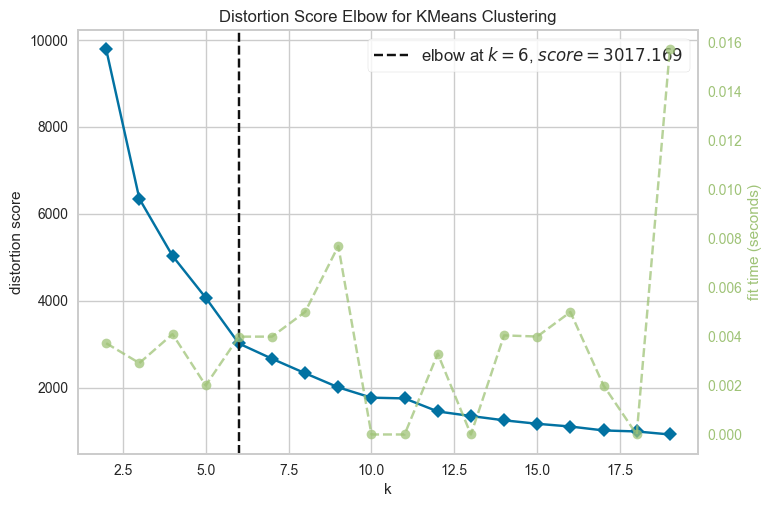

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [685]:
kmeans = KMeans()
elbow = KElbowVisualizer(kmeans, k=(2,20))
elbow.fit(X_pca)
elbow.show()

In [739]:
kmeans = KMeans(n_clusters=6).fit(X_pca)

labels = kmeans.labels_
labels

from sklearn.metrics import silhouette_score

labels = kmeans.fit_predict(X_pca)
silhouette_avg = silhouette_score(X_pca, labels)
print("The average silhouette score is:", silhouette_avg)

The average silhouette score is: 0.5084839058317546


In [748]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import adjusted_rand_score
import numpy as np

# Assuming scaled_df is your data
X_shuffled = np.random.permutation(arr)
half = int(arr.shape[0] / 2)

# Split data into two halves
X1 = X_shuffled[:half]
X2 = X_shuffled[half:]

# clustering = AgglomerativeClustering(n_clusters=6, linkage="single")

agg1_labels = kmeans.fit_predict(X1)
agg2_labels = kmeans.fit_predict(X2)

X1.shape, X2.shape


ari = adjusted_rand_score(agg1_labels, agg2_labels)
print(f"Adjusted Rand Index: {ari}")


Adjusted Rand Index: 0.015613554782323518


In [741]:

# new_row = np.array([ 5.64148035, -1.84803148])  Replace value1 and value2 with the actual values
# Append the new row to the array
# arr = np.vstack((X_pca, new_row))
# print(arr.shape)  # This should now be (1140, 2)

(1140, 2)


In [750]:
num_cols,cat_cols,cat_but_car = grab_col_names(new_agg)

Observations: 1240
Variables: 20
cat_cols: 0
cat_but_car: 1
num_cols: 19
num_but_car: 0


In [752]:
new_agg.dropna(inplace=True)

In [769]:
new_agg_scaled = scaler.fit_transform(new_agg[num_cols])

In [770]:
from sklearn.decomposition import PCA

pca = PCA()
X_pca = pca.fit_transform(new_agg_scaled)

# To see how much variance is explained by each component
explained_variance = pca.explained_variance_ratio_
print(explained_variance)

# Cumulative variance explained
cumulative_variance = np.cumsum(explained_variance)
print(cumulative_variance)

[6.87658520e-01 1.24057527e-01 5.84923604e-02 2.46708343e-02
 2.31636453e-02 2.22154097e-02 1.51470541e-02 1.21040688e-02
 7.29609996e-03 6.60255115e-03 5.39148428e-03 4.39347449e-03
 3.16078485e-03 2.08927566e-03 1.50934130e-03 9.35514070e-04
 5.16798278e-04 3.67977762e-04 2.27279026e-04]
[0.68765852 0.81171605 0.87020841 0.89487924 0.91804289 0.9402583
 0.95540535 0.96750942 0.97480552 0.98140807 0.98679955 0.99119303
 0.99435381 0.99644309 0.99795243 0.99888794 0.99940474 0.99977272
 1.        ]


In [771]:
n_components = next(x for x, val in enumerate(cumulative_variance) if val > 0.90)  # for example, 85%
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_pca)

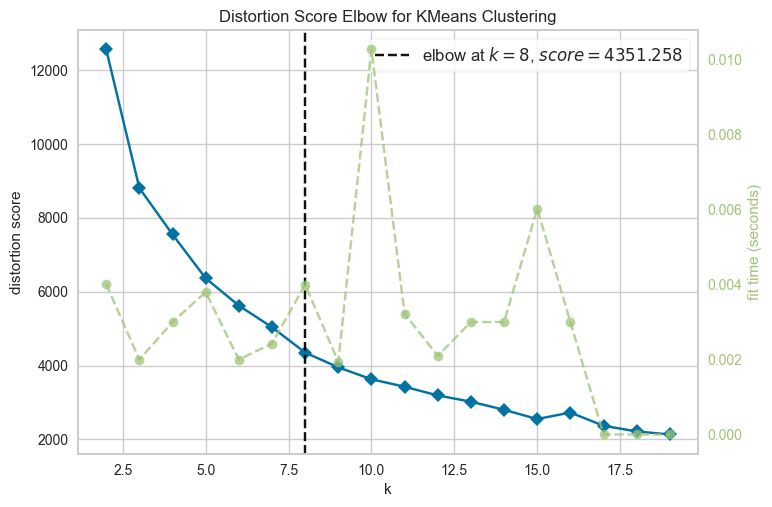

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [772]:
kmeans = KMeans()
elbow = KElbowVisualizer(kmeans, k=(2,20))
elbow.fit(X_pca)
elbow.show()

In [773]:
kmeans = KMeans(n_clusters=6).fit(X_pca)

labels = kmeans.labels_
labels

from sklearn.metrics import silhouette_score

labels = kmeans.fit_predict(X_pca)
silhouette_avg = silhouette_score(X_pca, labels)
print("The average silhouette score is:", silhouette_avg)

The average silhouette score is: 0.3453514388412307


In [783]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import adjusted_rand_score
import numpy as np

# Assuming scaled_df is your data
X_shuffled = np.random.permutation(X_pca)
half = int(X_pca.shape[0] / 2)

# Split data into two halves
X1 = X_shuffled[:half]
X2 = X_shuffled[half:]

# clustering = AgglomerativeClustering(n_clusters=6, linkage="single")

agg1_labels = kmeans.fit_predict(X1)
agg2_labels = kmeans.fit_predict(X2)

X1.shape, X2.shape


ari = adjusted_rand_score(agg1_labels, agg2_labels)
print(f"Adjusted Rand Index: {ari}")

Adjusted Rand Index: 0.012614580182740868


In [779]:

new_row = np.array([ 6.01895817, -1.78282288, -0.99340966, -0.03323892])  #Replace value1 and value2 with the actual values
# Append the new row to the array
X_pca = np.vstack((X_pca, new_row))
print(arr.shape)  # This should now be (1140, 2)

(1140, 2)


In [778]:
X_pca[0]

array([ 6.01895817, -1.78282288, -0.99340966, -0.03323892])

In [786]:
num_cols,cat_cols,cat_but_car = grab_col_names(new_agg)

Observations: 1139
Variables: 20
cat_cols: 0
cat_but_car: 1
num_cols: 19
num_but_car: 0


In [793]:
for col in num_cols:
    if check_outliers(new_agg,col):
        index = grab_outliers(new_agg,col,True)
        print(len(index))

74
95
77
82
87
96
77
100
83
109
83
79
119
88
72
90
29
28
121


In [794]:
for col in num_cols:
    if check_outliers(new_agg,col):
        replace_with_trehold(new_agg,col)

In [795]:
for col in num_cols:
    if check_outliers(new_agg,col):
        index = grab_outliers(new_agg,col,True)
        print(len(index))

In [796]:
new_agg

games_played  games_started  minutes  points  two_points_attempted  \
6            157.0           94.5   3438.1  1332.0                 702.0   
7             87.0           57.0   2424.3  1199.0                 540.0   
9             29.0            0.0    274.7    52.0                  23.0   
11           180.0           55.0   3594.5  1421.0                 487.0   
19            30.0            8.0    277.3    54.0                  20.0   
...            ...            ...      ...     ...                   ...   
1925          47.0           39.0   1324.2   610.0                 314.0   
1930          15.0           11.0    369.0   129.0                  71.0   
1931          55.0           44.0   1371.4   468.0                 245.0   
1932          55.0            1.0    336.7    66.0                  43.0   
1933          12.0            0.0    141.7    16.0                  19.0   

      three_points_attempted  free_throws_attempted  offensive_rebounds  \
6                     419.00                  268.0                92.0   
7                     351.00                  324.0                55.0   
9                      35.00                   16.0                 8.0   
11                    441.25                  265.0                32.0   
19                     28.00                   10.0                 5.0   
...                      ...                    ...                 ...   
1925                  148.00                  202.0                41.0   
1930                   35.00                   25.0                17.0   
1931                  107.00                  116.0                36.0   
1932                    9.00                   27.0                21.0   
1933                    6.00                    4.0                 0.0   

      defensive_rebounds  assists  steals  turnovers  blocks_favour  \
6                  308.0   271.25   125.0      228.5           12.0   
7                  160.0   107.00    59.0      137.0           28.0   
9                   25.0    15.00     6.0        5.0            1.0   
11                 258.0   271.25   108.0      175.0            5.0   
19                  16.0    18.00     6.0       17.0            0.0   
...                  ...      ...     ...        ...            ...   
1925               127.0    86.00    64.0      120.0           13.0   
1930                21.0    42.00    15.0       35.0            4.0   
1931               182.0    72.00    39.0       63.0           10.0   
1932                30.0     9.00    10.0       16.0            3.0   
1933                 8.0    13.00     4.0       15.0            0.0   

      blocks_against  fouls_committed  fouls_received player_id  \
6               46.5            313.0           319.0   P000007   
7               41.0            160.0           330.0   P000009   
9                0.0             24.0            11.0   P000035   
11              24.0            324.0           278.0   P000046   
19               1.0             26.0            17.0   P000092   
...              ...              ...             ...       ...   
1925            27.0            144.0           222.0      PTGV   
1930             2.0             44.0            36.0      PTHB   
1931            10.0            121.0           105.0      PTHC   
1932             5.0             62.0            26.0      PTHY   
1933             1.0             11.0             7.0      PXBB   

      two_point_perc  free_throw_perc  three_point_perc  
6          51.139601        80.223881         31.742243  
7          52.407407        78.703704         35.897436  
9          34.782609        75.000000         22.857143  
11         52.977413        89.056604         40.992647  
19         65.000000        70.000000         25.000000  
...              ...              ...               ...  
1925       44.585987        83.168317         36.486486  
1930       59.154930        72.000000         25.714286  
1931       5

In [797]:
new_agg_scaled = minmax.fit_transform(new_agg[num_cols])

In [798]:
from sklearn.decomposition import PCA

pca = PCA()
X_pca = pca.fit_transform(new_agg_scaled)

# To see how much variance is explained by each component
explained_variance = pca.explained_variance_ratio_
print(explained_variance)

# Cumulative variance explained
cumulative_variance = np.cumsum(explained_variance)
print(cumulative_variance)

[7.57361890e-01 9.11009646e-02 3.15223726e-02 2.37694761e-02
 1.85938655e-02 1.69711131e-02 1.14594886e-02 1.08168859e-02
 8.71949090e-03 6.98571464e-03 5.82242943e-03 4.99422102e-03
 3.88686322e-03 2.56564656e-03 2.21716646e-03 1.40665100e-03
 7.46080243e-04 6.55881248e-04 4.03799004e-04]
[0.75736189 0.84846285 0.87998523 0.9037547  0.92234857 0.93931968
 0.95077917 0.96159606 0.97031555 0.97730126 0.98312369 0.98811791
 0.99200478 0.99457042 0.99678759 0.99819424 0.99894032 0.9995962
 1.        ]


In [799]:
n_components = next(x for x, val in enumerate(cumulative_variance) if val > 0.85)  # for example, 85%
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_pca)

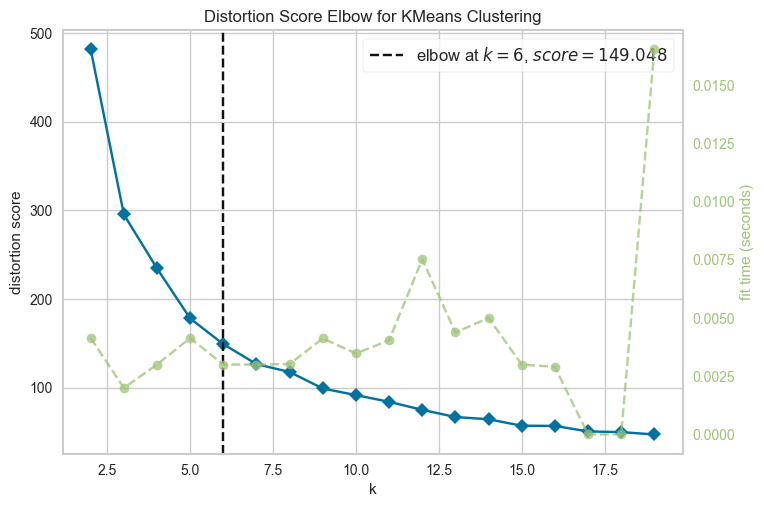

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [800]:
kmeans = KMeans()
elbow = KElbowVisualizer(kmeans, k=(2,20))
elbow.fit(X_pca)
elbow.show()

In [814]:
kmeans = KMeans(n_clusters=6).fit(X_pca)

labels = kmeans.labels_
labels

from sklearn.metrics import silhouette_score

labels = kmeans.fit_predict(X_pca)
silhouette_avg = silhouette_score(X_pca, labels)
print("The average silhouette score is:", silhouette_avg)

The average silhouette score is: 0.44487306970338786


In [826]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import adjusted_rand_score
import numpy as np

# Assuming scaled_df is your data
X_shuffled = np.random.permutation(X_pca)
half = int(X_pca.shape[0] / 2)

# Split data into two halves
X1 = X_shuffled[:half]
X2 = X_shuffled[half:]

# clustering = AgglomerativeClustering(n_clusters=6, linkage="single")

agg1_labels = kmeans.fit_predict(X1)
agg2_labels = kmeans.fit_predict(X2)


X1.shape, X2.shape


ari = adjusted_rand_score(agg1_labels, agg2_labels)
print(f"Adjusted Rand Index: {ari}")

Adjusted Rand Index: 0.019722489945147626


In [827]:
num_cols,cat_cols,cat_but_car = grab_col_names(agg_df)

Observations: 1738
Variables: 42
cat_cols: 1
cat_but_car: 1
num_cols: 40
num_but_car: 1


In [828]:
num_cols

['games_played',
 'games_started',
 'minutes',
 'points',
 'two_points_made',
 'two_points_attempted',
 'three_points_made',
 'three_points_attempted',
 'free_throws_made',
 'free_throws_attempted',
 'offensive_rebounds',
 'defensive_rebounds',
 'total_rebounds',
 'assists',
 'steals',
 'turnovers',
 'blocks_favour',
 'blocks_against',
 'fouls_committed',
 'fouls_received',
 'valuation',
 'minutes_per_game',
 'points_per_game',
 'two_points_made_per_game',
 'two_points_attempted_per_game',
 'three_points_made_per_game',
 'three_points_attempted_per_game',
 'free_throws_made_per_game',
 'free_throws_attempted_per_game',
 'offensive_rebounds_per_game',
 'defensive_rebounds_per_game',
 'total_rebounds_per_game',
 'assists_per_game',
 'steals_per_game',
 'turnovers_per_game',
 'blocks_favour_per_game',
 'blocks_against_per_game',
 'fouls_committed_per_game',
 'fouls_received_per_game',
 'valuation_per_game']

In [830]:
per_game = [col for col in num_cols if "_per_game" in col]

In [832]:
per_game = per_game + ["minutes"]

In [833]:
per_game

['minutes_per_game',
 'points_per_game',
 'two_points_made_per_game',
 'two_points_attempted_per_game',
 'three_points_made_per_game',
 'three_points_attempted_per_game',
 'free_throws_made_per_game',
 'free_throws_attempted_per_game',
 'offensive_rebounds_per_game',
 'defensive_rebounds_per_game',
 'total_rebounds_per_game',
 'assists_per_game',
 'steals_per_game',
 'turnovers_per_game',
 'blocks_favour_per_game',
 'blocks_against_per_game',
 'fouls_committed_per_game',
 'fouls_received_per_game',
 'valuation_per_game',
 'minutes']

In [834]:
per_game.remove("valuation_per_game")

In [835]:
new_df = agg_df[per_game]

In [836]:
new_df

minutes_per_game  points_per_game  two_points_made_per_game  \
0            16.800000         2.000000                  1.000000   
1            14.100000         2.000000                  1.000000   
2            13.400000         8.000000                  3.000000   
3            30.800000         9.000000                  4.000000   
5            11.066667         5.000000                  1.833333   
...                ...              ...                       ...   
1929         11.820000         3.000000                  0.400000   
1930         24.600000         8.600000                  2.800000   
1931         24.934545         8.509091                  2.454545   
1932          6.121818         1.200000                  0.436364   
1933         11.808333         1.333333                  0.500000   

      two_points_attempted_per_game  three_points_made_per_game  \
0                          2.000000                    0.000000   
1                          4.000000                    0.000000   
2                          3.000000                    0.000000   
3                          4.000000                    0.000000   
5                          2.500000                    0.000000   
...                             ...                         ...   
1929                       1.300000                    0.700000   
1930                       4.733333                    0.600000   
1931                       4.454545                    0.636364   
1932                       0.781818                    0.018182   
1933                       1.583333                    0.000000   

      three_points_attempted_per_game  free_throws_made_per_game  \
0                            0.000000                   0.000000   
1                            1.000000                   0.000000   
2                            3.000000                   2.000000   
3                            2.000000                   1.000000   
5                            0.000000                   1.333333   
...                               ...                        ...   
1929                         1.300000                   0.100000   
1930                         2.333333                   1.200000   
1931                         1.945455                   1.690909   
1932                         0.163636                   0.272727   
1933                         0.500000                   0.333333   

      free_throws_attempted_per_game  offensive_rebounds_per_game  \
0                           0.000000                     0.000000   
1                           0.000000                     0.000000   
2                           2.000000                     1.000000   
3                           1.000000                     0.000000   
5                           1.500000                     1.500000   
...                              ...                          ...   
1929                        0.200000                     0.100000   
1930                        1.666667                     1.133333   
1931                        2.109091                     0.654545   
1932                        0.490909                     0.381818   
1933                        0.333333                     0.000000   

      defensive_rebounds_per_game  total_rebounds_per_game  assists_per_game  \
0                        1.000000                 1.000000          0.000000   
1                        2.000000                 2.000000          3.000000   
2                        2.000000                 3.000000          1.000000   
3                        1.000000                 1.000000          7.000000   
5                        2.166667                 3.666667          0.000000   
...                           ...                      ...               ...   
1929                     0.700000                 0.800000          0.200000   
1930                     1.400000                 2.533333          2.800000   
1931  

<Axes: >

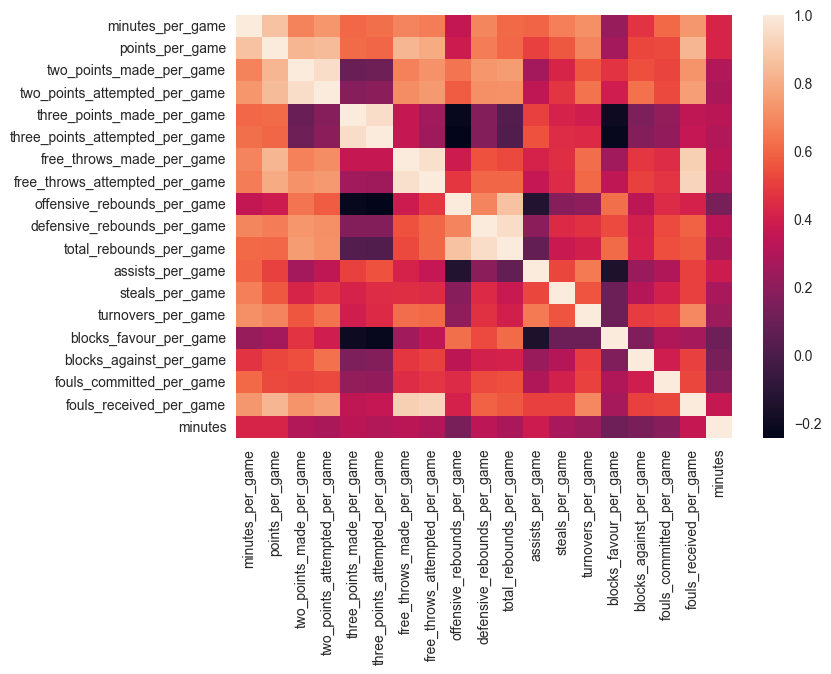

In [840]:
sns.heatmap(new_df.corr())

In [841]:
new_df = scaler.fit_transform(new_df)

In [936]:
pca = PCA()
X_pca = pca.fit_transform(new_df)

# To see how much variance is explained by each component
explained_variance = pca.explained_variance_ratio_
print(explained_variance)

# Cumulative variance explained
cumulative_variance = np.cumsum(explained_variance)
print(cumulative_variance)

[4.64812382e-01 1.69832844e-01 1.05093363e-01 5.01126835e-02
 4.11361643e-02 3.61418823e-02 2.99579115e-02 2.74301244e-02
 2.33420753e-02 1.71275993e-02 1.22206995e-02 1.05471339e-02
 4.27244021e-03 3.81813296e-03 1.64312933e-03 1.37075603e-03
 1.14067879e-03 1.65417540e-32 4.89000390e-33]
[0.46481238 0.63464523 0.73973859 0.78985127 0.83098744 0.86712932
 0.89708723 0.92451735 0.94785943 0.96498703 0.97720773 0.98775486
 0.9920273  0.99584544 0.99748857 0.99885932 1.         1.
 1.        ]


In [937]:
n_components = next(x for x, val in enumerate(cumulative_variance) if val > 0.85)  # for example, 85%
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_pca)

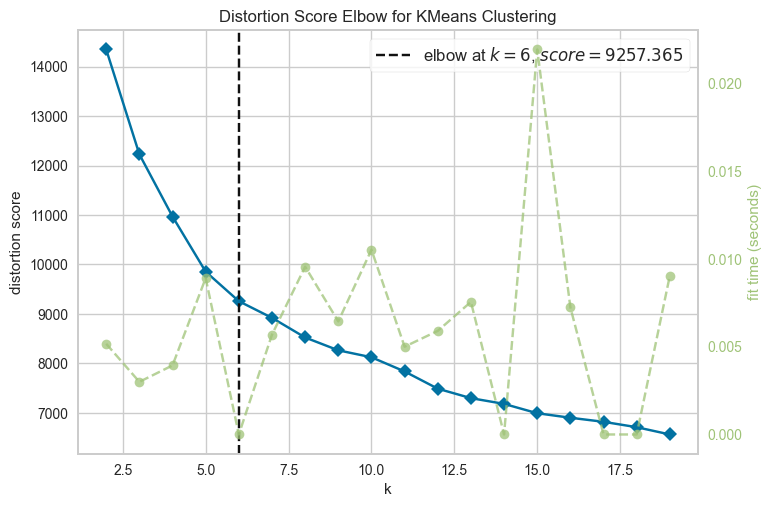

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [944]:
kmeans = KMeans()
elbow = KElbowVisualizer(kmeans, k=(2,20))
elbow.fit(new_df)
elbow.show()

In [948]:
kmeans = KMeans(n_clusters=6).fit(new_df)

labels = kmeans.labels_
labels

from sklearn.metrics import silhouette_score

labels = kmeans.fit_predict(new_df)
silhouette_avg = silhouette_score(new_df, labels)
print("The average silhouette score is:", silhouette_avg)

The average silhouette score is: 0.20636785493555054


In [933]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import adjusted_rand_score
import numpy as np

# Assuming scaled_df is your data
X_shuffled = np.random.permutation(X_pca)
half = int(X_pca.shape[0] / 2)

# Split data into two halves
X1 = X_shuffled[:half]
X2 = X_shuffled[half:]

# clustering = AgglomerativeClustering(n_clusters=13, linkage="single")

agg1_labels = kmeans.fit_predict(X1)
agg2_labels = kmeans.fit_predict(X2)


X1.shape, X2.shape


ari = adjusted_rand_score(agg1_labels, agg2_labels)
print(f"Adjusted Rand Index: {ari}")

Adjusted Rand Index: 0.0015173336063518178


In [949]:
df.head()

season_player_id season_code player_id           player team_id  \
0  E2017_P003733_PAM       E2017   P003733  ABALDE, ALBERTO     PAM   
1  E2019_P003733_PAM       E2019   P003733  ABALDE, ALBERTO     PAM   
2  E2020_P003733_MAD       E2020   P003733  ABALDE, ALBERTO     MAD   
3  E2021_P003733_MAD       E2021   P003733  ABALDE, ALBERTO     MAD   
4  E2022_P003733_MAD       E2022   P003733  ABALDE, ALBERTO     MAD   

   games_played  games_started  minutes  points  two_points_made  \
0          25.0            9.0    478.5     190               43   
1          23.0            4.0    499.3     179               49   
2          39.0           23.0    761.2     281               47   
3          30.0           19.0    563.4     179               40   
4          25.0           10.0    345.0      63               10   

   two_points_attempted  three_points_made  three_points_attempted  \
0                    89                 28                      54   
1                    97                 15                      53   
2                   100                 50                     115   
3                    90                 25                      74   
4                    27                  9                      36   

   free_throws_made  free_throws_attempted  offensive_rebounds  \
0                20                     23                  12   
1                36                     49                  32   
2                37                     44                  11   
3                24                     32                  20   
4                16                     24                  10   

   defensive_rebounds  total_rebounds  assists  steals  turnovers  \
0                  40              52       42       8         32   
1                  60              92       38      11         19   
2                  93             104       91      21         38   
3                  69              89       44      14         33   
4                  40              50       38       7         14   

   blocks_favour  blocks_against  fouls_committed  fouls_received  valuation  \
0              0               5               44              36        172   
1              0               8               29              40        205   
2              0               6               60              57        325   
3              0               2               56              35        163   
4              0               2               41              20         69   

   minutes_per_game  points_per_game  two_points_made_per_game  \
0             19.14             7.60                      1.72   
1             21.71             7.78                      2.13   
2             19.52             7.21                      1.21   
3             18.78             5.97                      1.33   
4             13.80             2.52                      0.40   

   two_points_attempted_per_game  two_points_percentage  \
0                           3.56                  0.483   
1                           4.22                  0.505   
2                           2.56                  0.470   
3                           3.00                  0.444   
4                           1.08                  0.370   

   three_points_made_per_game  three_points_attempted_per_game  \
0                        1.12                             2.16   
1                        0.65                             2.30   
2                        1.28                             2.95   
3                        0.83                             2.47   
4                        0.36                             1.44   

   three_points_percentage  free_throws_made_per_game  \
0                    0.519                       0.80   
1                    0.283                       1.57   
2                    0.435                       0.95   
3                    0.338                       0.80   
4                   

In [1345]:
# def dimension_reduce(data_frame, pca, cumulative_variance_treshold = 0.89, print_cum_var=False):
#     X_pca = pca.fit_transform(data_frame)
#     explained_variance = pca.explained_variance_ratio_
#     cumulative_variance = np.cumsum(explained_variance)
    
#     n_components = next(x for x, val in enumerate(cumulative_variance) if val > cumulative_variance_treshold)  # for example, 85%
#     pca = PCA(n_components=n_components)
#     X_pca = pca.fit_transform(X_pca)
    
#     if print_cum_var:
#         print(explained_variance)
#         # Cumulative variance explained
#         print(cumulative_variance)

#     return X_pca, n_components

def dimension_reduce(data_frame, cumulative_variance_threshold=0.89):
    pca = PCA()
    X_pca = pca.fit_transform(data_frame)
    explained_variance = pca.explained_variance_ratio_
    cumulative_variance = np.cumsum(explained_variance)

    # Ensure at least one component is selected
    n_components = next((x + 1 for x, val in enumerate(cumulative_variance) if val >= cumulative_variance_threshold), 1)
    if n_components < 1:
        n_components = 1

    # Apply PCA again with the correct number of components
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(data_frame)

    return X_pca, n_components


In [1017]:
def elbow_kmeans(data_frame, kmeans, elbow_range=(2,20), elbow_show=False):
    elbow = KElbowVisualizer(kmeans, k=elbow_range)
    elbow.fit(data_frame)
    
    kmeans = KMeans(n_clusters=elbow.elbow_value_).fit(data_frame)
    labels = kmeans.labels_
    labels = kmeans.fit_predict(data_frame)
    silhouette_avg = silhouette_score(data_frame, labels)
    print("The average silhouette score is:", silhouette_avg)

    if elbow_show:
        elbow.show()

    return labels

In [956]:
new_agg

games_played  games_started  minutes  points  two_points_attempted  \
6            157.0           94.5   3438.1  1332.0                 702.0   
7             87.0           57.0   2424.3  1199.0                 540.0   
9             29.0            0.0    274.7    52.0                  23.0   
11           180.0           55.0   3594.5  1421.0                 487.0   
19            30.0            8.0    277.3    54.0                  20.0   
...            ...            ...      ...     ...                   ...   
1925          47.0           39.0   1324.2   610.0                 314.0   
1930          15.0           11.0    369.0   129.0                  71.0   
1931          55.0           44.0   1371.4   468.0                 245.0   
1932          55.0            1.0    336.7    66.0                  43.0   
1933          12.0            0.0    141.7    16.0                  19.0   

      three_points_attempted  free_throws_attempted  offensive_rebounds  \
6                     419.00                  268.0                92.0   
7                     351.00                  324.0                55.0   
9                      35.00                   16.0                 8.0   
11                    441.25                  265.0                32.0   
19                     28.00                   10.0                 5.0   
...                      ...                    ...                 ...   
1925                  148.00                  202.0                41.0   
1930                   35.00                   25.0                17.0   
1931                  107.00                  116.0                36.0   
1932                    9.00                   27.0                21.0   
1933                    6.00                    4.0                 0.0   

      defensive_rebounds  assists  steals  turnovers  blocks_favour  \
6                  308.0   271.25   125.0      228.5           12.0   
7                  160.0   107.00    59.0      137.0           28.0   
9                   25.0    15.00     6.0        5.0            1.0   
11                 258.0   271.25   108.0      175.0            5.0   
19                  16.0    18.00     6.0       17.0            0.0   
...                  ...      ...     ...        ...            ...   
1925               127.0    86.00    64.0      120.0           13.0   
1930                21.0    42.00    15.0       35.0            4.0   
1931               182.0    72.00    39.0       63.0           10.0   
1932                30.0     9.00    10.0       16.0            3.0   
1933                 8.0    13.00     4.0       15.0            0.0   

      blocks_against  fouls_committed  fouls_received player_id  \
6               46.5            313.0           319.0   P000007   
7               41.0            160.0           330.0   P000009   
9                0.0             24.0            11.0   P000035   
11              24.0            324.0           278.0   P000046   
19               1.0             26.0            17.0   P000092   
...              ...              ...             ...       ...   
1925            27.0            144.0           222.0      PTGV   
1930             2.0             44.0            36.0      PTHB   
1931            10.0            121.0           105.0      PTHC   
1932             5.0             62.0            26.0      PTHY   
1933             1.0             11.0             7.0      PXBB   

      two_point_perc  free_throw_perc  three_point_perc  
6          51.139601        80.223881         31.742243  
7          52.407407        78.703704         35.897436  
9          34.782609        75.000000         22.857143  
11         52.977413        89.056604         40.992647  
19         65.000000        70.000000         25.000000  
...              ...              ...               ...  
1925       44.585987        83.168317         36.486486  
1930       59.154930        72.000000         25.714286  
1931       5

In [958]:
df.shape

(5346, 48)

In [959]:
num_cols,cat_cols,cat_but_car = grab_col_names(df)

Observations: 5346
Variables: 48
cat_cols: 1
cat_but_car: 4
num_cols: 43
num_but_car: 0


In [960]:
agg_df = df[num_cols]

In [972]:
agg_df["player_id"] = df["player_id"]

In [962]:
agg_df = agg_df.groupby("player_id")[num_cols].sum().reset_index()

In [964]:
agg_df.describe().T

count        mean          std   min  \
games_played                     2103.0   39.949596    57.609601   0.0   
games_started                    2103.0   18.906324    34.534808   0.0   
minutes                          2103.0  761.355873  1242.949176   0.0   
points                           2103.0  294.340466   520.944853   0.0   
two_points_made                  2103.0   75.066572   138.424605   0.0   
two_points_attempted             2103.0  143.389919   254.459047   0.0   
three_points_made                2103.0   30.625773    65.152951   0.0   
three_points_attempted           2103.0   84.660485   174.427471   0.0   
free_throws_made                 2103.0   52.330005   101.148695   0.0   
free_throws_attempted            2103.0   69.166429   130.112916   0.0   
offensive_rebounds               2103.0   32.537328    64.055729   0.0   
defensive_rebounds               2103.0   81.679505   144.015817   0.0   
total_rebounds                   2103.0  114.216833   202.965096   0.0   
assists                          2103.0   60.665240   142.920487   0.0   
steals                           2103.0   24.887779    43.028366   0.0   
turnovers                        2103.0   46.650499    82.575537   0.0   
blocks_favour                    2103.0    9.793153    25.016617   0.0   
blocks_against                   2103.0    9.784118    17.467463   0.0   
fouls_committed                  2103.0   78.394199   120.444902   0.0   
fouls_received                   2103.0   77.728483   145.071681   0.0   
valuation                        2103.0  307.608654   581.255830 -16.0   
minutes_per_game                 2103.0   40.747913    51.535001   0.0   
points_per_game                  2103.0         inf          NaN   0.0   
two_points_made_per_game         2103.0         inf          NaN   0.0   
two_points_attempted_per_game    2103.0         inf          NaN   0.0   
two_points_percentage            2103.0    1.141649     1.289590   0.0   
three_points_made_per_game       2103.0    1.534936     2.704065   0.0   
three_points_attempted_per_game  2103.0    4.384579     7.320530   0.0   
three_points_percentage          2103.0    0.637773     0.858395   0.0   
free_throws_made_per_game        2103.0    2.722653     4.263411   0.0   
free_throws_attempted_per_game   2103.0    3.658069     5.551037   0.0   
free_throws_percentage           2103.0    1.572156     1.883138   0.0   
offensive_rebounds_per_game      2103.0    1.743980     2.734928   0.0   
defensive_rebounds_per_game      2103.0    4.305839     6.022262   0.0   
total_rebounds_per_game          2103.0    6.049691     8.515469   0.0   
assists_per_game                 2103.0    3.059715     5.788776   0.0   
steals_per_game                  2103.0    1.330043     1.850996   0.0   
turnovers_per_game               2103.0    2.586629     3.521505   0.0   
blocks_favour_per_game           2103.0    0.517214     1.088348   0.0   
blocks_against_per_game          2103.0    0.546572     0.784181   0.0   
fouls_committed_per_game         2103.0    4.360723     5.113402   0.0   
fouls_received_per_game          2103.0    4.088545     6.117543   0.0   
valuation_per_game               2103.0         inf          NaN  -7.0   

                                     25%      50%       75%       max  
games_played                      4.5000   17.000   50.5000   391.000  
games_started                     0.0000    5.000   21.0000   277.000  
minutes                          37.8000  245.700  878.3000  8709.600  
points                            9.0000   80.000  324.0000  4225.000  
two_points_made                   2.0000   19.000   78.0000  1303.000  
two_points_attempted              5.0000   40.000  156.0000  2185.000  
three_points_made                 0.0000    4.000   28.0000   580.000  
three_points_attempted            1.0000   15.000   80.5000  1736.000  
free_throws_made                  1.0000   12.000   56.0000  1039.000  
free_throws_attempted             2.0000   18.000   76.00

In [965]:
agg_df = agg_df.loc[agg_df["games_played"] > 10]

In [966]:
agg_df.describe().T


count         mean          std    min  \
games_played                     1240.0    64.963710    64.000702  11.00   
games_started                    1240.0    31.324194    40.542723   0.00   
minutes                          1240.0  1255.058065  1422.387107  24.30   
points                           1240.0   487.499194   607.385055   4.00   
two_points_made                  1240.0   124.063710   163.104536   0.00   
two_points_attempted             1240.0   236.432258   297.582392   0.00   
three_points_made                1240.0    50.913710    78.687292   0.00   
three_points_attempted           1240.0   140.211290   209.851323   0.00   
free_throws_made                 1240.0    86.630645   120.281077   0.00   
free_throws_attempted            1240.0   114.319355   153.982152   0.00   
offensive_rebounds               1240.0    53.515323    76.638264   0.00   
defensive_rebounds               1240.0   134.814516   168.080997   1.00   
total_rebounds                   1240.0   188.329839   237.450271   3.00   
assists                          1240.0   100.856452   175.196747   0.00   
steals                           1240.0    41.072581    49.965246   0.00   
turnovers                        1240.0    76.625806    96.734330   0.00   
blocks_favour                    1240.0    16.187903    30.987321   0.00   
blocks_against                   1240.0    16.037097    20.512566   0.00   
fouls_committed                  1240.0   128.536290   135.763528   1.00   
fouls_received                   1240.0   128.608065   171.323881   0.00   
valuation                        1240.0   512.000000   686.148678 -13.00   
minutes_per_game                 1240.0    62.932218    57.022155   2.75   
points_per_game                  1240.0    23.842097    24.286259   0.36   
two_points_made_per_game         1240.0     6.126226     6.678138   0.00   
two_points_attempted_per_game    1240.0    11.872331    12.341164   0.00   
two_points_percentage            1240.0     1.724791     1.385327   0.00   
three_points_made_per_game       1240.0     2.438540     3.207760   0.00   
three_points_attempted_per_game  1240.0     6.871621     8.654363   0.00   
three_points_percentage          1240.0     0.979279     0.960725   0.00   
free_throws_made_per_game        1240.0     4.274137     4.954018   0.00   
free_throws_attempted_per_game   1240.0     5.707806     6.415691   0.00   
free_throws_percentage           1240.0     2.424444     2.031315   0.00   
offensive_rebounds_per_game      1240.0     2.689774     3.196911   0.00   
defensive_rebounds_per_game      1240.0     6.686153     6.842450   0.05   
total_rebounds_per_game          1240.0     9.375750     9.702832   0.16   
assists_per_game                 1240.0     4.844218     6.971826   0.00   
steals_per_game                  1240.0     2.067887     2.088589   0.00   
turnovers_per_game               1240.0     3.947371     4.016034   0.00   
blocks_favour_per_game           1240.0     0.803758     1.322578   0.00   
blocks_against_per_game          1240.0     0.828613     0.896228   0.00   
fouls_committed_per_game         1240.0     6.627524     5.563917   0.27   
fouls_received_per_game          1240.0     6.402976     7.044976   0.00   
valuation_per_game               1240.0    24.320710    26.982574  -1.58   

                                      25%      50%         75%       max  
games_played                      21.0000   38.500    87.00000   391.000  
games_started                      6.0000   17.000    40.00000   277.000  
minutes                          321.7250  687.200  1686.02500  8709.600  
points                           108.0000  245.000   635.00000  4225.000  
two_points_made                   24.0000   60.500   159.00000  1303.000  
two_points_attempted              51.0000  120.000   310.75000  2185.000  
three_points_made                  4.0000   20.000    62.00000   580.000  
three_points_attempted            17.0000   60.000   171.25000  1736.000  
free_throws_ma

In [967]:
agg_df = agg_df.loc[agg_df["minutes"] > 10]

In [968]:
agg_df.describe().T

count         mean          std    min  \
games_played                     1240.0    64.963710    64.000702  11.00   
games_started                    1240.0    31.324194    40.542723   0.00   
minutes                          1240.0  1255.058065  1422.387107  24.30   
points                           1240.0   487.499194   607.385055   4.00   
two_points_made                  1240.0   124.063710   163.104536   0.00   
two_points_attempted             1240.0   236.432258   297.582392   0.00   
three_points_made                1240.0    50.913710    78.687292   0.00   
three_points_attempted           1240.0   140.211290   209.851323   0.00   
free_throws_made                 1240.0    86.630645   120.281077   0.00   
free_throws_attempted            1240.0   114.319355   153.982152   0.00   
offensive_rebounds               1240.0    53.515323    76.638264   0.00   
defensive_rebounds               1240.0   134.814516   168.080997   1.00   
total_rebounds                   1240.0   188.329839   237.450271   3.00   
assists                          1240.0   100.856452   175.196747   0.00   
steals                           1240.0    41.072581    49.965246   0.00   
turnovers                        1240.0    76.625806    96.734330   0.00   
blocks_favour                    1240.0    16.187903    30.987321   0.00   
blocks_against                   1240.0    16.037097    20.512566   0.00   
fouls_committed                  1240.0   128.536290   135.763528   1.00   
fouls_received                   1240.0   128.608065   171.323881   0.00   
valuation                        1240.0   512.000000   686.148678 -13.00   
minutes_per_game                 1240.0    62.932218    57.022155   2.75   
points_per_game                  1240.0    23.842097    24.286259   0.36   
two_points_made_per_game         1240.0     6.126226     6.678138   0.00   
two_points_attempted_per_game    1240.0    11.872331    12.341164   0.00   
two_points_percentage            1240.0     1.724791     1.385327   0.00   
three_points_made_per_game       1240.0     2.438540     3.207760   0.00   
three_points_attempted_per_game  1240.0     6.871621     8.654363   0.00   
three_points_percentage          1240.0     0.979279     0.960725   0.00   
free_throws_made_per_game        1240.0     4.274137     4.954018   0.00   
free_throws_attempted_per_game   1240.0     5.707806     6.415691   0.00   
free_throws_percentage           1240.0     2.424444     2.031315   0.00   
offensive_rebounds_per_game      1240.0     2.689774     3.196911   0.00   
defensive_rebounds_per_game      1240.0     6.686153     6.842450   0.05   
total_rebounds_per_game          1240.0     9.375750     9.702832   0.16   
assists_per_game                 1240.0     4.844218     6.971826   0.00   
steals_per_game                  1240.0     2.067887     2.088589   0.00   
turnovers_per_game               1240.0     3.947371     4.016034   0.00   
blocks_favour_per_game           1240.0     0.803758     1.322578   0.00   
blocks_against_per_game          1240.0     0.828613     0.896228   0.00   
fouls_committed_per_game         1240.0     6.627524     5.563917   0.27   
fouls_received_per_game          1240.0     6.402976     7.044976   0.00   
valuation_per_game               1240.0    24.320710    26.982574  -1.58   

                                      25%      50%         75%       max  
games_played                      21.0000   38.500    87.00000   391.000  
games_started                      6.0000   17.000    40.00000   277.000  
minutes                          321.7250  687.200  1686.02500  8709.600  
points                           108.0000  245.000   635.00000  4225.000  
two_points_made                   24.0000   60.500   159.00000  1303.000  
two_points_attempted              51.0000  120.000   310.75000  2185.000  
three_points_made                  4.0000   20.000    62.00000   580.000  
three_points_attempted            17.0000   60.000   171.25000  1736.000  
free_throws_ma

In [1004]:
X = agg_df.drop(["player_id"],axis=1)

In [1005]:
X_scaled = scaler.fit_transform(X)

In [1022]:
X_pca = dimension_reduce(X_scaled, pca,cumulative_variance_treshold=0.92, print_cum_var=True,)

[7.20460104e-01 1.45559204e-01 3.22125126e-02 2.47093224e-02
 1.79179037e-02 1.56969579e-02 8.57838627e-03 6.32245230e-03
 5.81553307e-03 4.50356458e-03 3.35916238e-03 2.94034232e-03
 2.62314221e-03 1.89035324e-03 1.31476571e-03 1.13897228e-03
 7.34695715e-04 6.45945057e-04 5.38140109e-04 4.83766233e-04
 3.98775982e-04 3.75948743e-04 3.63419129e-04 3.26350260e-04
 1.97529565e-04 1.77947498e-04 1.68499457e-04 1.25785782e-04
 1.00790338e-04 9.30386476e-05 7.63344683e-05 6.65575365e-05
 2.63826133e-05 2.52728279e-05 1.44866548e-05 9.65097418e-06
 7.98658440e-06 9.05297597e-09 6.65873283e-09 1.51999387e-09
 1.87729026e-32 6.12938574e-33 6.12938574e-33]
[0.7204601  0.86601931 0.89823182 0.92294114 0.94085905 0.956556
 0.96513439 0.97145684 0.97727238 0.98177594 0.9851351  0.98807545
 0.99069859 0.99258894 0.99390371 0.99504268 0.99577737 0.99642332
 0.99696146 0.99744523 0.997844   0.99821995 0.99858337 0.99890972
 0.99910725 0.9992852  0.9994537  0.99957948 0.99968027 0.99977331
 0.9998496

In [1023]:
X_pca[0]

array([11.61641707, -2.9838395 ,  1.61286949])

# used whole data with pca

The average silhouette score is: 0.4865543215167368


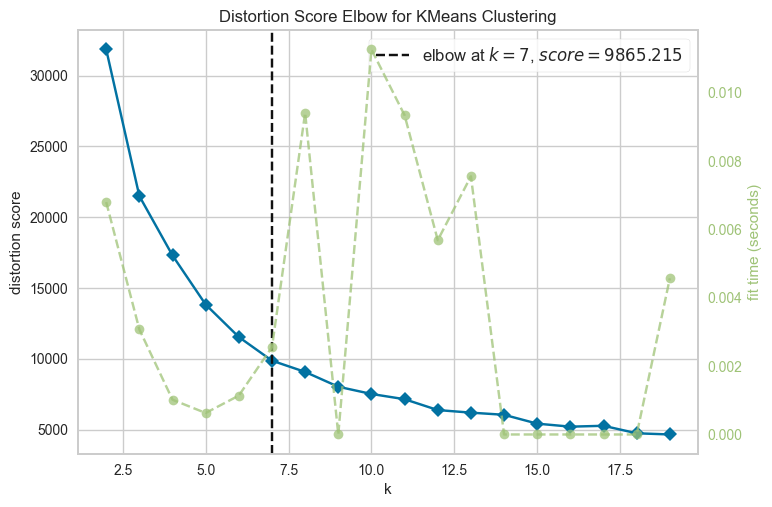

In [1024]:
labels = elbow_kmeans(X_pca, kmeans, elbow_show=True)

In [1025]:
num_cols,cat_cols,cat_but_car = grab_col_names(agg_df)

Observations: 1240
Variables: 44
cat_cols: 0
cat_but_car: 1
num_cols: 43
num_but_car: 0


In [1039]:
per_game = [col for col in num_cols if "_per_game" in col]

In [1033]:
per_game

['minutes_per_game',
 'points_per_game',
 'two_points_made_per_game',
 'two_points_attempted_per_game',
 'three_points_made_per_game',
 'three_points_attempted_per_game',
 'free_throws_made_per_game',
 'free_throws_attempted_per_game',
 'offensive_rebounds_per_game',
 'defensive_rebounds_per_game',
 'total_rebounds_per_game',
 'assists_per_game',
 'steals_per_game',
 'turnovers_per_game',
 'blocks_favour_per_game',
 'blocks_against_per_game']

In [1040]:
per_game = per_game + ["minutes"]

In [1041]:
per_game = [x for x in per_game if "total_reb" not in x]

In [1042]:
per_game

['minutes_per_game',
 'points_per_game',
 'two_points_made_per_game',
 'two_points_attempted_per_game',
 'three_points_made_per_game',
 'three_points_attempted_per_game',
 'free_throws_made_per_game',
 'free_throws_attempted_per_game',
 'offensive_rebounds_per_game',
 'defensive_rebounds_per_game',
 'assists_per_game',
 'steals_per_game',
 'turnovers_per_game',
 'blocks_favour_per_game',
 'blocks_against_per_game',
 'fouls_committed_per_game',
 'fouls_received_per_game',
 'valuation_per_game',
 'minutes']

In [1043]:
per_df = agg_df[per_game]

In [1045]:
per_scaled = scaler.fit_transform(per_df)

The average silhouette score is: 0.4286605236788646


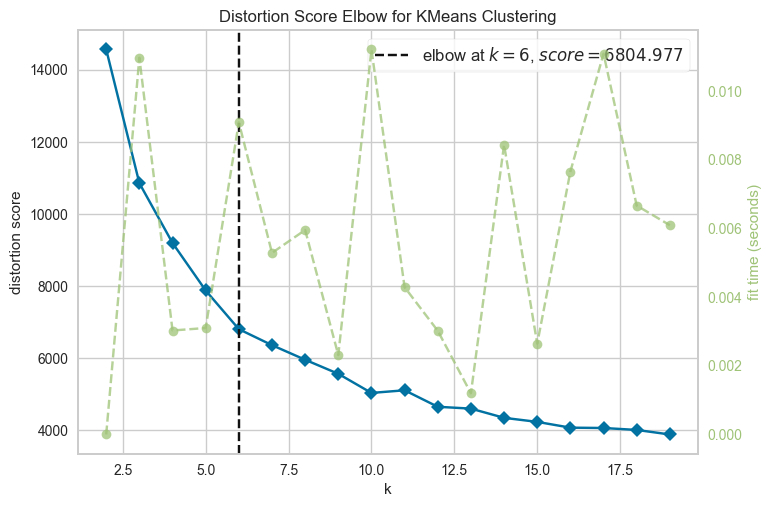

In [1046]:
labels = elbow_kmeans(per_scaled,kmeans,elbow_show=True)

[7.20637895e-01 1.57538005e-01 3.65159838e-02 2.56289948e-02
 1.65394873e-02 1.08086262e-02 8.77201912e-03 6.36500178e-03
 5.14658927e-03 4.43323669e-03 2.90241816e-03 1.89374072e-03
 9.66575916e-04 7.44807471e-04 5.68265410e-04 2.88629920e-04
 2.49693558e-04 2.50906916e-08 4.88855534e-09]
[0.72063789 0.8781759  0.91469188 0.94032088 0.95686037 0.96766899
 0.97644101 0.98280601 0.9879526  0.99238584 0.99528826 0.997182
 0.99814857 0.99889338 0.99946165 0.99975028 0.99999997 1.
 1.        ]
The average silhouette score is: 0.6131148043101687


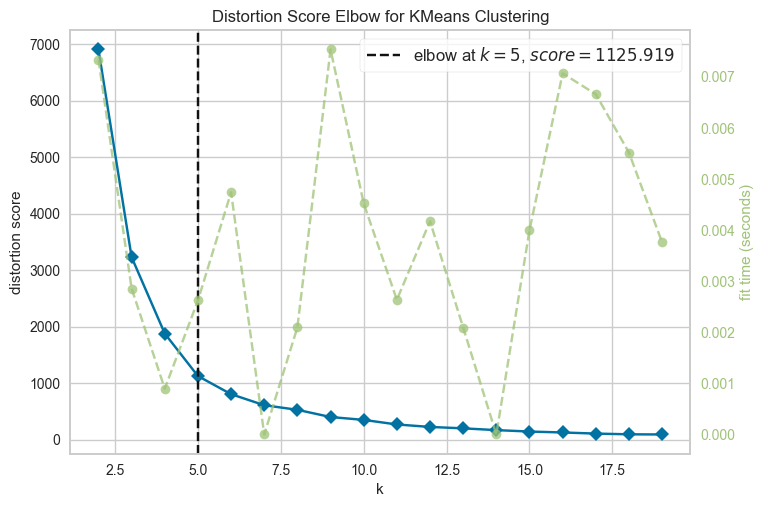

In [1055]:
X_pca = dimension_reduce(per_scaled,pca,cumulative_variance_treshold=0.82, print_cum_var=True)
labels = elbow_kmeans(X_pca,kmeans,elbow_show=True)

# Best result so far but 5 clusters are not enough for comparison 
# I'm gonna remove _made columns and use percentage insead

In [1056]:
per_df["two_points_percentage_per_game"] = (per_df["two_points_made_per_game"] * 100) / per_df["two_points_attempted_per_game"]
per_df["free_throw_percentage_per_game"] = (per_df["free_throws_made_per_game"] * 100) / per_df["free_throws_attempted_per_game"]
per_df["three_points_percentage_per_game"] = (per_df["three_points_made_per_game"] * 100) / per_df["three_points_attempted_per_game"]

In [1057]:
per_df.head()

minutes_per_game  points_per_game  two_points_made_per_game  \
20            213.79            81.14                     21.67   
21            143.82            69.82                     16.19   
24             24.23             5.26                      0.73   
26            161.78            64.04                     11.75   
38             28.65             5.73                      1.45   

    two_points_attempted_per_game  three_points_made_per_game  \
20                          42.67                        8.12   
21                          31.56                        7.53   
24                           2.29                        0.83   
26                          22.02                       10.06   
38                           2.07                        0.72   

    three_points_attempted_per_game  free_throws_made_per_game  \
20                            26.01                      13.49   
21                            21.05                      14.88   
24                             3.19                       1.31   
26                            24.17                      10.35   
38                             2.93                       0.67   

    free_throws_attempted_per_game  offensive_rebounds_per_game  \
20                           17.42                         6.25   
21                           19.17                         3.64   
24                            1.89                         0.76   
26                           11.55                         1.54   
38                            0.93                         0.46   

    defensive_rebounds_per_game  assists_per_game  steals_per_game  \
20                        19.49             19.11             8.27   
21                         9.44              6.09             3.92   
24                         2.27              1.21             0.49   
26                        11.55             18.83             5.04   
38                         1.67              1.93             0.62   

    turnovers_per_game  blocks_favour_per_game  blocks_against_per_game  \
20               15.18                    0.78                     3.43   
21                8.63                    1.46                     2.30   
24                0.44                    0.07                     0.00   
26                8.11                    0.23                     1.22   
38                1.84                    0.00                     0.11   

    fouls_committed_per_game  fouls_received_per_game  valuation_per_game  \
20                     17.98                    20.11               75.75   
21                      9.43                    19.87               60.72   
24                      1.93                     1.21                4.41   
26                     14.28                    12.43               64.47   
38                      2.58                     1.78                4.58   

    minutes  two_points_percentage_per_game  free_throw_percentage_per_game  \
20   3438.1                       50.785095                       77.439724   
21   2424.3                       51.299113                       77.621283   
24    274.7                       31.877729                       69.312169   
26   3594.5                       53.360581                       89.610390   
38    277.3                       70.048309                       72.043011   

    three_points_percentage_per_game  
20                         31.218762  
21                         35.771971  
24                         26.018809  
26                         41.621845  
38                         24.573379

In [1058]:
per_percentage = per_df.drop(["two_points_made_per_game","free_throws_made_per_game","three_points_made_per_game","valuation_per_game"],axis=1)

<Axes: >

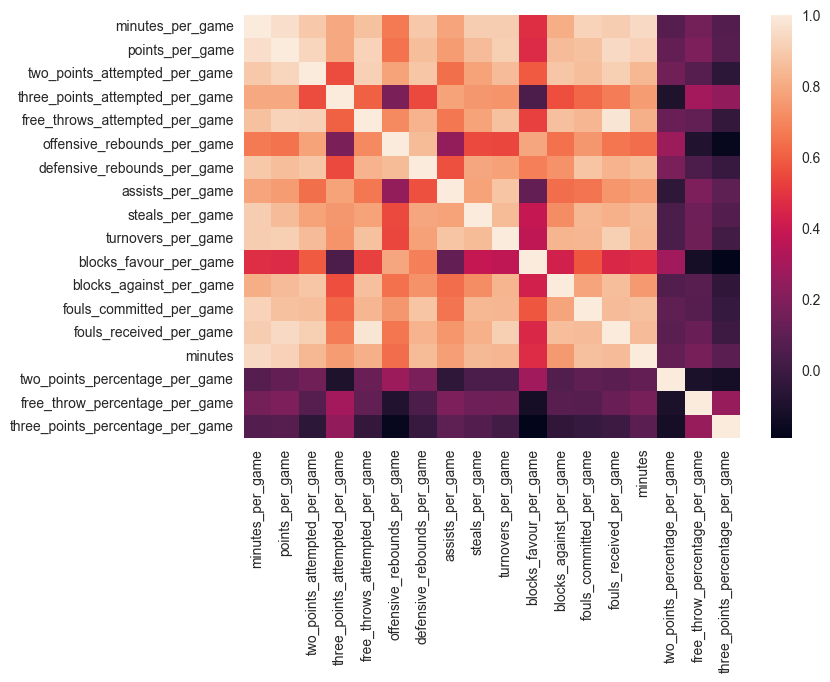

In [1060]:
sns.heatmap(per_percentage.corr())

In [1065]:
missing_values_table(per_percentage)

                                  n_miss  ratio
three_points_percentage_per_game      87   7.02
free_throw_percentage_per_game        14   1.13
two_points_percentage_per_game         1   0.08


In [1066]:
per_percentage.dropna(inplace=True)

In [1067]:
scaled_per = scaler.fit_transform(per_percentage)

The average silhouette score is: 0.2110451269451479


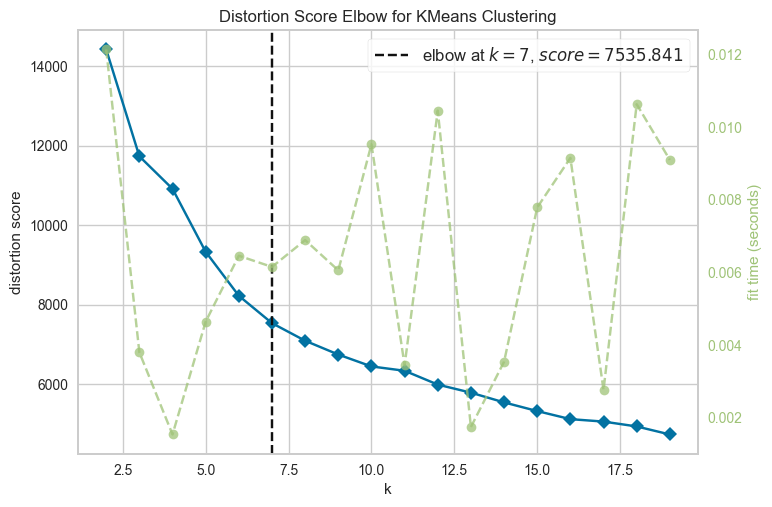

In [1068]:
labels = elbow_kmeans(scaled_per,kmeans, elbow_show=True)

In [1084]:
X_pca = dimension_reduce(scaled_per,pca,cumulative_variance_treshold=0.95,print_cum_var=True)

[6.00489370e-01 1.68839042e-01 6.91301297e-02 3.27341024e-02
 3.03422159e-02 2.91158711e-02 1.91767020e-02 1.38408056e-02
 8.83483164e-03 7.71608026e-03 4.93806261e-03 4.60396450e-03
 4.08652930e-03 2.80162545e-03 1.88384076e-03 7.02469475e-04
 6.00045159e-04 1.64311959e-04]
[0.60048937 0.76932841 0.83845854 0.87119264 0.90153486 0.93065073
 0.94982743 0.96366824 0.97250307 0.98021915 0.98515721 0.98976118
 0.99384771 0.99664933 0.99853317 0.99923564 0.99983569 1.        ]


The average silhouette score is: 0.19304381711242963


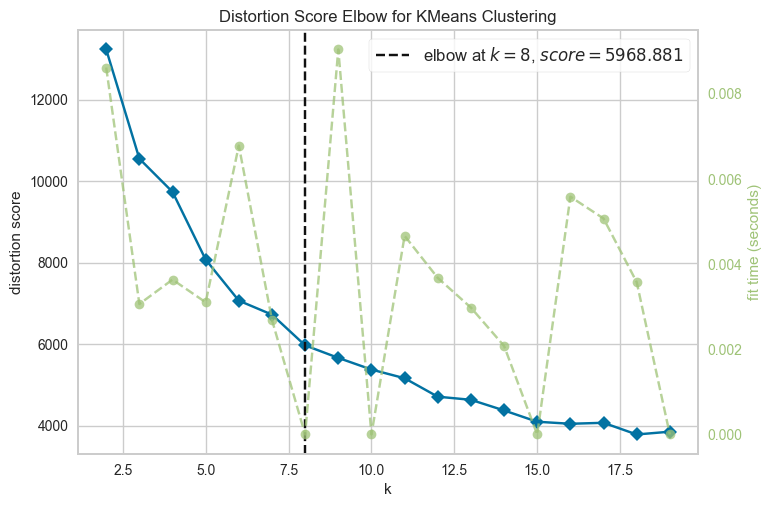

In [1087]:
labels = elbow_kmeans(X_pca,kmeans, elbow_show=True)

In [1088]:
per_df = agg_df[per_game]

In [1100]:
player_counts = df['player_id'].value_counts().reset_index()


In [1101]:
player_counts

player_id  count
0         PTGB     16
1         PAMM     15
2         PBWI     15
3         PJUO     14
4         PAAX     14
...        ...    ...
2098      PBZQ      1
2099      PAPI      1
2100   P011209      1
2101      PABG      1
2102   P005701      1

[2103 rows x 2 columns]

In [1113]:
player_counts.columns = ['player_id', 'season_played']

# Merge the count with the aggregated dataframe
agg_df = agg_df.merge(player_counts, on='player_id', how='left')

In [1115]:
def fix_per_game(data_frame):
    columns = data_frame.columns
    for col in columns:
        current = str(col)
        if "_per_game" in current:
            data_frame[col] = data_frame[col] / data_frame["season_played"]

In [1126]:
copy = agg_df.copy()

In [1127]:
copy = copy.loc[copy["games_played"] > 10]

In [1117]:
fix_per_game(copy)

In [1118]:
copy.head()

games_played  games_started  minutes  points  two_points_made  \
0         157.0          115.0   3438.1    1332              359   
1          87.0           57.0   2424.3    1199              283   
2          29.0            0.0    274.7      52                8   
3         180.0           55.0   3594.5    1421              258   
4          30.0            8.0    277.3      54               13   

   two_points_attempted  three_points_made  three_points_attempted  \
0                   702                133                     419   
1                   540                126                     351   
2                    23                  8                      35   
3                   487                223                     544   
4                    20                  7                      28   

   free_throws_made  free_throws_attempted  offensive_rebounds  \
0               215                    268                  92   
1               255                    324                  55   
2                12                     16                   8   
3               236                    265                  32   
4                 7                     10                   5   

   defensive_rebounds  total_rebounds  assists  steals  turnovers  \
0                 308             400      327     141        251   
1                 160             215      107      59        137   
2                  25              33       15       6          5   
3                 258             290      417     108        175   
4                  16              21       18       6         17   

   blocks_favour  blocks_against  fouls_committed  fouls_received  valuation  \
0             12              54              313             319       1231   
1             28              41              160             330       1049   
2              1               0               24              11         43   
3              5              24              324             278       1417   
4              0               1               26              17         41   

   minutes_per_game  points_per_game  two_points_made_per_game  \
0         23.754444         9.015556                  2.407778   
1         15.980000         7.757778                  1.798889   
2          2.692222         0.584444                  0.081111   
3         80.890000        32.020000                  5.875000   
4         28.650000         5.730000                  1.450000   

   two_points_attempted_per_game  two_points_percentage  \
0                       4.741111                  4.580   
1                       3.506667                  2.574   
2                       0.254444                  0.989   
3                      11.010000                  4.206   
4                       2.070000                  1.931   

   three_points_made_per_game  three_points_attempted_per_game  \
0                    0.902222                         2.890000   
1                    0.836667                         2.338889   
2                    0.092222                         0.354444   
3                    5.030000                        12.085000   
4                    0.720000                         2.930000   

   three_points_percentage  free_throws_made_per_game  \
0                    2.879                   1.498889   
1                    1.810                   1.653333   
2                    0.740                   0.145556   
3                    3.339                   5.175000   
4                    0.820                   0.670000   

   free_throws_attempted_per_game  free_throws_percentage  \
0                        1.935556                   7.533   
1                        2.130000                   3.669   
2                        0.210000                   2.125   
3                        5.775000                   7.012   
4                        0.930000                   2.167   

   offensive_rebounds

In [1128]:
copy.loc[copy["minutes_per_game"] > 40]

games_played  games_started  minutes  points  two_points_made  \
0            157.0          115.0   3438.1    1332              359   
1             87.0           57.0   2424.3    1199              283   
3            180.0           55.0   3594.5    1421              258   
5             44.0           20.0    686.8     189               33   
6             55.0            6.0    643.7     119               20   
...            ...            ...      ...     ...              ...   
1230          18.0            2.0    211.0      34                4   
1232          20.0           18.0    588.5     318               57   
1233          53.0           19.0    872.3     261              109   
1235          47.0           39.0   1324.2     610              140   
1237          55.0           44.0   1371.4     468              135   

      two_points_attempted  three_points_made  three_points_attempted  \
0                      702                133                     419   
1                      540                126                     351   
3                      487                223                     544   
5                       61                 36                     105   
6                       49                 19                      59   
...                    ...                ...                     ...   
1230                     8                  8                      35   
1232                   128                 50                     121   
1233                   194                  0                       1   
1235                   314                 54                     148   
1237                   245                 35                     107   

      free_throws_made  free_throws_attempted  offensive_rebounds  \
0                  215                    268                  92   
1                  255                    324                  55   
3                  236                    265                  32   
5                   15                     21                   4   
6                   22                     28                  12   
...                ...                    ...                 ...   
1230                 2                      2                   1   
1232                54                     66                  15   
1233                43                     78                  69   
1235               168                    202                  41   
1237                93                    116                  36   

      defensive_rebounds  total_rebounds  assists  steals  turnovers  \
0                    308             400      327     141        251   
1                    160             215      107      59        137   
3                    258             290      417     108        175   
5                     45              49       46       5         44   
6                     49              61       38      21         23   
...                  ...             ...      ...     ...        ...   
1230                  12              13       23       6         22   
1232                  47              62       37      20         47   
1233                 131             200       23      33         76   
1235                 127             168       86      64        120   
1237                 182             218       72      39         63   

      blocks_favour  blocks_against  fouls_committed  fouls_received  \
0                12              54              313             319   
1                28              41              160             330   
3                 5              24              324             278   
5                 3               4               70              32   
6                 1               7               71              42   
...             ...             ...              ...             ...   
1230              0               2               34               9   
1232  

In [1125]:
df.loc[df["player_id"] == "P005422"]

season_player_id season_code player_id         player team_id  \
2063  E2015_P005422_MUN       E2015   P005422  JALLOW, KARIM     MUN   

      games_played  games_started  minutes  points  two_points_made  \
2063           0.0            0.0      0.0       0                0   

      two_points_attempted  three_points_made  three_points_attempted  \
2063                     0                  0                       0   

      free_throws_made  free_throws_attempted  offensive_rebounds  \
2063                 0                      0                   0   

      defensive_rebounds  total_rebounds  assists  steals  turnovers  \
2063                   0               0        0       0          0   

      blocks_favour  blocks_against  fouls_committed  fouls_received  \
2063              0               0                0               0   

      valuation  minutes_per_game  points_per_game  two_points_made_per_game  \
2063          0               0.0              0.0                       0.0   

      two_points_attempted_per_game  two_points_percentage  \
2063                            0.0                    0.0   

      three_points_made_per_game  three_points_attempted_per_game  \
2063                         0.0                              0.0   

      three_points_percentage  free_throws_made_per_game  \
2063                      0.0                        0.0   

      free_throws_attempted_per_game  free_throws_percentage  \
2063                             0.0                     0.0   

      offensive_rebounds_per_game  defensive_rebounds_per_game  \
2063                          0.0                          0.0   

      total_rebounds_per_game  assists_per_game  steals_per_game  \
2063                      0.0               0.0              0.0   

      turnovers_per_game  blocks_favour_per_game  blocks_against_per_game  \
2063                 0.0                     0.0                      0.0   

      fouls_committed_per_game  fouls_received_per_game  valuation_per_game  
2063                       0.0                      0.0                 0.0

In [1129]:
agg_df

games_played  games_started  minutes  points  two_points_made  \
0            157.0          115.0   3438.1    1332              359   
1             87.0           57.0   2424.3    1199              283   
2             29.0            0.0    274.7      52                8   
3            180.0           55.0   3594.5    1421              258   
4             30.0            8.0    277.3      54               13   
...            ...            ...      ...     ...              ...   
1235          47.0           39.0   1324.2     610              140   
1236          15.0           11.0    369.0     129               42   
1237          55.0           44.0   1371.4     468              135   
1238          55.0            1.0    336.7      66               24   
1239          12.0            0.0    141.7      16                6   

      two_points_attempted  three_points_made  three_points_attempted  \
0                      702                133                     419   
1                      540                126                     351   
2                       23                  8                      35   
3                      487                223                     544   
4                       20                  7                      28   
...                    ...                ...                     ...   
1235                   314                 54                     148   
1236                    71                  9                      35   
1237                   245                 35                     107   
1238                    43                  1                       9   
1239                    19                  0                       6   

      free_throws_made  free_throws_attempted  offensive_rebounds  \
0                  215                    268                  92   
1                  255                    324                  55   
2                   12                     16                   8   
3                  236                    265                  32   
4                    7                     10                   5   
...                ...                    ...                 ...   
1235               168                    202                  41   
1236                18                     25                  17   
1237                93                    116                  36   
1238                15                     27                  21   
1239                 4                      4                   0   

      defensive_rebounds  total_rebounds  assists  steals  turnovers  \
0                    308             400      327     141        251   
1                    160             215      107      59        137   
2                     25              33       15       6          5   
3                    258             290      417     108        175   
4                     16              21       18       6         17   
...                  ...             ...      ...     ...        ...   
1235                 127             168       86      64        120   
1236                  21              38       42      15         35   
1237                 182             218       72      39         63   
1238                  30              51        9      10         16   
1239                   8               8       13       4         15   

      blocks_favour  blocks_against  fouls_committed  fouls_received  \
0                12              54              313             319   
1                28              41              160             330   
2                 1               0               24              11   
3                 5              24              324             278   
4                 0               1               26              17   
...             ...             ...              ...             ...   
1235             13              27              144             222   
1236  

In [1131]:
columns = copy.columns
for col in columns:
    current = str(col)
    if "_per_game" in current:
        print(col)
        copy[col] = copy[col] / copy["season_played"]

minutes_per_game
points_per_game
two_points_made_per_game
two_points_attempted_per_game
three_points_made_per_game
three_points_attempted_per_game
free_throws_made_per_game
free_throws_attempted_per_game
offensive_rebounds_per_game
defensive_rebounds_per_game
total_rebounds_per_game
assists_per_game
steals_per_game
turnovers_per_game
blocks_favour_per_game
blocks_against_per_game
fouls_committed_per_game
fouls_received_per_game
valuation_per_game


In [1132]:
copy.head()

games_played  games_started  minutes  points  two_points_made  \
0         157.0          115.0   3438.1    1332              359   
1          87.0           57.0   2424.3    1199              283   
2          29.0            0.0    274.7      52                8   
3         180.0           55.0   3594.5    1421              258   
4          30.0            8.0    277.3      54               13   

   two_points_attempted  three_points_made  three_points_attempted  \
0                   702                133                     419   
1                   540                126                     351   
2                    23                  8                      35   
3                   487                223                     544   
4                    20                  7                      28   

   free_throws_made  free_throws_attempted  offensive_rebounds  \
0               215                    268                  92   
1               255                    324                  55   
2                12                     16                   8   
3               236                    265                  32   
4                 7                     10                   5   

   defensive_rebounds  total_rebounds  assists  steals  turnovers  \
0                 308             400      327     141        251   
1                 160             215      107      59        137   
2                  25              33       15       6          5   
3                 258             290      417     108        175   
4                  16              21       18       6         17   

   blocks_favour  blocks_against  fouls_committed  fouls_received  valuation  \
0             12              54              313             319       1231   
1             28              41              160             330       1049   
2              1               0               24              11         43   
3              5              24              324             278       1417   
4              0               1               26              17         41   

   minutes_per_game  points_per_game  two_points_made_per_game  \
0         23.754444         9.015556                  2.407778   
1         15.980000         7.757778                  1.798889   
2          2.692222         0.584444                  0.081111   
3         80.890000        32.020000                  5.875000   
4         28.650000         5.730000                  1.450000   

   two_points_attempted_per_game  two_points_percentage  \
0                       4.741111                  4.580   
1                       3.506667                  2.574   
2                       0.254444                  0.989   
3                      11.010000                  4.206   
4                       2.070000                  1.931   

   three_points_made_per_game  three_points_attempted_per_game  \
0                    0.902222                         2.890000   
1                    0.836667                         2.338889   
2                    0.092222                         0.354444   
3                    5.030000                        12.085000   
4                    0.720000                         2.930000   

   three_points_percentage  free_throws_made_per_game  \
0                    2.879                   1.498889   
1                    1.810                   1.653333   
2                    0.740                   0.145556   
3                    3.339                   5.175000   
4                    0.820                   0.670000   

   free_throws_attempted_per_game  free_throws_percentage  \
0                        1.935556                   7.533   
1                        2.130000                   3.669   
2                        0.210000                   2.125   
3                        5.775000                   7.012   
4                        0.930000                   2.167   

   offensive_rebounds

In [1133]:
df.loc[df["player_id"] == "P005199"]

season_player_id season_code player_id           player team_id  \
25  E2013_P005199_STR       E2013   P005199  ABROMAITIS, TIM     STR   
26  E2019_P005199_DYR       E2019   P005199  ABROMAITIS, TIM     DYR   

    games_played  games_started  minutes  points  two_points_made  \
25          10.0            5.0    184.7      75               22   
26          27.0            8.0    490.2     202               40   

    two_points_attempted  three_points_made  three_points_attempted  \
25                    38                  8                      24   
26                    70                 31                      76   

    free_throws_made  free_throws_attempted  offensive_rebounds  \
25                 7                     12                  15   
26                29                     37                  26   

    defensive_rebounds  total_rebounds  assists  steals  turnovers  \
25                  17              32        8       5         10   
26                  75             101       26      13         12   

    blocks_favour  blocks_against  fouls_committed  fouls_received  valuation  \
25              2               3               21              17         68   
26              8               6               51              46        244   

    minutes_per_game  points_per_game  two_points_made_per_game  \
25             18.47             7.50                      2.20   
26             18.16             7.48                      1.48   

    two_points_attempted_per_game  two_points_percentage  \
25                           3.80                  0.579   
26                           2.59                  0.571   

    three_points_made_per_game  three_points_attempted_per_game  \
25                        0.80                             2.40   
26                        1.15                             2.81   

    three_points_percentage  free_throws_made_per_game  \
25                    0.333                       0.70   
26                    0.408                       1.07   

    free_throws_attempted_per_game  free_throws_percentage  \
25                            1.20                   0.583   
26                            1.37                   0.784   

    offensive_rebounds_per_game  defensive_rebounds_per_game  \
25                         1.50                         1.70   
26                         0.96                         2.78   

    total_rebounds_per_game  assists_per_game  steals_per_game  \
25                     3.20              0.80             0.50   
26                     3.74              0.96             0.48   

    turnovers_per_game  blocks_favour_per_game  blocks_against_per_game  \
25                1.00                     0.2                     0.30   
26                0.44                     0.3                     0.22   

    fouls_committed_per_game  fouls_received_per_game  valuation_per_game  
25                      2.10                      1.7                6.80  
26                      1.89                      1.7                9.04

In [1135]:
num_cols,cat_cols,cat_but_car = grab_col_names(df)

Observations: 5346
Variables: 48
cat_cols: 1
cat_but_car: 4
num_cols: 43
num_but_car: 0


In [1142]:
num_cols = num_cols + ["player_id"]

In [1144]:
agg_df = df[num_cols].groupby("player_id").sum()

In [1145]:
agg_df = agg_df.loc[agg_df["games_played"] > 10]

In [1146]:
agg_df

games_played  games_started  minutes  points  two_points_made  \
player_id                                                                  
P000007           157.0          115.0   3438.1    1332              359   
P000009            87.0           57.0   2424.3    1199              283   
P000035            29.0            0.0    274.7      52                8   
P000046           180.0           55.0   3594.5    1421              258   
P000092            30.0            8.0    277.3      54               13   
...                 ...            ...      ...     ...              ...   
PTGV               47.0           39.0   1324.2     610              140   
PTHB               15.0           11.0    369.0     129               42   
PTHC               55.0           44.0   1371.4     468              135   
PTHY               55.0            1.0    336.7      66               24   
PXBB               12.0            0.0    141.7      16                6   

           two_points_attempted  three_points_made  three_points_attempted  \
player_id                                                                    
P000007                     702                133                     419   
P000009                     540                126                     351   
P000035                      23                  8                      35   
P000046                     487                223                     544   
P000092                      20                  7                      28   
...                         ...                ...                     ...   
PTGV                        314                 54                     148   
PTHB                         71                  9                      35   
PTHC                        245                 35                     107   
PTHY                         43                  1                       9   
PXBB                         19                  0                       6   

           free_throws_made  free_throws_attempted  offensive_rebounds  \
player_id                                                                
P000007                 215                    268                  92   
P000009                 255                    324                  55   
P000035                  12                     16                   8   
P000046                 236                    265                  32   
P000092                   7                     10                   5   
...                     ...                    ...                 ...   
PTGV                    168                    202                  41   
PTHB                     18                     25                  17   
PTHC                     93                    116                  36   
PTHY                     15                     27                  21   
PXBB                      4                      4                   0   

           defensive_rebounds  total_rebounds  assists  steals  turnovers  \
player_id                                                                   
P000007                   308             400      327     141        251   
P000009                   160             215      107      59        137   
P000035                    25              33       15       6          5   
P000046                   258             290      417     108        175   
P000092                    16              21       18       6         17   
...                       ...             ...      ...     ...        ...   
PTGV                      127             168       86      64        120   
PTHB                       21              38       42      15         35   
PTHC                      182             218       72      39         63   
PTHY                       30              51        9      10         16   
PXBB                        8               8       13       4         15   

           blocks_favour  blocks_against  

In [1147]:
player_counts.columns = ['player_id', 'season_played']

# Merge the count with the aggregated dataframe
agg_df = agg_df.merge(player_counts, on='player_id', how='left')

In [1149]:
num_cols,cat_cols,cat_but_car = grab_col_names(agg_df)

Observations: 1240
Variables: 45
cat_cols: 1
cat_but_car: 1
num_cols: 43
num_but_car: 1


In [1150]:
per_col = [col for col in num_cols if "_per" in col]

In [1151]:
per_col

['minutes_per_game',
 'points_per_game',
 'two_points_made_per_game',
 'two_points_attempted_per_game',
 'two_points_percentage',
 'three_points_made_per_game',
 'three_points_attempted_per_game',
 'three_points_percentage',
 'free_throws_made_per_game',
 'free_throws_attempted_per_game',
 'free_throws_percentage',
 'offensive_rebounds_per_game',
 'defensive_rebounds_per_game',
 'total_rebounds_per_game',
 'assists_per_game',
 'steals_per_game',
 'turnovers_per_game',
 'blocks_favour_per_game',
 'blocks_against_per_game',
 'fouls_committed_per_game',
 'fouls_received_per_game',
 'valuation_per_game']

In [1152]:
per_df = agg_df[per_col]

In [1153]:
per_df["player_id"] = agg_df["player_id"]

In [1154]:
per_df.drop(["player_id"],axis=1,inplace=True)

In [1155]:
per_df["season_played"] = agg_df["season_played"]

In [1157]:
agg_df[per_col] = agg_df[per_col].div(agg_df['season_played'], axis=0)

In [1158]:
agg_df

player_id  games_played  games_started  minutes  points  two_points_made  \
0      P000007         157.0          115.0   3438.1    1332              359   
1      P000009          87.0           57.0   2424.3    1199              283   
2      P000035          29.0            0.0    274.7      52                8   
3      P000046         180.0           55.0   3594.5    1421              258   
4      P000092          30.0            8.0    277.3      54               13   
...        ...           ...            ...      ...     ...              ...   
1235      PTGV          47.0           39.0   1324.2     610              140   
1236      PTHB          15.0           11.0    369.0     129               42   
1237      PTHC          55.0           44.0   1371.4     468              135   
1238      PTHY          55.0            1.0    336.7      66               24   
1239      PXBB          12.0            0.0    141.7      16                6   

      two_points_attempted  three_points_made  three_points_attempted  \
0                      702                133                     419   
1                      540                126                     351   
2                       23                  8                      35   
3                      487                223                     544   
4                       20                  7                      28   
...                    ...                ...                     ...   
1235                   314                 54                     148   
1236                    71                  9                      35   
1237                   245                 35                     107   
1238                    43                  1                       9   
1239                    19                  0                       6   

      free_throws_made  free_throws_attempted  offensive_rebounds  \
0                  215                    268                  92   
1                  255                    324                  55   
2                   12                     16                   8   
3                  236                    265                  32   
4                    7                     10                   5   
...                ...                    ...                 ...   
1235               168                    202                  41   
1236                18                     25                  17   
1237                93                    116                  36   
1238                15                     27                  21   
1239                 4                      4                   0   

      defensive_rebounds  total_rebounds  assists  steals  turnovers  \
0                    308             400      327     141        251   
1                    160             215      107      59        137   
2                     25              33       15       6          5   
3                    258             290      417     108        175   
4                     16              21       18       6         17   
...                  ...             ...      ...     ...        ...   
1235                 127             168       86      64        120   
1236                  21              38       42      15         35   
1237                 182             218       72      39         63   
1238                  30              51        9      10         16   
1239                   8               8       13       4         15   

      blocks_favour  blocks_against  fouls_committed  fouls_received  \
0                12              54              313             319   
1                28              41              160             330   
2                 1               0               24              11   
3                 5              24              324             278   
4                 0               1               26              17   
...             ...          

In [1276]:
X = agg_df.drop(["player_id"],axis=1)

In [1208]:
X_scaled = scaler.fit_transform(X)

In [1221]:
X_minmax = minmax.fit_transform(X)

In [1314]:
# def find_optimal_cumulative_variance(data_frame, elbow_range=(2, 20), variance_range=np.arange(0.80, 0.95, 0.01)):
#     best_score = -1
#     best_variance = 0
#     best_n_components = 0
#     best_labels = None

#     for variance_threshold in variance_range:
#         X_pca, n_components = dimension_reduce(data_frame, cumulative_variance_threshold=variance_threshold)
        
#         # Perform k-means and calculate silhouette score
#         kmeans = KMeans()
#         elbow = KElbowVisualizer(kmeans, k=elbow_range)
#         elbow.fit(X_pca)
        
#         kmeans = KMeans(n_clusters=elbow.elbow_value_).fit(X_pca)
#         labels = kmeans.labels_
#         silhouette_avg = silhouette_score(X_pca, labels)
        
#         print(f"Variance threshold: {variance_threshold}, Silhouette score: {silhouette_avg}, Components: {n_components}")

#         if silhouette_avg > best_score:
#             best_score = silhouette_avg
#             best_variance = variance_threshold
#             best_n_components = n_components
#             best_labels = labels

#     print(f"Best Variance: {best_variance}, Best Silhouette Score: {best_score}, Components: {best_n_components}")
#     return best_labels, best_variance, best_score

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer

def find_optimal_cumulative_variance(data_frame, elbow_range= 20(2,), variance_range=np.arange(0.80, 0.95, 0.01)):
    best_score = -1
    best_variance = 0
    best_n_components = 0
    best_labels = None
    best_elbow_value = 0

    for variance_threshold in variance_range:
        X_pca, n_components = dimension_reduce(data_frame, cumulative_variance_threshold=variance_threshold)
        
        # Perform k-means and calculate silhouette score
        kmeans = KMeans()
        elbow = KElbowVisualizer(kmeans, k=elbow_range)
        elbow.fit(X_pca)
        
        kmeans = KMeans(n_clusters=elbow.elbow_value_).fit(X_pca)
        labels = kmeans.labels_
        silhouette_avg = silhouette_score(X_pca, labels)
        
        print(f"Variance threshold: {variance_threshold}, Silhouette score: {silhouette_avg}, Components: {n_components}, Elbow value: {elbow.elbow_value_}")

        if silhouette_avg > best_score:
            best_score = silhouette_avg
            best_variance = variance_threshold
            best_n_components = n_components
            best_labels = labels
            best_elbow_value = elbow.elbow_value_

    print(f"Best Variance: {best_variance}, Best Silhouette Score: {best_score}, Components: {best_n_components}, Best Elbow Value: {best_elbow_value}")
    return best_labels, best_variance, best_score, best_elbow_value


In [1216]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()

X_std = std_scaler.fit_transform(X)

Variance threshold: 0.8, Silhouette score: 0.22288737679227585, Components: 8
Variance threshold: 0.81, Silhouette score: 0.19540443129536, Components: 9
Variance threshold: 0.8200000000000001, Silhouette score: 0.2230198326462405, Components: 10
Variance threshold: 0.8300000000000001, Silhouette score: 0.17988382103075934, Components: 10
Variance threshold: 0.8400000000000001, Silhouette score: 0.1816137465513004, Components: 11
Variance threshold: 0.8500000000000001, Silhouette score: 0.1944382110198792, Components: 12
Variance threshold: 0.8600000000000001, Silhouette score: 0.17488996524394806, Components: 13
Variance threshold: 0.8700000000000001, Silhouette score: 0.1639780367862201, Components: 13
Variance threshold: 0.8800000000000001, Silhouette score: 0.17160273359481903, Components: 14
Variance threshold: 0.8900000000000001, Silhouette score: 0.1565401388234851, Components: 15
Variance threshold: 0.9000000000000001, Silhouette score: 0.17641584625035586, Components: 16
Varia

(array([6, 6, 3, ..., 2, 3, 3]), 0.8200000000000001, 0.2230198326462405)

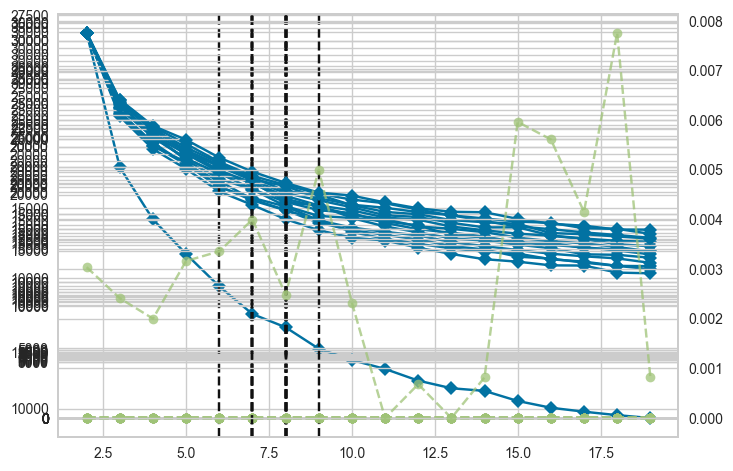

In [1217]:
find_optimal_cumulative_variance(X_std)

Variance threshold: 0.8, Silhouette score: 0.2924354171773661, Components: 3
Variance threshold: 0.81, Silhouette score: 0.28247364492877236, Components: 4
Variance threshold: 0.8200000000000001, Silhouette score: 0.28030164618037867, Components: 4
Variance threshold: 0.8300000000000001, Silhouette score: 0.26889060692432726, Components: 4
Variance threshold: 0.8400000000000001, Silhouette score: 0.2577498301767524, Components: 5
Variance threshold: 0.8500000000000001, Silhouette score: 0.2531709620327722, Components: 5
Variance threshold: 0.8600000000000001, Silhouette score: 0.23443405722758573, Components: 6
Variance threshold: 0.8700000000000001, Silhouette score: 0.24677764404361832, Components: 6
Variance threshold: 0.8800000000000001, Silhouette score: 0.22355795358851238, Components: 7
Variance threshold: 0.8900000000000001, Silhouette score: 0.23682866905285133, Components: 7
Variance threshold: 0.9000000000000001, Silhouette score: 0.21527969075078057, Components: 8
Variance 

(array([1, 4, 0, ..., 6, 0, 0]), 0.8, 0.2924354171773661)

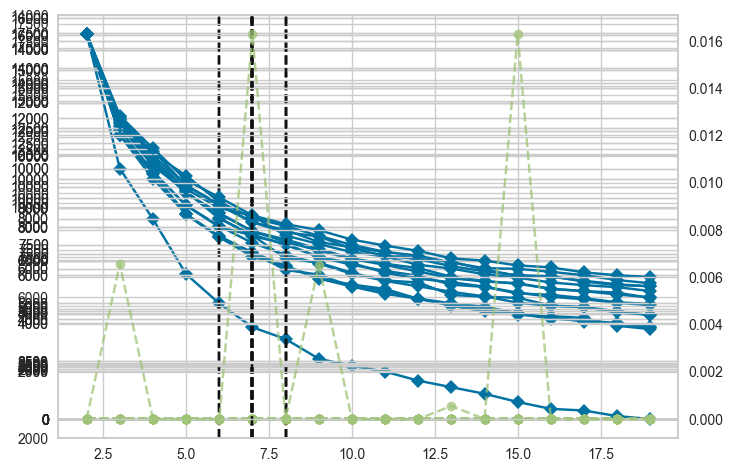

In [1199]:
X_sclaed = scaler.fit_transform(X)
find_optimal_cumulative_variance(X_sclaed)

Variance threshold: 0.8, Silhouette score: 0.3398770767421817, Components: 3
Variance threshold: 0.81, Silhouette score: 0.3452090836432493, Components: 3
Variance threshold: 0.8200000000000001, Silhouette score: 0.307225823106277, Components: 3
Variance threshold: 0.8300000000000001, Silhouette score: 0.3160904076816317, Components: 4
Variance threshold: 0.8400000000000001, Silhouette score: 0.3090954093278947, Components: 4
Variance threshold: 0.8500000000000001, Silhouette score: 0.3160903918841267, Components: 4
Variance threshold: 0.8600000000000001, Silhouette score: 0.25460494361467817, Components: 5
Variance threshold: 0.8700000000000001, Silhouette score: 0.25459856153901034, Components: 5
Variance threshold: 0.8800000000000001, Silhouette score: 0.23518168817085947, Components: 6
Variance threshold: 0.8900000000000001, Silhouette score: 0.27720852999031775, Components: 6
Variance threshold: 0.9000000000000001, Silhouette score: 0.27009360624655454, Components: 7
Variance thre

(array([5, 0, 3, ..., 4, 3, 3]), 0.81, 0.3452090836432493)

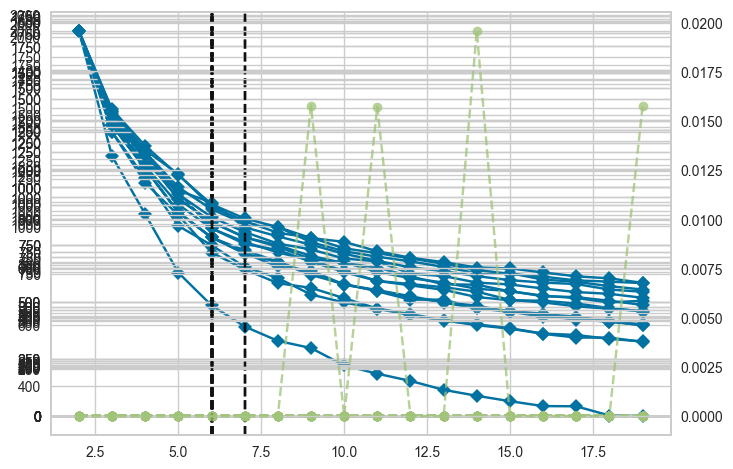

In [1200]:
X_minmax = minmax.fit_transform(X)
find_optimal_cumulative_variance(X_minmax)

In [1261]:
per_col = [col for col in X.columns if "_per" in col]

In [1262]:
per_col = [col for col in per_col if "total_re"  not in col]

In [1263]:
per_col

['minutes_per_game',
 'points_per_game',
 'two_points_made_per_game',
 'two_points_attempted_per_game',
 'two_points_percentage',
 'three_points_made_per_game',
 'three_points_attempted_per_game',
 'three_points_percentage',
 'free_throws_made_per_game',
 'free_throws_attempted_per_game',
 'free_throws_percentage',
 'offensive_rebounds_per_game',
 'defensive_rebounds_per_game',
 'assists_per_game',
 'steals_per_game',
 'turnovers_per_game',
 'blocks_favour_per_game',
 'blocks_against_per_game',
 'fouls_committed_per_game',
 'fouls_received_per_game',
 'valuation_per_game']

In [1264]:
per_col = [col for col in per_col if "percentage" not in col]

In [1269]:
per_col

['minutes_per_game',
 'points_per_game',
 'two_points_made_per_game',
 'two_points_attempted_per_game',
 'three_points_made_per_game',
 'three_points_attempted_per_game',
 'free_throws_made_per_game',
 'free_throws_attempted_per_game',
 'offensive_rebounds_per_game',
 'defensive_rebounds_per_game',
 'assists_per_game',
 'steals_per_game',
 'turnovers_per_game',
 'blocks_favour_per_game',
 'blocks_against_per_game',
 'fouls_committed_per_game']

In [1273]:
X_per = X[per_col]
X_per = minmax.fit_transform(X_per)

In [1274]:
X_per

array([[0.55510848, 0.33331932, 0.33277027, ..., 0.03069658, 0.32481061,
        0.41653913],
       [0.58923357, 0.45348223, 0.39068533, ..., 0.09029066, 0.3422619 ,
        0.33589867],
       [0.2059833 , 0.07323466, 0.0411036 , ..., 0.01010101, 0.        ,
        0.13842125],
       ...,
       [0.7347472 , 0.39592969, 0.41891892, ..., 0.08802309, 0.19097222,
        0.59951366],
       [0.14502331, 0.04579093, 0.07094595, ..., 0.02164502, 0.08333333,
        0.2637486 ],
       [0.32073152, 0.05365402, 0.08445946, ..., 0.        , 0.08333333,
        0.21604938]])

The average silhouette score is: 0.15968784344755435


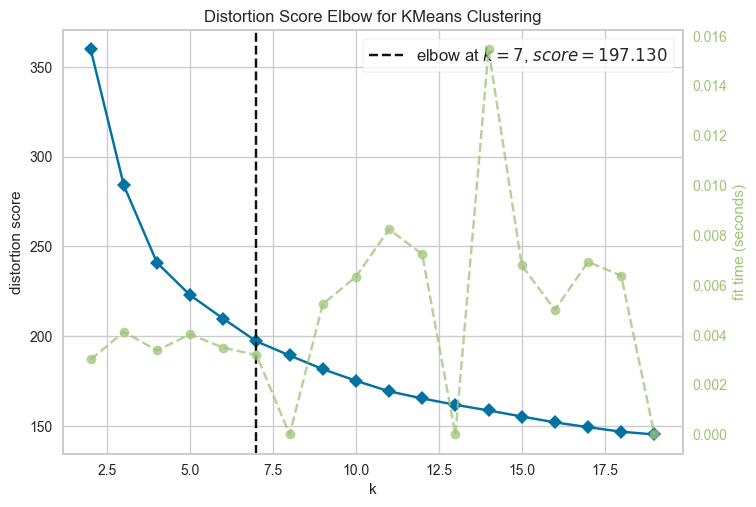

array([3, 3, 0, ..., 3, 0, 0])

In [1275]:
elbow_kmeans(X_per,kmeans,elbow_show=True)

In [1277]:
X = agg_df.drop(["player_id"],axis=1)

In [1288]:
update = [col for col in X.columns if "perc" not in col]

In [1289]:
update = [col for col in update if "valuation" not in col]

In [1291]:
update = [col for col in update if "total_reb" not in col]

In [1290]:
update = [col for col in update if "fouls_rec" not in col]

In [1295]:
X_update = X[update]

In [1296]:
X_scaled = scaler.fit_transform(X_update)

Variance threshold: 0.8, Silhouette score: 0.3544799743189527, Components: 3
Variance threshold: 0.81, Silhouette score: 0.36524926665267154, Components: 3
Variance threshold: 0.8200000000000001, Silhouette score: 0.3610673685916184, Components: 3
Variance threshold: 0.8300000000000001, Silhouette score: 0.3667306069464598, Components: 3
Variance threshold: 0.8400000000000001, Silhouette score: 0.33896066215852316, Components: 4
Variance threshold: 0.8500000000000001, Silhouette score: 0.3396672597539322, Components: 4
Variance threshold: 0.8600000000000001, Silhouette score: 0.3396683758236898, Components: 4
Variance threshold: 0.8700000000000001, Silhouette score: 0.321326528054438, Components: 5
Variance threshold: 0.8800000000000001, Silhouette score: 0.321325851654699, Components: 5
Variance threshold: 0.8900000000000001, Silhouette score: 0.32152143542490264, Components: 5
Variance threshold: 0.9000000000000001, Silhouette score: 0.2794289209128245, Components: 6
Variance thresho

(array([2, 0, 3, ..., 1, 3, 3]), 0.8300000000000001, 0.3667306069464598)

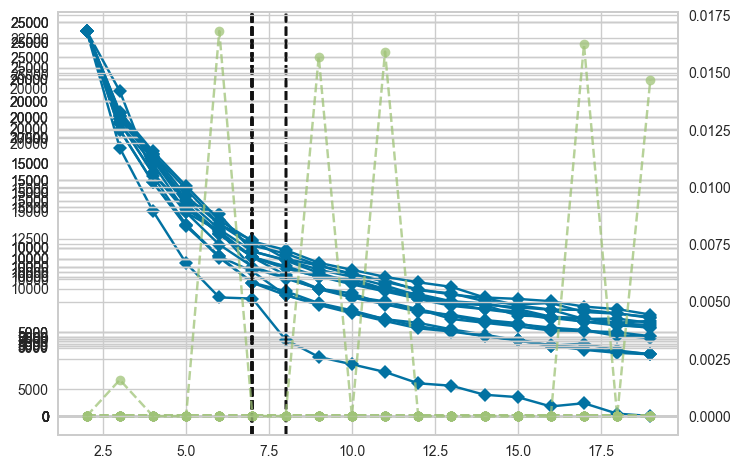

In [1298]:
find_optimal_cumulative_variance(X_scaled)

In [1299]:
upd = [col for col in X_update.columns if "_per" not in col]

In [1300]:
upd

['games_played',
 'games_started',
 'minutes',
 'points',
 'two_points_made',
 'two_points_attempted',
 'three_points_made',
 'three_points_attempted',
 'free_throws_made',
 'free_throws_attempted',
 'offensive_rebounds',
 'defensive_rebounds',
 'assists',
 'steals',
 'turnovers',
 'blocks_favour',
 'blocks_against',
 'fouls_committed']

In [1316]:
X_upd = X[upd]

In [1317]:
X_scaled = scaler.fit_transform(X_upd)

The average silhouette score is: 0.47197374989340446


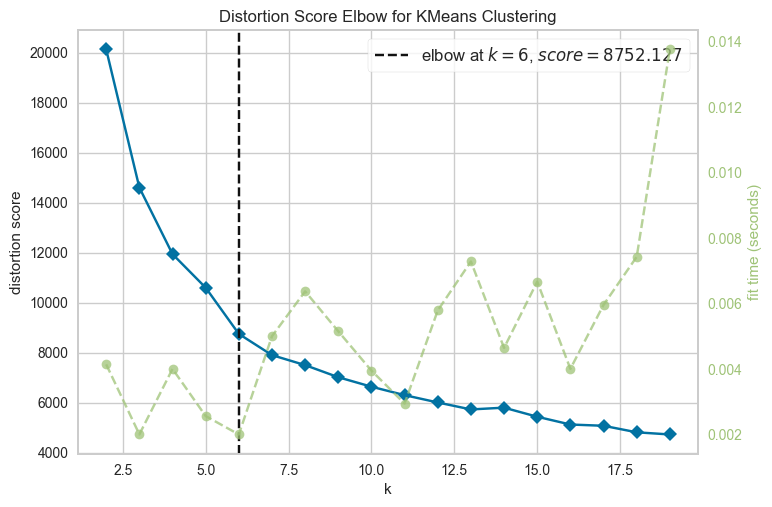

array([1, 5, 0, ..., 5, 0, 0])

In [1303]:
elbow_kmeans(X_scaled,kmeans,elbow_show=True)

Variance threshold: 0.8, Silhouette score: 0.5621545757431723, Components: 2, Elbow value: 6
Variance threshold: 0.81, Silhouette score: 0.5560337991208077, Components: 2, Elbow value: 6
Variance threshold: 0.8200000000000001, Silhouette score: 0.5530624138530342, Components: 2, Elbow value: 6
Variance threshold: 0.8300000000000001, Silhouette score: 0.5625071510404188, Components: 2, Elbow value: 6
Variance threshold: 0.8400000000000001, Silhouette score: 0.5625071510410046, Components: 2, Elbow value: 6
Variance threshold: 0.8500000000000001, Silhouette score: 0.5576217688473026, Components: 2, Elbow value: 6
Variance threshold: 0.8600000000000001, Silhouette score: 0.5576525808989206, Components: 2, Elbow value: 6
Variance threshold: 0.8700000000000001, Silhouette score: 0.5546396875769394, Components: 2, Elbow value: 6
Variance threshold: 0.8800000000000001, Silhouette score: 0.49400133849530653, Components: 2, Elbow value: 7
Variance threshold: 0.8900000000000001, Silhouette score

(array([5, 0, 1, ..., 0, 1, 1]), 0.8400000000000001, 0.5625071510410046, 6)

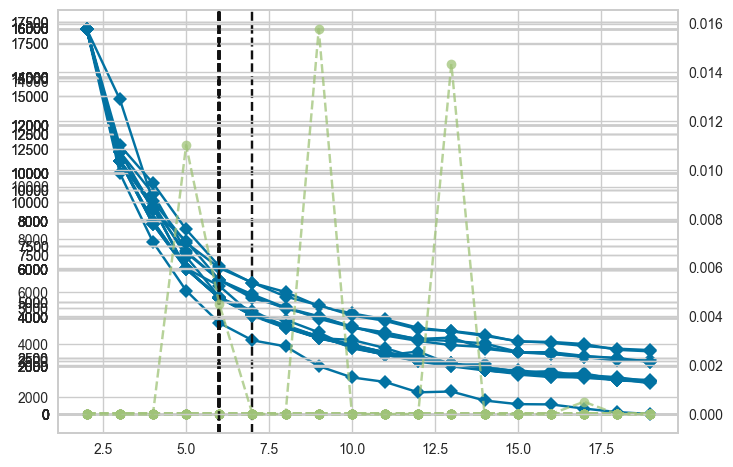

In [1318]:
find_optimal_cumulative_variance(X_scaled)


In [1305]:
for col in X_upd.columns:
    if check_outliers(X_upd,col):
        replace_with_trehold(X_upd,col)

In [1306]:
X_std = std_scaler.fit_transform(X_upd)

The average silhouette score is: 0.3218756965424271


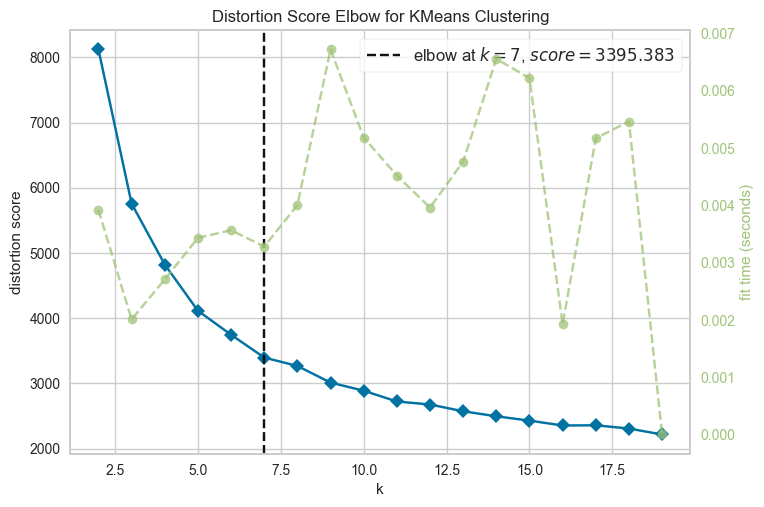

array([6, 4, 0, ..., 3, 0, 0])

In [1307]:
elbow_kmeans(X_std,kmeans,elbow_show=True)

In [1308]:
X_minmax = minmax.fit_transform(X_upd)

The average silhouette score is: 0.4404094067543476


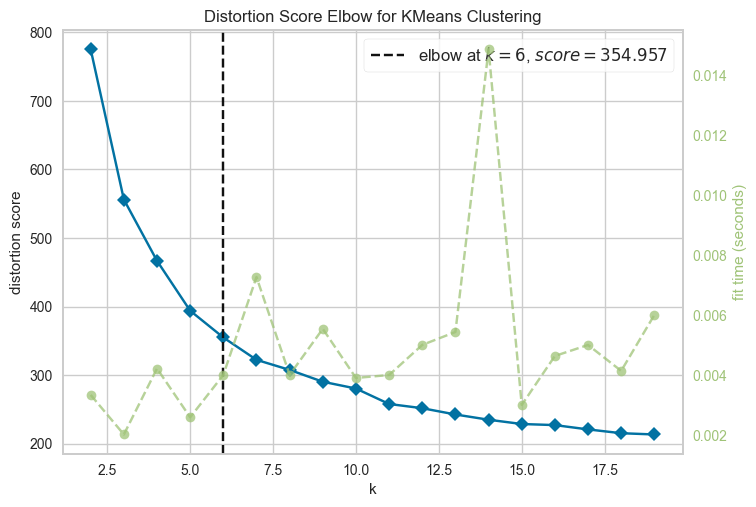

array([2, 3, 1, ..., 0, 1, 1])

In [1309]:
elbow_kmeans(X_minmax,kmeans,elbow_show=True)

The average silhouette score is: 0.39670044114362607


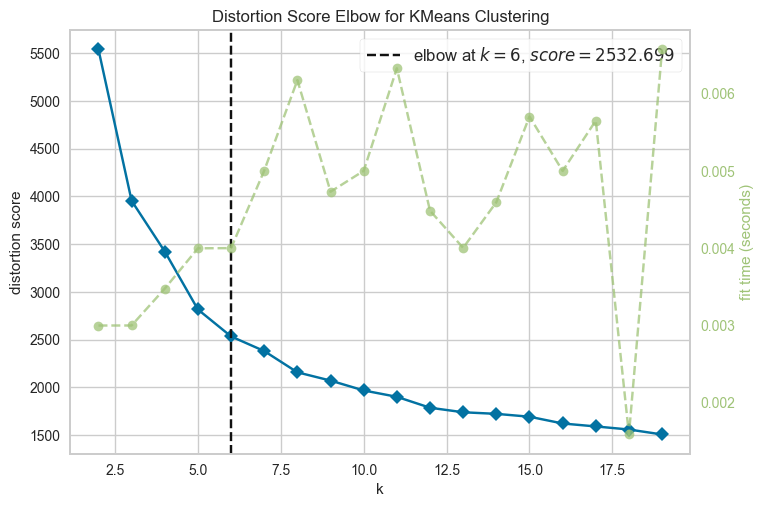

array([2, 5, 1, ..., 0, 1, 1])

In [1310]:
X_scaled = scaler.fit_transform(X_upd)
elbow_kmeans(X_scaled,kmeans,elbow_show=True)

Variance threshold: 0.8, Silhouette score: 0.5875220220147778, Components: 1
Variance threshold: 0.81, Silhouette score: 0.4474113339354445, Components: 2
Variance threshold: 0.8200000000000001, Silhouette score: 0.44700996823898875, Components: 2
Variance threshold: 0.8300000000000001, Silhouette score: 0.5120120669968172, Components: 2
Variance threshold: 0.8400000000000001, Silhouette score: 0.4450274387851012, Components: 2
Variance threshold: 0.8500000000000001, Silhouette score: 0.5120120669893784, Components: 2
Variance threshold: 0.8600000000000001, Silhouette score: 0.4700554692255126, Components: 2
Variance threshold: 0.8700000000000001, Silhouette score: 0.47002754035577843, Components: 2
Variance threshold: 0.8800000000000001, Silhouette score: 0.471255375952782, Components: 2
Variance threshold: 0.8900000000000001, Silhouette score: 0.5277767617686074, Components: 2
Variance threshold: 0.9000000000000001, Silhouette score: 0.44502743868163236, Components: 2
Variance thresh

(array([4, 1, 0, ..., 3, 0, 0]), 0.8, 0.5875220220147778)

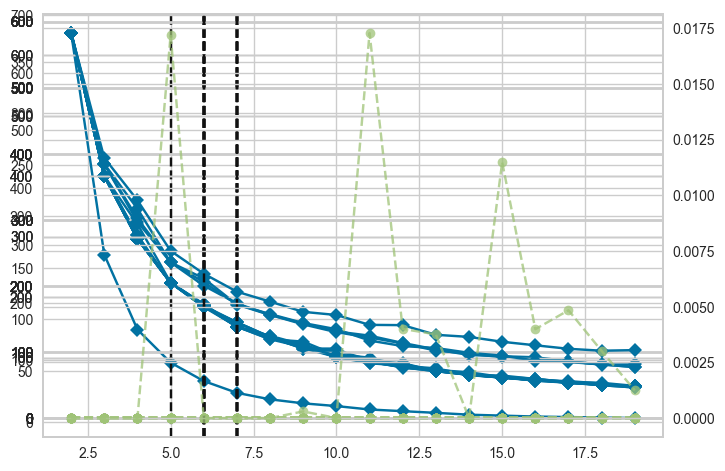

In [1311]:
find_optimal_cumulative_variance(X_minmax)

Variance threshold: 0.8, Silhouette score: 0.5892662152421765, Components: 1
Variance threshold: 0.81, Silhouette score: 0.5872691240842177, Components: 1
Variance threshold: 0.8200000000000001, Silhouette score: 0.4484958353784598, Components: 2
Variance threshold: 0.8300000000000001, Silhouette score: 0.4713384327632543, Components: 2
Variance threshold: 0.8400000000000001, Silhouette score: 0.5146047533185734, Components: 2
Variance threshold: 0.8500000000000001, Silhouette score: 0.4489260219171775, Components: 2
Variance threshold: 0.8600000000000001, Silhouette score: 0.4593611736928264, Components: 2
Variance threshold: 0.8700000000000001, Silhouette score: 0.45170466502959994, Components: 2
Variance threshold: 0.8800000000000001, Silhouette score: 0.46204427905366885, Components: 2
Variance threshold: 0.8900000000000001, Silhouette score: 0.448884205117411, Components: 2
Variance threshold: 0.9000000000000001, Silhouette score: 0.46450605674756557, Components: 2
Variance thresh

(array([4, 2, 0, ..., 1, 0, 0]), 0.8, 0.5892662152421765)

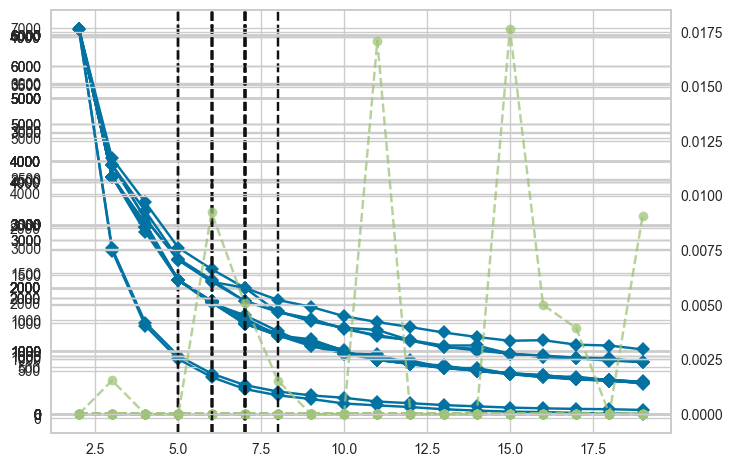

In [1312]:
find_optimal_cumulative_variance(X_std)

Variance threshold: 0.8, Silhouette score: 0.5889313909311301, Components: 1, Elbow value: 5
Variance threshold: 0.81, Silhouette score: 0.589463827410505, Components: 1, Elbow value: 5
Variance threshold: 0.8200000000000001, Silhouette score: 0.5152982844515164, Components: 2, Elbow value: 6
Variance threshold: 0.8300000000000001, Silhouette score: 0.4496896347912909, Components: 2, Elbow value: 7
Variance threshold: 0.8400000000000001, Silhouette score: 0.46117364790695675, Components: 2, Elbow value: 7
Variance threshold: 0.8500000000000001, Silhouette score: 0.47821440297551315, Components: 2, Elbow value: 6
Variance threshold: 0.8600000000000001, Silhouette score: 0.4695083130421927, Components: 2, Elbow value: 6
Variance threshold: 0.8700000000000001, Silhouette score: 0.5092532277412342, Components: 2, Elbow value: 6
Variance threshold: 0.8800000000000001, Silhouette score: 0.46052558716048075, Components: 2, Elbow value: 7
Variance threshold: 0.8900000000000001, Silhouette scor

(array([2, 3, 4, ..., 0, 4, 4]), 0.81, 0.589463827410505, 5)

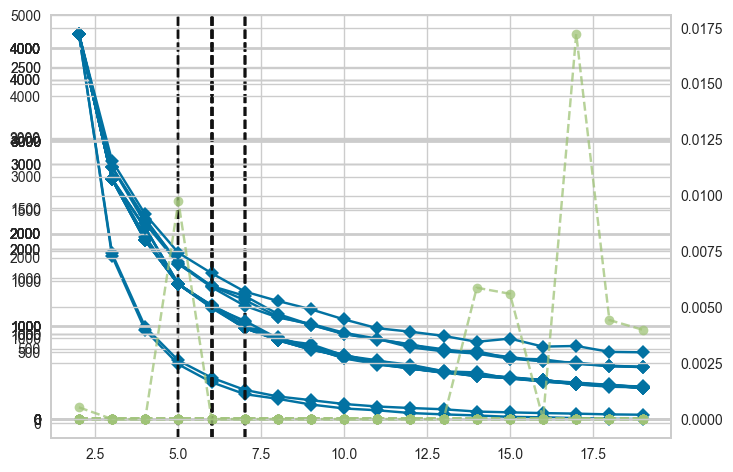

In [1315]:
find_optimal_cumulative_variance(X_scaled)

In [1319]:
X_upd

games_played  games_started  minutes  points  two_points_made  \
0            157.0          115.0   3438.1    1332              359   
1             87.0           57.0   2424.3    1199              283   
2             29.0            0.0    274.7      52                8   
3            180.0           55.0   3594.5    1421              258   
4             30.0            8.0    277.3      54               13   
...            ...            ...      ...     ...              ...   
1235          47.0           39.0   1324.2     610              140   
1236          15.0           11.0    369.0     129               42   
1237          55.0           44.0   1371.4     468              135   
1238          55.0            1.0    336.7      66               24   
1239          12.0            0.0    141.7      16                6   

      two_points_attempted  three_points_made  three_points_attempted  \
0                      702                133                     419   
1                      540                126                     351   
2                       23                  8                      35   
3                      487                223                     544   
4                       20                  7                      28   
...                    ...                ...                     ...   
1235                   314                 54                     148   
1236                    71                  9                      35   
1237                   245                 35                     107   
1238                    43                  1                       9   
1239                    19                  0                       6   

      free_throws_made  free_throws_attempted  offensive_rebounds  \
0                  215                    268                  92   
1                  255                    324                  55   
2                   12                     16                   8   
3                  236                    265                  32   
4                    7                     10                   5   
...                ...                    ...                 ...   
1235               168                    202                  41   
1236                18                     25                  17   
1237                93                    116                  36   
1238                15                     27                  21   
1239                 4                      4                   0   

      defensive_rebounds  assists  steals  turnovers  blocks_favour  \
0                    308      327     141        251             12   
1                    160      107      59        137             28   
2                     25       15       6          5              1   
3                    258      417     108        175              5   
4                     16       18       6         17              0   
...                  ...      ...     ...        ...            ...   
1235                 127       86      64        120             13   
1236                  21       42      15         35              4   
1237                 182       72      39         63             10   
1238                  30        9      10         16              3   
1239                   8       13       4         15              0   

      blocks_against  fouls_committed  
0                 54              313  
1                 41              160  
2                  0               24  
3                 24              324  
4                  1               26  
...              ...              ...  
1235              27              144  
1236               2               44  
1237              10              121  
1238               5               62  
1239               1               11  

[1240 rows x 18 columns]

In [1325]:
from scipy.cluster.hierarchy import linkage

linkage_matrix = linkage(X_scaled, method='ward')

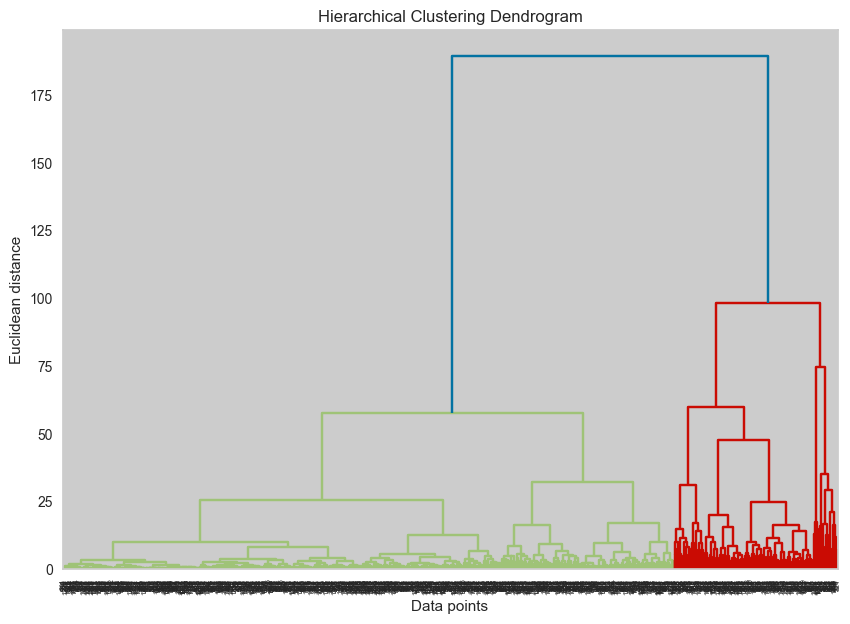

In [1326]:
from scipy.cluster.hierarchy import dendrogram

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data points')
plt.ylabel('Euclidean distance')
plt.show()


In [1327]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import numpy as np

def optimize_agglomerative_clusters(data_frame, cluster_range=(2, 10)):
    best_silhouette = -1
    best_n_clusters = 0

    for n_clusters in range(cluster_range[0], cluster_range[1] + 1):
        model = AgglomerativeClustering(n_clusters=n_clusters)
        labels = model.fit_predict(data_frame)
        
        # Calculate the silhouette score for the current number of clusters
        if 1 < n_clusters < len(data_frame):  # Silhouette score can only be calculated with more than one cluster
            silhouette_avg = silhouette_score(data_frame, labels)
            print(f"Number of clusters: {n_clusters}, Silhouette score: {silhouette_avg}")

            if silhouette_avg > best_silhouette:
                best_silhouette = silhouette_avg
                best_n_clusters = n_clusters

    print(f"Optimal number of clusters: {best_n_clusters} with a silhouette score of {best_silhouette}")
    return best_n_clusters


In [1328]:
optimize_agglomerative_clusters(X_scaled)

Number of clusters: 2, Silhouette score: 0.6120899204068363
Number of clusters: 3, Silhouette score: 0.5898255953631745
Number of clusters: 4, Silhouette score: 0.5948954105550953
Number of clusters: 5, Silhouette score: 0.5553590311574187
Number of clusters: 6, Silhouette score: 0.382572741218231
Number of clusters: 7, Silhouette score: 0.39613007223663976
Number of clusters: 8, Silhouette score: 0.3969381561912838
Number of clusters: 9, Silhouette score: 0.3657743279267283
Number of clusters: 10, Silhouette score: 0.3674405594617255
Optimal number of clusters: 2 with a silhouette score of 0.6120899204068363


2

In [1346]:
X_pca,n_clusters = dimension_reduce(X_scaled)

In [1347]:
X_pca.shape

(1240, 2)

In [1348]:
optimize_agglomerative_clusters(X_pca)

Number of clusters: 2, Silhouette score: 0.7055314964518308
Number of clusters: 3, Silhouette score: 0.5577475927746754
Number of clusters: 4, Silhouette score: 0.5687582641797846
Number of clusters: 5, Silhouette score: 0.5745612303081498
Number of clusters: 6, Silhouette score: 0.571473551515339
Number of clusters: 7, Silhouette score: 0.44928536168758376
Number of clusters: 8, Silhouette score: 0.4520216711253702
Number of clusters: 9, Silhouette score: 0.46133135626408345
Number of clusters: 10, Silhouette score: 0.46300418189974085
Optimal number of clusters: 2 with a silhouette score of 0.7055314964518308


2

In [1351]:
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors

def optimize_dbscan(data_frame, eps_values, min_samples_values):
    best_silhouette = -1
    best_eps = None
    best_min_samples = None
    best_labels = None

    # Prepare NearestNeighbors to find the optimal epsilon
    neigh = NearestNeighbors(n_neighbors=2)
    nbrs = neigh.fit(data_frame)
    distances, indices = nbrs.kneighbors(data_frame)
    
    # Loop through the range of eps and min_samples values to find the best combination
    for eps in eps_values:
        for min_samples in min_samples_values:
            # Fit DBSCAN
            db = DBSCAN(eps=eps, min_samples=min_samples)
            labels = db.fit_predict(data_frame)

            # Silhouette score can only be computed if more than one cluster and noise is present
            if len(np.unique(labels)) > 1 and np.any(labels == -1):
                silhouette_avg = silhouette_score(data_frame, labels)
                print(f"DBSCAN with eps={eps}, min_samples={min_samples}, silhouette={silhouette_avg}")

                if silhouette_avg > best_silhouette:
                    best_silhouette = silhouette_avg
                    best_eps = eps
                    best_min_samples = min_samples
                    best_labels = labels

    print(f"Best DBSCAN configuration: eps={best_eps}, min_samples={best_min_samples}, silhouette={best_silhouette}")
    return best_eps, best_min_samples, best_silhouette, best_labels

# Example usage:
eps_range = np.linspace(0.1, 1.0, 10)  # Modify as needed
min_samples_range = range(2, 10)  # Modify as needed
optimize_dbscan(X_scaled, eps_range, min_samples_range)


DBSCAN with eps=0.1, min_samples=2, silhouette=-0.36437221078045356
DBSCAN with eps=0.1, min_samples=3, silhouette=-0.35182154176314023
DBSCAN with eps=0.2, min_samples=2, silhouette=-0.3624999130072822
DBSCAN with eps=0.2, min_samples=3, silhouette=-0.3362547833622884
DBSCAN with eps=0.2, min_samples=4, silhouette=-0.3380081018321154
DBSCAN with eps=0.2, min_samples=5, silhouette=-0.3406004558482365
DBSCAN with eps=0.2, min_samples=6, silhouette=-0.368239615981352
DBSCAN with eps=0.2, min_samples=7, silhouette=-0.3705803535221061
DBSCAN with eps=0.2, min_samples=8, silhouette=-0.35941365097407074
DBSCAN with eps=0.2, min_samples=9, silhouette=-0.360442851121977
DBSCAN with eps=0.30000000000000004, min_samples=2, silhouette=-0.3202494343265557
DBSCAN with eps=0.30000000000000004, min_samples=3, silhouette=-0.28485300883770065
DBSCAN with eps=0.30000000000000004, min_samples=4, silhouette=-0.25560325537198897
DBSCAN with eps=0.30000000000000004, min_samples=5, silhouette=-0.106625994048

(1.0,
 6,
 0.47380405051287544,
 array([-1, -1,  0, ..., -1,  0,  0], dtype=int64))

In [1355]:
X_pca.shape

(1240, 2)

In [1365]:
import plotly.graph_objs as go
from sklearn.decomposition import PCA

def three_d_pca(dataframe):
    pca = PCA(n_components=3)
    reduced_data = pca.fit_transform(dataframe)
    
    # Extract the three principal components
    pc1 = reduced_data[:, 0]
    pc2 = reduced_data[:, 1]
    pc3 = reduced_data[:, 2]
    
    # Create a 3D scatter plot using Plotly
    fig = go.Figure(data=[go.Scatter3d(
        x=pc1,
        y=pc2,
        z=pc3,
        mode='markers',
        marker=dict(
            size=5,
            color=pc3,  # Color points by the third principal component for depth effect
            colorscale='Viridis',  # Choose a color scale
            opacity=0.8
        )
    )])
    
    # Update the layout of the plot
    fig.update_layout(
        title="PCA: First Three Principal Components",
        scene=dict(
            xaxis_title="Principal Component 1",
            yaxis_title="Principal Component 2",
            zaxis_title="Principal Component 3"
        ),
        margin=dict(l=0, r=0, b=0, t=0)
    )
    
    fig.show()


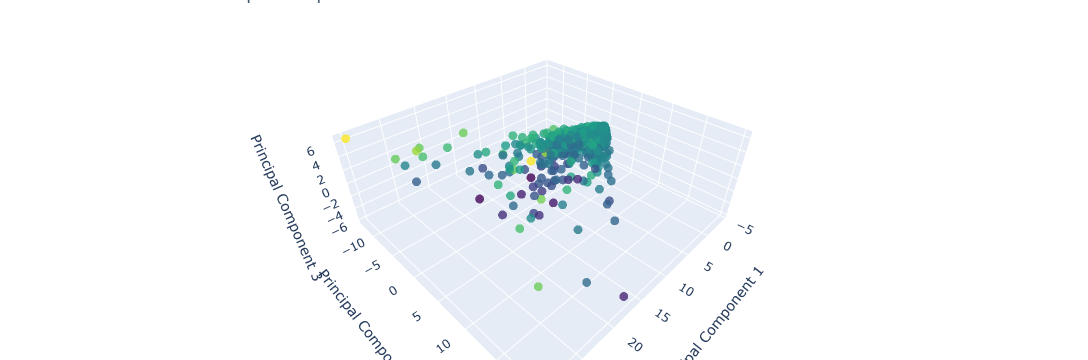

In [1366]:
three_d_pca(X_scaled)

In [1406]:
df_no_outlier = X_upd.copy()

In [1402]:
def drop_outliers(dataframe):
    for col in dataframe.columns:
        if check_outliers(dataframe,col):
            index = grab_outliers(dataframe,col,True)
            dataframe.drop(index=index,inplace=True)

    return dataframe

In [1407]:
drop_outliers(df_no_outlier)

games_played  games_started  minutes  points  two_points_made  \
2             29.0            0.0    274.7      52                8   
4             30.0            8.0    277.3      54               13   
5             44.0           20.0    686.8     189               33   
6             55.0            6.0    643.7     119               20   
7             20.0           16.0    552.4     301               90   
...            ...            ...      ...     ...              ...   
1231          12.0            4.0    273.6     109               24   
1232          20.0           18.0    588.5     318               57   
1236          15.0           11.0    369.0     129               42   
1238          55.0            1.0    336.7      66               24   
1239          12.0            0.0    141.7      16                6   

      two_points_attempted  three_points_made  three_points_attempted  \
2                       23                  8                      35   
4                       20                  7                      28   
5                       61                 36                     105   
6                       49                 19                      59   
7                      186                 11                      26   
...                    ...                ...                     ...   
1231                    50                 11                      43   
1232                   128                 50                     121   
1236                    71                  9                      35   
1238                    43                  1                       9   
1239                    19                  0                       6   

      free_throws_made  free_throws_attempted  offensive_rebounds  \
2                   12                     16                   8   
4                    7                     10                   5   
5                   15                     21                   4   
6                   22                     28                  12   
7                   88                    100                  44   
...                ...                    ...                 ...   
1231                28                     33                   4   
1232                54                     66                  15   
1236                18                     25                  17   
1238                15                     27                  21   
1239                 4                      4                   0   

      defensive_rebounds  assists  steals  turnovers  blocks_favour  \
2                     25       15       6          5              1   
4                     16       18       6         17              0   
5                     45       46       5         44              3   
6                     49       38      21         23              1   
7                     76       29      11         50             11   
...                  ...      ...     ...        ...            ...   
1231                  13       26      21         30              1   
1232                  47       37      20         47              4   
1236                  21       42      15         35              4   
1238                  30        9      10         16              3   
1239                   8       13       4         15              0   

      blocks_against  fouls_committed  
2                  0               24  
4                  1               26  
5                  4               70  
6                  7               71  
7                 10               45  
...              ...              ...  
1231               2               25  
1232              11               54  
1236               2               44  
1238               5               62  
1239               1               11  

[557 rows x 18 columns]

In [1397]:
for col in df_no_outlier.columns:
    replace_with_mode(df_no_outlier,col)

In [1408]:
noutlier_scaled = minmax.fit_transform(df_no_outlier)

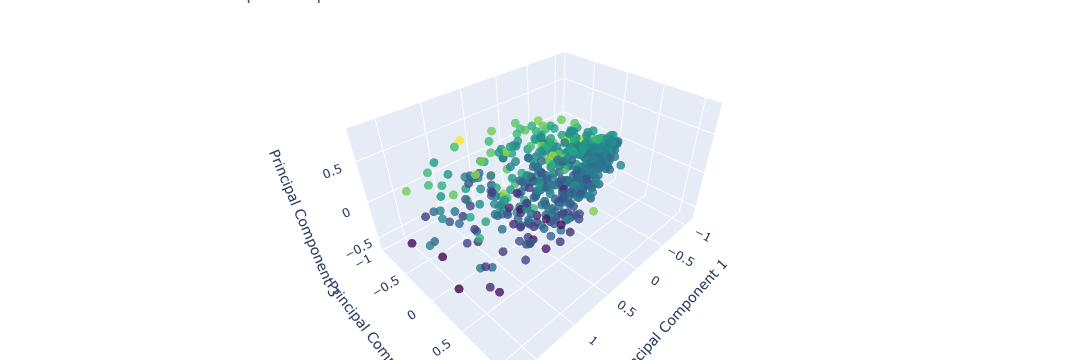

In [1409]:
# df_no_outlier.dropna(inplace=True)
# noutlier_scaled = scaler.fit_transform(df_no_outlier)

three_d_pca(noutlier_scaled)


In [1420]:
X_log = X_upd.copy()

In [1422]:
for col in X_upd.columns:
    X_log.loc[X_log[col] == 0] = 1

In [1423]:
X_log.describe().T

count         mean          std  min  25%    50%  \
games_played            1240.0    53.735484    67.600421  1.0  1.0   29.0   
games_started           1240.0    27.136290    40.192093  1.0  1.0   12.0   
minutes                 1240.0  1076.967742  1475.100977  1.0  1.0  528.3   
points                  1240.0   420.404839   619.423014  1.0  1.0  180.0   
two_points_made         1240.0   102.795968   159.619674  1.0  1.0   43.0   
two_points_attempted    1240.0   198.172581   297.365816  1.0  1.0   88.0   
three_points_made       1240.0    47.483871    78.851306  1.0  1.0   15.0   
three_points_attempted  1240.0   129.854032   210.884380  1.0  1.0   46.0   
free_throws_made        1240.0    73.937903   121.129745  1.0  1.0   27.0   
free_throws_attempted   1240.0    95.595968   153.909632  1.0  1.0   37.0   
offensive_rebounds      1240.0    42.050806    71.766513  1.0  1.0   17.0   
defensive_rebounds      1240.0   113.882258   168.341089  1.0  1.0   48.5   
assists                 1240.0    90.244355   176.539485  1.0  1.0   29.0   
steals                  1240.0    35.962097    51.281867  1.0  1.0   17.0   
turnovers               1240.0    64.962903    98.802615  1.0  1.0   29.0   
blocks_favour           1240.0    12.333871    25.964211  1.0  1.0    3.0   
blocks_against          1240.0    13.791935    20.704468  1.0  1.0    6.0   
fouls_committed         1240.0   106.300806   140.341216  1.0  1.0   57.5   

                            75%     max  
games_played              77.00   391.0  
games_started             36.00   277.0  
minutes                 1504.50  8709.6  
points                   569.75  4225.0  
two_points_made          130.00  1303.0  
two_points_attempted     260.25  2185.0  
three_points_made         57.25   580.0  
three_points_attempted   160.00  1736.0  
free_throws_made          97.25  1039.0  
free_throws_attempted    128.25  1333.0  
offensive_rebounds        48.00   788.0  
defensive_rebounds       152.00  1237.0  
assists                   98.00  1900.0  
steals                    48.00   410.0  
turnovers                 88.00  1025.0  
blocks_favour             12.00   323.0  
blocks_against            17.25   222.0  
fouls_committed          148.00   983.0

In [1424]:
X_log = np.log(X_log)

In [1425]:
X_log

games_played  games_started   minutes    points  two_points_made  \
0         5.056246       4.744932  8.142674  7.194437         5.883322   
1         4.465908       4.043051  7.793298  7.089243         5.645447   
2         0.000000       0.000000  0.000000  0.000000         0.000000   
3         5.192957       4.007333  8.187160  7.259116         5.552960   
4         0.000000       0.000000  0.000000  0.000000         0.000000   
...            ...            ...       ...       ...              ...   
1235      3.850148       3.663562  7.188564  6.413459         4.941642   
1236      2.708050       2.397895  5.910797  4.859812         3.737670   
1237      4.007333       3.784190  7.223587  6.148468         4.905275   
1238      4.007333       0.000000  5.819192  4.189655         3.178054   
1239      0.000000       0.000000  0.000000  0.000000         0.000000   

      two_points_attempted  three_points_made  three_points_attempted  \
0                 6.553933           4.890349                6.037871   
1                 6.291569           4.836282                5.860786   
2                 0.000000           0.000000                0.000000   
3                 6.188264           5.407172                6.298949   
4                 0.000000           0.000000                0.000000   
...                    ...                ...                     ...   
1235              5.749393           3.988984                4.997212   
1236              4.262680           2.197225                3.555348   
1237              5.501258           3.555348                4.672829   
1238              3.761200           0.000000                2.197225   
1239              0.000000           0.000000                0.000000   

      free_throws_made  free_throws_attempted  offensive_rebounds  \
0             5.370638               5.590987            4.521789   
1             5.541264               5.780744            4.007333   
2             0.000000               0.000000            0.000000   
3             5.463832               5.579730            3.465736   
4             0.000000               0.000000            0.000000   
...                ...                    ...                 ...   
1235          5.123964               5.308268            3.713572   
1236          2.890372               3.218876            2.833213   
1237          4.532599               4.753590            3.583519   
1238          2.708050               3.295837            3.044522   
1239          0.000000               0.000000            0.000000   

      defensive_rebounds   assists    steals  turnovers  blocks_favour  \
0               5.730100  5.789960  4.948760   5.525453       2.484907   
1               5.075174  4.672829  4.077537   4.919981       3.332205   
2               0.000000  0.000000  0.000000   0.000000       0.000000   
3               5.552960  6.033086  4.682131   5.164786       1.609438   
4               0.000000  0.000000  0.000000   0.000000       0.000000   
...                  ...       ...       ...        ...            ...   
1235            4.844187  4.454347  4.158883   4.787492       2.564949   
1236            3.044522  3.737670  2.708050   3.555348       1.386294   
1237            5.204007  4.276666  3.663562   4.143135       2.302585   
1238            3.401197  2.197225  2.302585   2.772589       1.098612   
1239            0.000000  0.000000  0.000000   0.000000       0.000000   

      blocks_against  fouls_committed  
0           3.988984         5.746203  
1           3.713572         5.075174  
2           0.000000         0.000000  
3           3.178054         5.780744  
4           0.000000         0.000000  
...              ...              ...  
1235        3.295837         4.969813  
1236        0.693147         3.784190  
1237        2.302585         4.795791  
1238        1.609438         4.127134  
1239        0.000000         0.000000  

[1240 rows x 18 columns]

In [1427]:
X_log_std = std_scaler.fit_transform(X_log)

Variance threshold: 0.8, Silhouette score: 0.6831072622901398, Components: 1, Elbow value: 5
Variance threshold: 0.81, Silhouette score: 0.6839797345194786, Components: 1, Elbow value: 5
Variance threshold: 0.8200000000000001, Silhouette score: 0.6832450988826809, Components: 1, Elbow value: 5
Variance threshold: 0.8300000000000001, Silhouette score: 0.6837143241514452, Components: 1, Elbow value: 5
Variance threshold: 0.8400000000000001, Silhouette score: 0.683603867699947, Components: 1, Elbow value: 5
Variance threshold: 0.8500000000000001, Silhouette score: 0.683630771153295, Components: 1, Elbow value: 5
Variance threshold: 0.8600000000000001, Silhouette score: 0.6839797345194633, Components: 1, Elbow value: 5
Variance threshold: 0.8700000000000001, Silhouette score: 0.6839220749230437, Components: 1, Elbow value: 5
Variance threshold: 0.8800000000000001, Silhouette score: 0.6839220749230361, Components: 1, Elbow value: 5
Variance threshold: 0.8900000000000001, Silhouette score: 0

(array([3, 0, 1, ..., 0, 2, 1]), 0.81, 0.6839797345194786, 5)

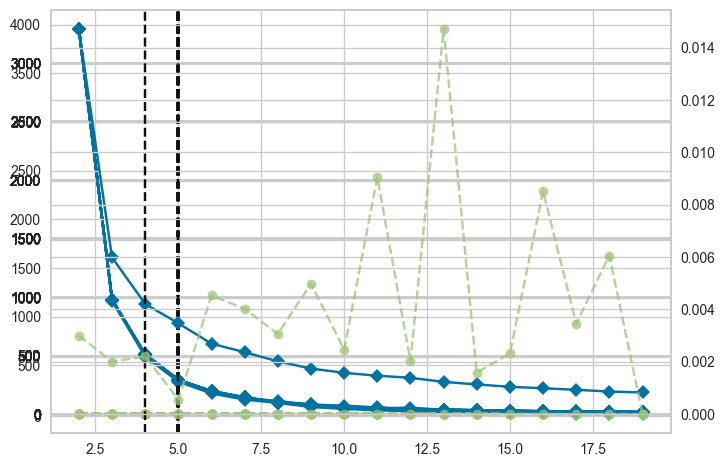

In [1428]:
find_optimal_cumulative_variance(X_log_std)

In [1429]:
X_log_minmax = minmax.fit_transform(X_log)

Variance threshold: 0.8, Silhouette score: 0.6865375950599758, Components: 1, Elbow value: 5
Variance threshold: 0.81, Silhouette score: 0.6844024590691845, Components: 1, Elbow value: 5
Variance threshold: 0.8200000000000001, Silhouette score: 0.6867042967881491, Components: 1, Elbow value: 5
Variance threshold: 0.8300000000000001, Silhouette score: 0.6847880503340532, Components: 1, Elbow value: 5
Variance threshold: 0.8400000000000001, Silhouette score: 0.6861968999812101, Components: 1, Elbow value: 5
Variance threshold: 0.8500000000000001, Silhouette score: 0.6844024590691841, Components: 1, Elbow value: 5
Variance threshold: 0.8600000000000001, Silhouette score: 0.6865375950599751, Components: 1, Elbow value: 5
Variance threshold: 0.8700000000000001, Silhouette score: 0.6846594666299164, Components: 1, Elbow value: 5
Variance threshold: 0.8800000000000001, Silhouette score: 0.6845735201593341, Components: 1, Elbow value: 5
Variance threshold: 0.8900000000000001, Silhouette score:

(array([4, 1, 0, ..., 1, 2, 0]), 0.9300000000000002, 0.6867042967881493, 5)

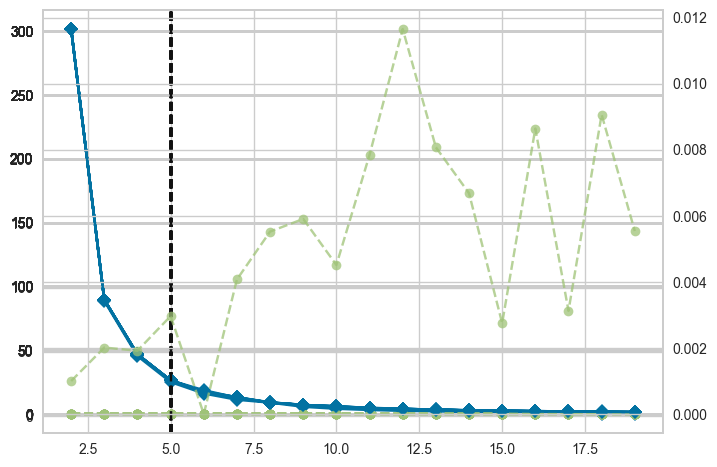

In [1430]:
find_optimal_cumulative_variance(X_log_minmax)

Variance threshold: 0.8, Silhouette score: 0.6863601883824563, Components: 1, Elbow value: 5
Variance threshold: 0.81, Silhouette score: 0.6839375295296793, Components: 1, Elbow value: 5
Variance threshold: 0.8200000000000001, Silhouette score: 0.6840561419244383, Components: 1, Elbow value: 5
Variance threshold: 0.8300000000000001, Silhouette score: 0.6840710796276295, Components: 1, Elbow value: 5
Variance threshold: 0.8400000000000001, Silhouette score: 0.6840609135946786, Components: 1, Elbow value: 5
Variance threshold: 0.8500000000000001, Silhouette score: 0.6838046168389705, Components: 1, Elbow value: 5
Variance threshold: 0.8600000000000001, Silhouette score: 0.6839375295296802, Components: 1, Elbow value: 5
Variance threshold: 0.8700000000000001, Silhouette score: 0.6866652334365995, Components: 1, Elbow value: 5
Variance threshold: 0.8800000000000001, Silhouette score: 0.6839007616591458, Components: 1, Elbow value: 5
Variance threshold: 0.8900000000000001, Silhouette score:

(array([4, 3, 1, ..., 3, 2, 1]), 0.9400000000000002, 0.6866652334366004, 5)

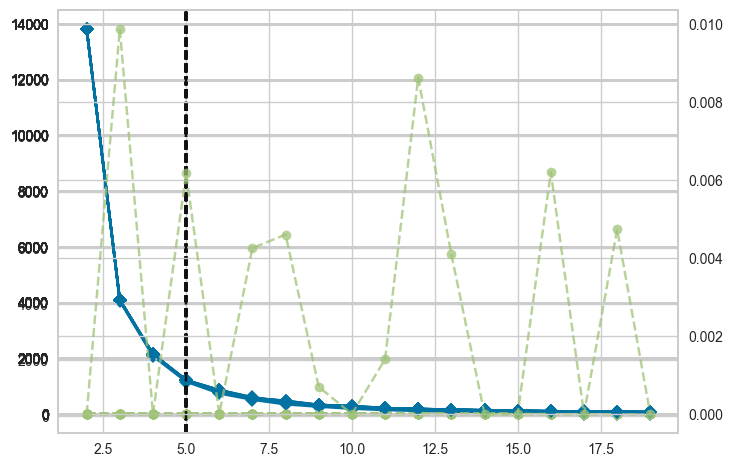

In [1434]:
find_optimal_cumulative_variance(X_log)

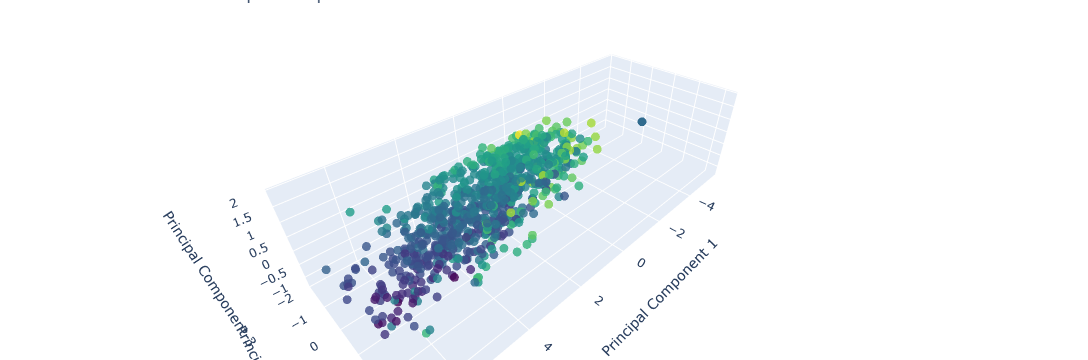

In [1435]:
three_d_pca(X_log_std)

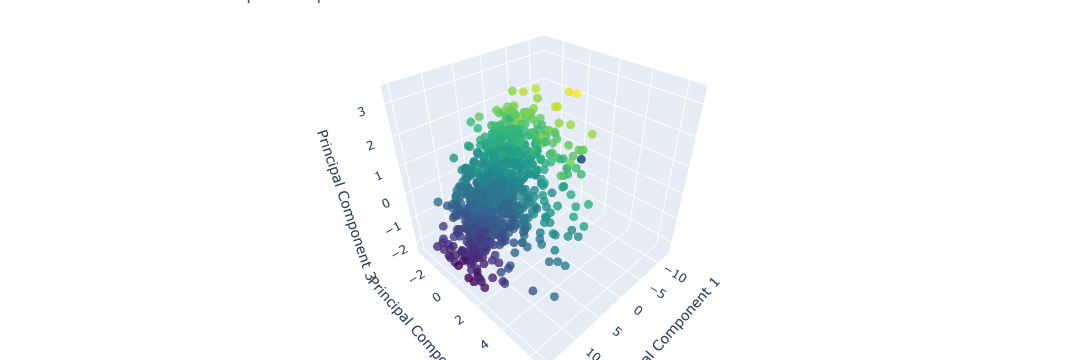

In [1436]:
three_d_pca(X_log)

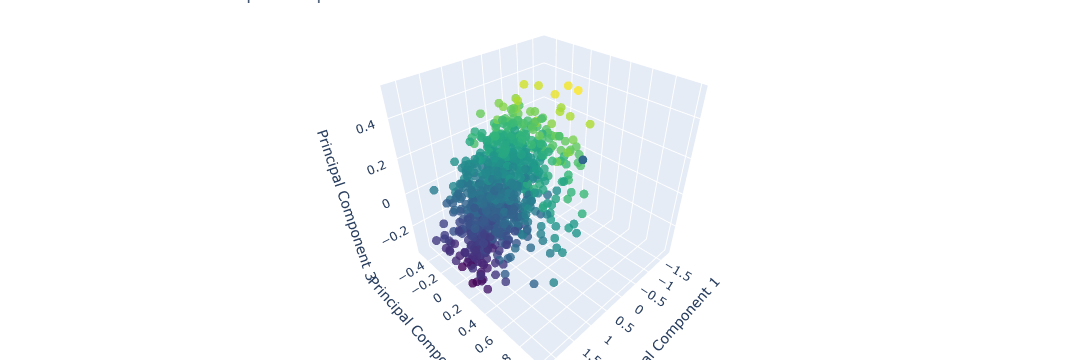

In [1437]:
three_d_pca(X_log_minmax)

In [1438]:
optimize_agglomerative_clusters(X_log)

Number of clusters: 2, Silhouette score: 0.7641354681562055
Number of clusters: 3, Silhouette score: 0.602264937970873
Number of clusters: 4, Silhouette score: 0.5233199201245637
Number of clusters: 5, Silhouette score: 0.44773847471781647
Number of clusters: 6, Silhouette score: 0.46608112006134467
Number of clusters: 7, Silhouette score: 0.4392653867415758
Number of clusters: 8, Silhouette score: 0.4400398405900116
Number of clusters: 9, Silhouette score: 0.4288237900080904
Number of clusters: 10, Silhouette score: 0.42543458102589116
Optimal number of clusters: 2 with a silhouette score of 0.7641354681562055


2

In [1439]:
optimize_agglomerative_clusters(X_log_std)

Number of clusters: 2, Silhouette score: 0.7294620827661465
Number of clusters: 3, Silhouette score: 0.5756218609778411
Number of clusters: 4, Silhouette score: 0.48058118807302347
Number of clusters: 5, Silhouette score: 0.4413264763616131
Number of clusters: 6, Silhouette score: 0.4487008045447481
Number of clusters: 7, Silhouette score: 0.43074089690524353
Number of clusters: 8, Silhouette score: 0.4291337608909366
Number of clusters: 9, Silhouette score: 0.43390981607714807
Number of clusters: 10, Silhouette score: 0.43901177440416544
Optimal number of clusters: 2 with a silhouette score of 0.7294620827661465


2

In [1440]:
optimize_agglomerative_clusters(X_log_minmax)

Number of clusters: 2, Silhouette score: 0.7450353024464583
Number of clusters: 3, Silhouette score: 0.5928768375109708
Number of clusters: 4, Silhouette score: 0.497023259997415
Number of clusters: 5, Silhouette score: 0.45515179644519926
Number of clusters: 6, Silhouette score: 0.47632691537353405
Number of clusters: 7, Silhouette score: 0.4717829663491109
Number of clusters: 8, Silhouette score: 0.46770238534831315
Number of clusters: 9, Silhouette score: 0.4330600404355114
Number of clusters: 10, Silhouette score: 0.4153232299162719
Optimal number of clusters: 2 with a silhouette score of 0.7450353024464583


2

In [1454]:
from sklearn.neighbors import NearestNeighbors
def k_distance(dataframe,k=5):
    neigh = NearestNeighbors(n_neighbors=k)
    neigh.fit(dataframe)
    
    # Get the distance to the k-th nearest neighbor
    distances, indices = neigh.kneighbors(dataframe)
    
    # Sort the distances
    sorted_distances = np.sort(distances[:, k-1], axis=0)
    
    # Plot the k-distance graph
    plt.figure(figsize=(10, 6))
    plt.plot(sorted_distances)
    plt.xlabel('Points sorted by distance to the k-th nearest neighbor')
    plt.ylabel(f'{k}-th nearest neighbor distance')
    plt.title(f'K-distance Graph (k={k})')
    plt.grid(True)
    plt.show()


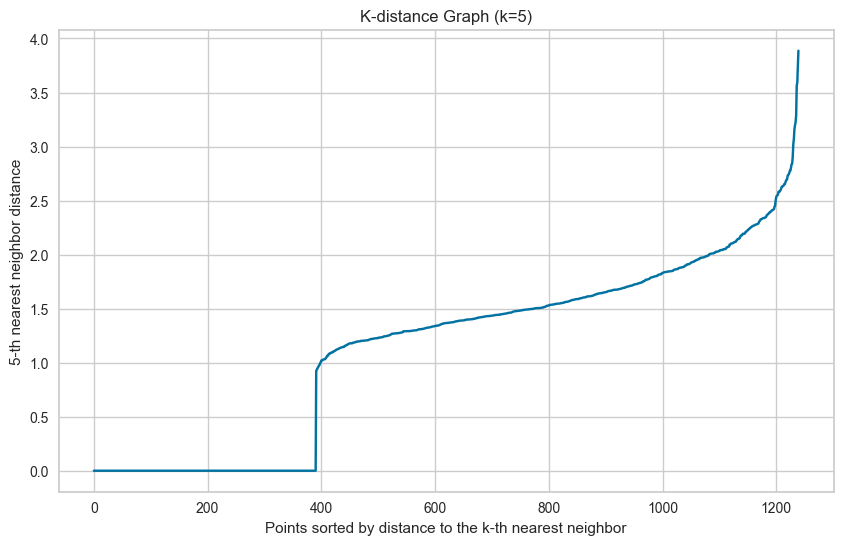

In [1455]:
k_distance(X_log)

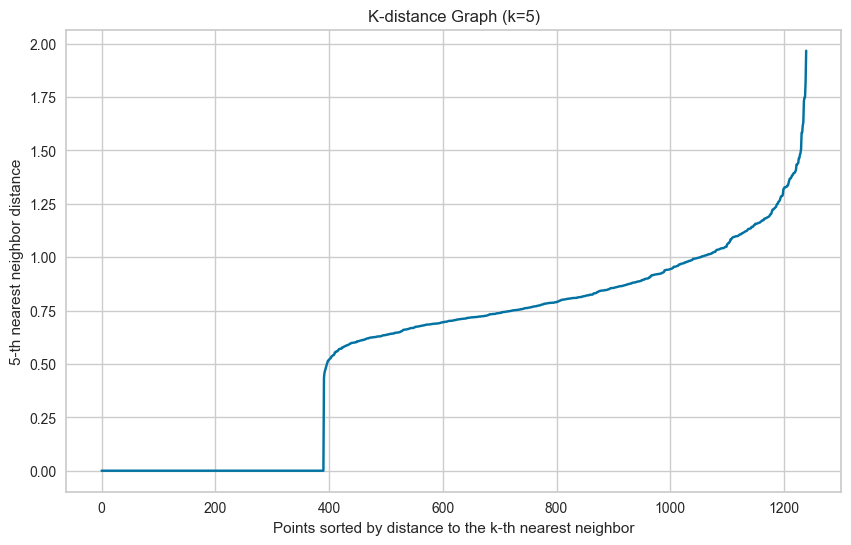

In [1452]:
k_distance(X_log_std)

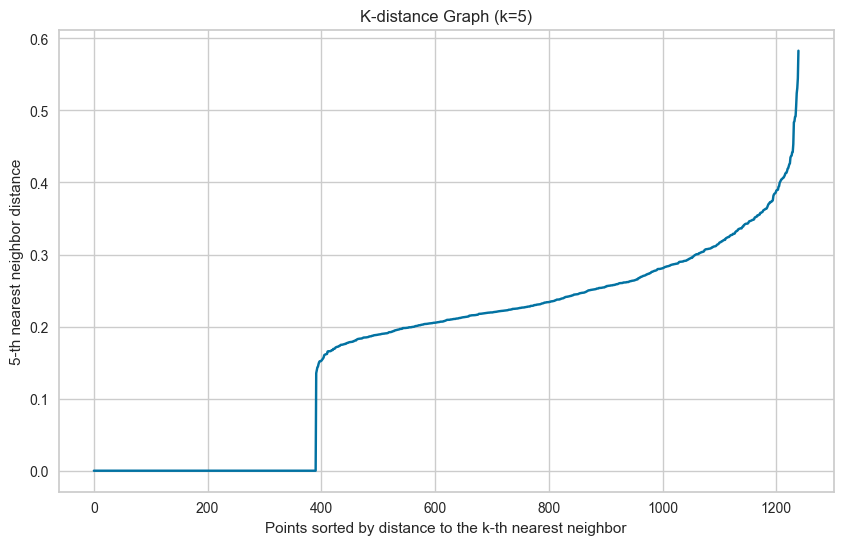

In [1453]:
k_distance(X_log_minmax)

In [1462]:
optimize_dbscan(X_log,[3.1,3.0,3.2,3.3,3.4], min_samples_range)

DBSCAN with eps=3.1, min_samples=2, silhouette=0.5420447806910373
DBSCAN with eps=3.1, min_samples=3, silhouette=0.5420447806910373
DBSCAN with eps=3.1, min_samples=4, silhouette=0.5420447806910373
DBSCAN with eps=3.1, min_samples=5, silhouette=0.5420447806910373
DBSCAN with eps=3.1, min_samples=6, silhouette=0.5420447806910373
DBSCAN with eps=3.1, min_samples=7, silhouette=0.5420447806910373
DBSCAN with eps=3.1, min_samples=8, silhouette=0.5793979587806849
DBSCAN with eps=3.1, min_samples=9, silhouette=0.5793979587806849
DBSCAN with eps=3.1, min_samples=10, silhouette=0.5793979587806849
DBSCAN with eps=3.1, min_samples=11, silhouette=0.5793979587806849
DBSCAN with eps=3.1, min_samples=12, silhouette=0.5793979587806849
DBSCAN with eps=3.1, min_samples=13, silhouette=0.5793979587806849
DBSCAN with eps=3.1, min_samples=14, silhouette=0.5793979587806849
DBSCAN with eps=3.1, min_samples=15, silhouette=0.5793979587806849
DBSCAN with eps=3.1, min_samples=16, silhouette=0.5793979587806849
DBS

(3.4, 12, 0.6233272308472366, array([0, 0, 1, ..., 0, 0, 1], dtype=int64))

In [1469]:
min_samples_range = range(12,30)

In [1472]:
optimize_dbscan(X_log_std,np.arange(1, 2.5, 0.1), min_samples_range)

DBSCAN with eps=1.0, min_samples=30, silhouette=0.4668106971310793
DBSCAN with eps=1.0, min_samples=31, silhouette=0.4668106971310793
DBSCAN with eps=1.0, min_samples=32, silhouette=0.4608198245245205
DBSCAN with eps=1.0, min_samples=33, silhouette=0.4571887577069884
DBSCAN with eps=1.0, min_samples=34, silhouette=0.4536054195651957
DBSCAN with eps=1.0, min_samples=35, silhouette=0.4517032451708896
DBSCAN with eps=1.0, min_samples=36, silhouette=0.44574654854117984
DBSCAN with eps=1.0, min_samples=37, silhouette=0.4426340349475427
DBSCAN with eps=1.0, min_samples=38, silhouette=0.4403067548191448
DBSCAN with eps=1.0, min_samples=39, silhouette=0.4375927683990924
DBSCAN with eps=1.1, min_samples=30, silhouette=0.47971058113518994
DBSCAN with eps=1.1, min_samples=31, silhouette=0.47973255067611226
DBSCAN with eps=1.1, min_samples=32, silhouette=0.4785630012510823
DBSCAN with eps=1.1, min_samples=33, silhouette=0.4779500421144356
DBSCAN with eps=1.1, min_samples=34, silhouette=0.477689279

(1.8000000000000007,
 30,
 0.6172913247488367,
 array([0, 0, 1, ..., 0, 0, 1], dtype=int64))

In [1475]:
# min_samples_range = range(2,20) (0.5, 12, 0.6096011918525566, array([0, 0, 1, ..., 0, 0, 1], dtype=int64))
# min_samples_range = range(12,30) (0.5, 12, 0.6096011918525566, array([0, 0, 1, ..., 0, 0, 1], dtype=int64))
# min_samples_range = range(1,20) Best DBSCAN configuration: eps=0.1, min_samples=3, silhouette=0.7450353024464583
optimize_dbscan(X_log_minmax,np.arange(0.1,1,0.01), min_samples_range)

DBSCAN with eps=0.1, min_samples=2, silhouette=0.15789531412635233
DBSCAN with eps=0.1, min_samples=3, silhouette=0.7450353024464583
DBSCAN with eps=0.1, min_samples=4, silhouette=0.7450353024464583
DBSCAN with eps=0.1, min_samples=5, silhouette=0.7450353024464583
DBSCAN with eps=0.1, min_samples=6, silhouette=0.7450353024464583
DBSCAN with eps=0.1, min_samples=7, silhouette=0.7450353024464583
DBSCAN with eps=0.1, min_samples=8, silhouette=0.7450353024464583
DBSCAN with eps=0.1, min_samples=9, silhouette=0.7450353024464583
DBSCAN with eps=0.1, min_samples=10, silhouette=0.7450353024464583
DBSCAN with eps=0.1, min_samples=11, silhouette=0.7450353024464583
DBSCAN with eps=0.1, min_samples=12, silhouette=0.7450353024464583
DBSCAN with eps=0.1, min_samples=13, silhouette=0.7450353024464583
DBSCAN with eps=0.1, min_samples=14, silhouette=0.7450353024464583
DBSCAN with eps=0.1, min_samples=15, silhouette=0.7450353024464583
DBSCAN with eps=0.1, min_samples=16, silhouette=0.7450353024464583
DB

(0.1, 3, 0.7450353024464583, array([-1, -1,  0, ..., -1, -1,  0], dtype=int64))